 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 7 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## First Inspection: The most popular Names in 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

In [2]:
df = pd.read_csv("us_baby_names.csv")
df

Year       Name Gender  Count
0        1880       Mary      F   7065
1        1880       Anna      F   2604
2        1880       Emma      F   2003
3        1880  Elizabeth      F   1939
4        1880     Minnie      F   1746
...       ...        ...    ...    ...
1957041  2018      Zylas      M      5
1957042  2018      Zyran      M      5
1957043  2018      Zyrie      M      5
1957044  2018      Zyron      M      5
1957045  2018      Zzyzx      M      5

[1957046 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [4]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [5]:
df.Gender = df.Gender.astype("category")

2. Find the most popular __Baby Girl Names__ in __2018__. 

In [6]:
df.loc[(df.Gender == "F") & (df.Year == 2018)].nlargest(10, "Count")

Year       Name Gender  Count
1925013  2018       Emma      F  18688
1925014  2018     Olivia      F  17921
1925015  2018        Ava      F  14924
1925016  2018   Isabella      F  14464
1925017  2018     Sophia      F  13928
1925018  2018  Charlotte      F  12940
1925019  2018        Mia      F  12642
1925020  2018     Amelia      F  12301
1925021  2018     Harper      F  10582
1925022  2018     Evelyn      F  10376

3. Find the most popular __Baby Boy Names__ in __2018__.

In [7]:
df.loc[(df.Gender == "M") & (df.Year == 2018)].nlargest(10, "Count")

Year      Name Gender  Count
1943042  2018      Liam      M  19837
1943043  2018      Noah      M  18267
1943044  2018   William      M  14516
1943045  2018     James      M  13525
1943046  2018    Oliver      M  13389
1943047  2018  Benjamin      M  13381
1943048  2018    Elijah      M  12886
1943049  2018     Lucas      M  12585
1943050  2018     Mason      M  12435
1943051  2018     Logan      M  12352

4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [8]:
def most_pop(year, gender, n=10):
    return df.loc[(df.Gender == gender) & (df.Year == year)].nlargest(n, "Count")

## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [9]:
m_2018 = most_pop(2018, "M", 20)
m_1880 = most_pop(1880, "M", 20)

In [10]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2018", "_1880"))
m_evergreen

Name  Count_2018  Count_1880
0  William       14516        9532
1    James       13525        5927
2    Henry       10649        2444

6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [11]:
f_2018 = most_pop(2018, "F", 20)
f_1880 = most_pop(1880, "F", 20)

In [12]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how="inner", on="Name",
                                              suffixes=("_2018", "_1880"))
f_evergreen

Name  Count_2018  Count_1880
0       Emma       18688        2003
1  Elizabeth        8513        1939
2       Ella        8055        1156

## Advanced Data Aggregation

In [13]:
df = pd.read_csv("us_baby_names.csv")

In [14]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

Gender  Count
Name                 
Aaban        M    114
Aabha        F     35
Aabid        M     16
Aabidah      F      5
Aabir        M     10
...        ...    ...
Zyvion       M      5
Zyvon        M      7
Zyyanna      F      6
Zyyon        M      6
Zzyzx        M     10

[109173 rows x 2 columns]

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

In [15]:
agg = df.groupby(["Name", "Gender"]).agg(
    Total=("Count", "sum"),
    No_Year=("Year", "count"),
    First_Year=("Year", "min"),
    Last_Year=("Year", "max"),
    Max_Count=("Count", "max"))
agg

Total  No_Year  First_Year  Last_Year  Max_Count
Name    Gender                                                  
Aaban   M         114       11        2007       2018         16
Aabha   F          35        5        2011       2016          9
Aabid   M          16        3        2003       2018          6
Aabidah F           5        1        2018       2018          5
Aabir   M          10        2        2016       2018          5
...               ...      ...         ...        ...        ...
Zyvion  M           5        1        2009       2009          5
Zyvon   M           7        1        2015       2015          7
Zyyanna F           6        1        2010       2010          6
Zyyon   M           6        1        2014       2014          6
Zzyzx   M          10        2        2010       2018          5

[109173 rows x 5 columns]

In [16]:
def best_year(x):
    return x.nlargest(1, "Count").Year

In [17]:
# best_y = df.groupby(["Name", "Gender"]).apply(best_year) 

# this can take a couple of minutes
# 27 minutes 41 second on my laptop

In [18]:
# best_y

In [19]:
# best_y.droplevel(-1)

In [20]:
# agg["Best_Year"] = best_y.droplevel(-1)

In [21]:
def best_year(x):
    return x.nlargest(1, "Count")['Year'].iloc[0]

best_my = df.groupby(["Name", "Gender"]).apply(best_year) 
agg["Best_Year"] = best_my

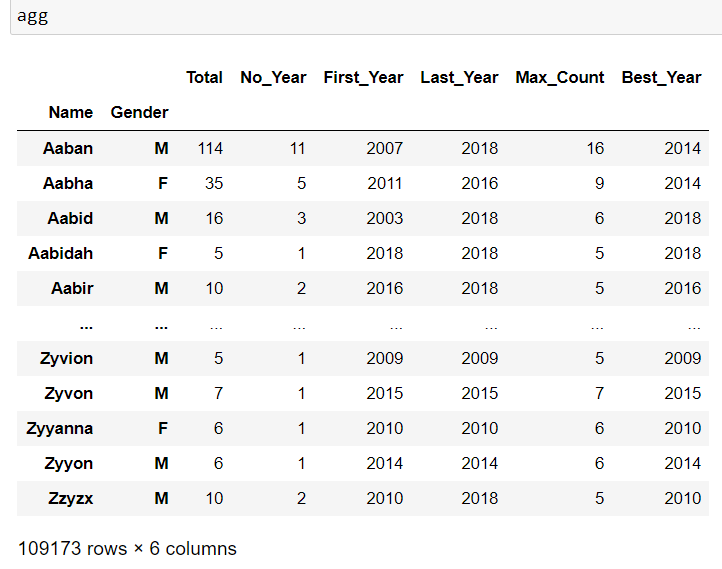

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

In [22]:
agg.reset_index(inplace = True)

9. __Filter__ agg for the combination (Mary, F)

In [23]:
agg.loc[(agg.Name == "Mary") & (agg.Gender == "F")]

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
68679  Mary      F  4125675      139        1880       2018      73985   

       Best_Year  
68679       1921

## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

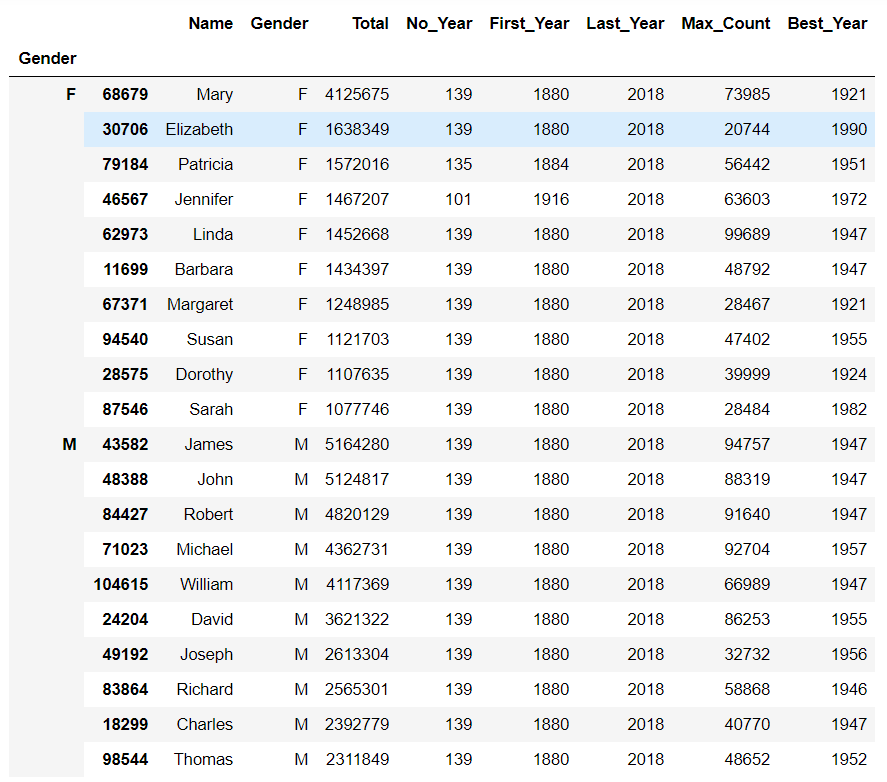

In [24]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [25]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
0        Mary      F  4125675      139        1880       2018      73985   
1   Elizabeth      F  1638349      139        1880       2018      20744   
2    Patricia      F  1572016      135        1884       2018      56442   
3    Jennifer      F  1467207      101        1916       2018      63603   
4       Linda      F  1452668      139        1880       2018      99689   
5     Barbara      F  1434397      139        1880       2018      48792   
6    Margaret      F  1248985      139        1880       2018      28467   
7       Susan      F  1121703      139        1880       2018      47402   
8     Dorothy      F  1107635      139        1880       2018      39999   
9       Sarah      F  1077746      139        1880       2018      28484   
10      James      M  5164280      139        1880       2018      94757   
11       John      M  5124817      139        1880       2018      88319   
12     Robert      M  4820129      139        1880       2018      91640   
13    Michael      M  4362731      139        1880       2018      92704   
14    William      M  4117369      139        1880       2018      66989   
15      David      M  3621322      139        1880       2018      86253   
16     Joseph      M  2613304      139        1880       2018      32732   
17    Richard      M  2565301      139        1880       2018      58868   
18    Charles      M  2392779      139        1880       2018      40770   
19     Thomas      M  2311849      139        1880       2018      48652   

    Best_Year  
0        1921  
1        1990  
2        1951  
3        1972  
4        1947  
5        1947  
6        1921  
7        1955  
8        1924  
9        1982  
10       1947  
11       1947  
12       1947  
13       1957  
14       1947  
15       1955  
16       1956  
17       1946  
18       1947  
19       1952

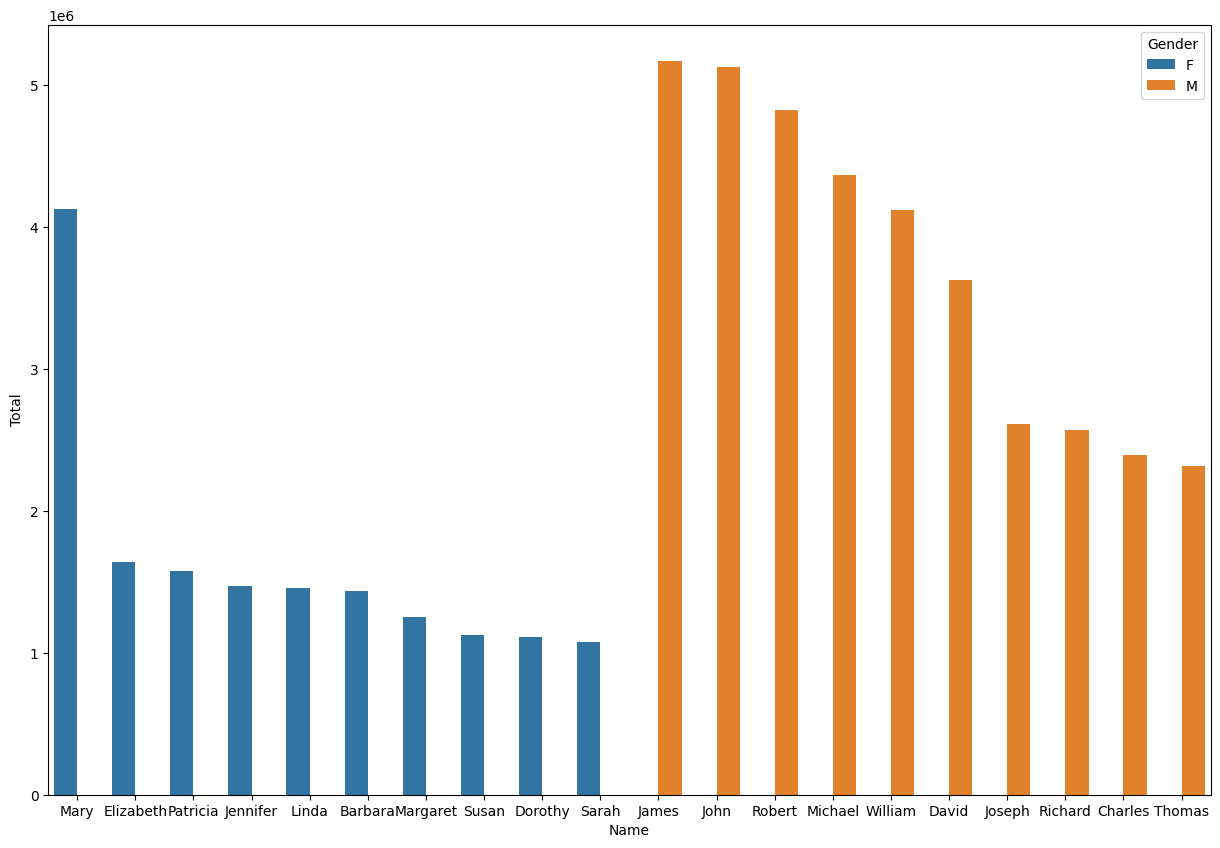

In [26]:
import seaborn as sns

plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

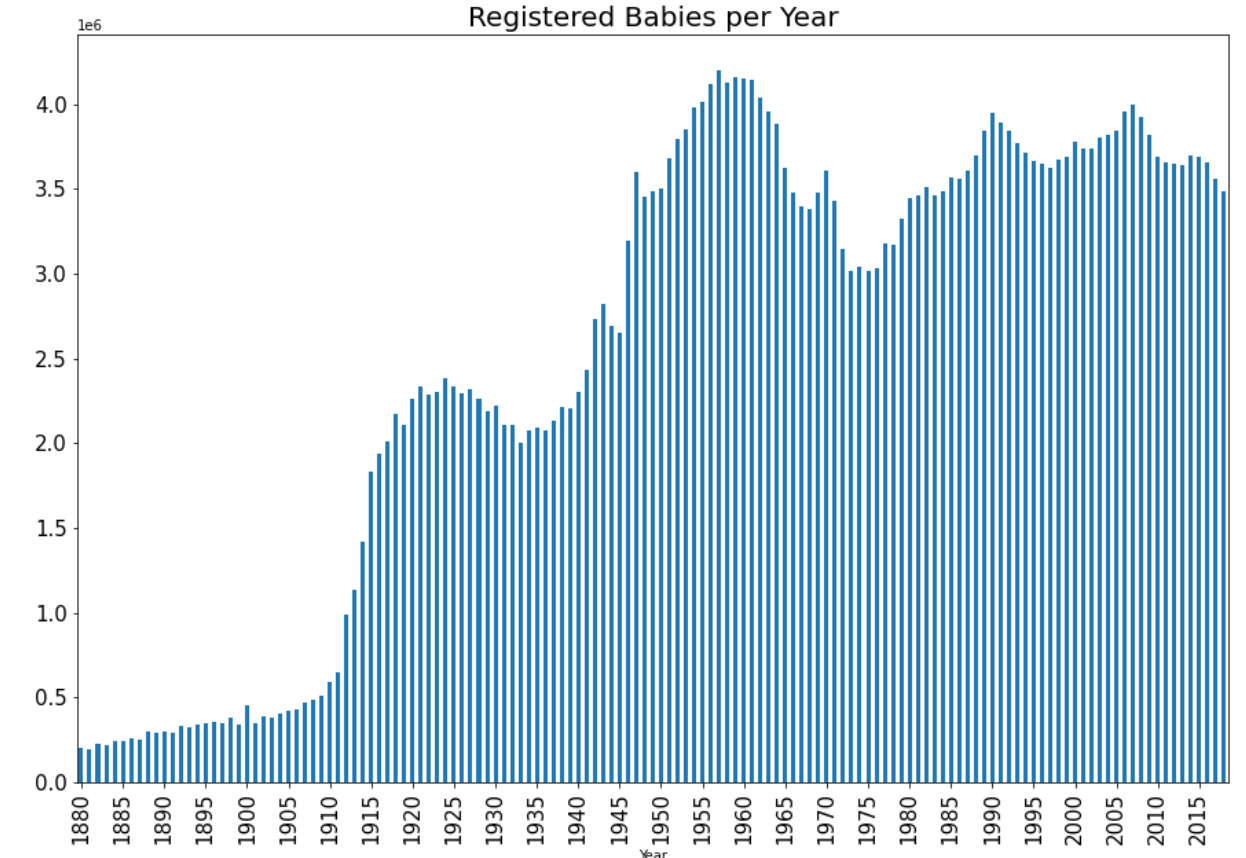

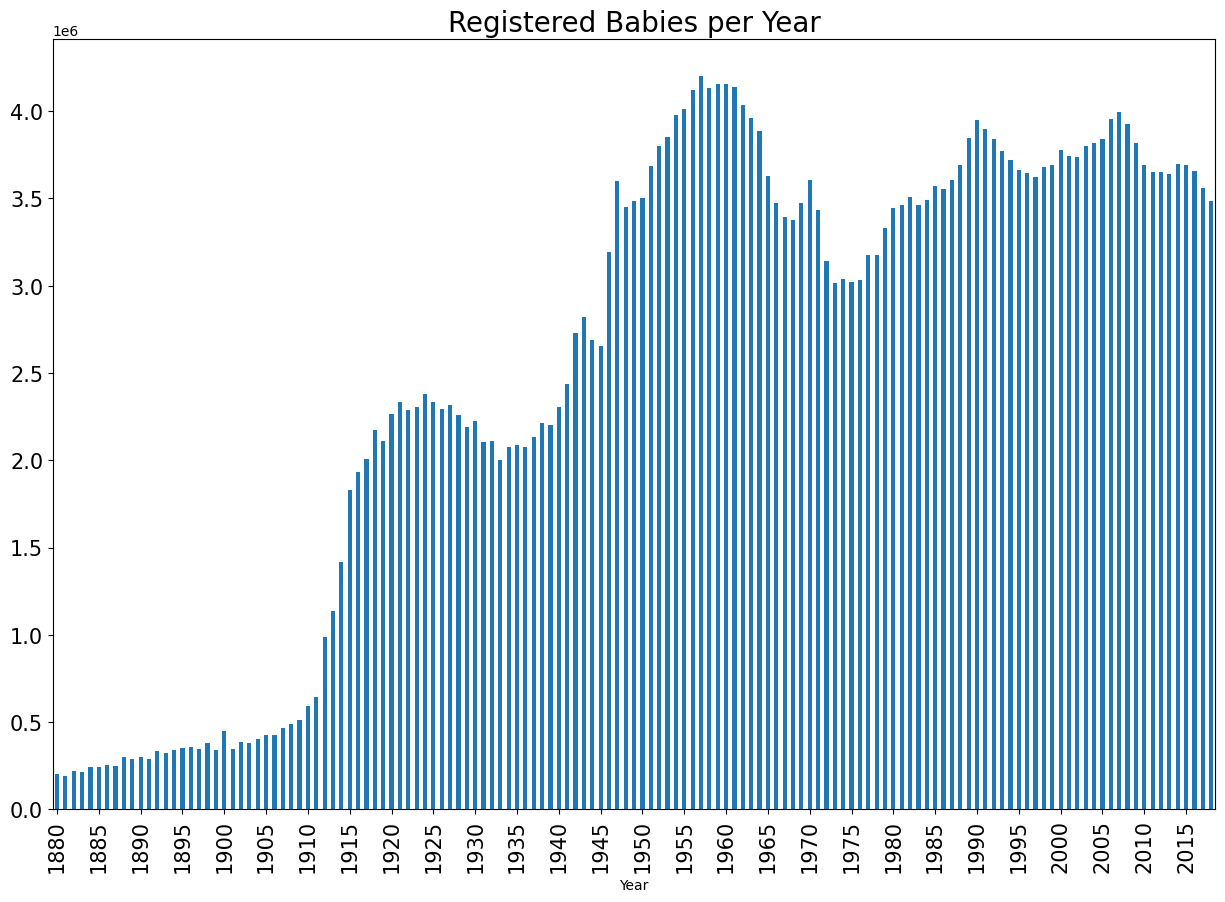

In [27]:
babies_per_year = df.groupby("Year").Count.sum()

babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

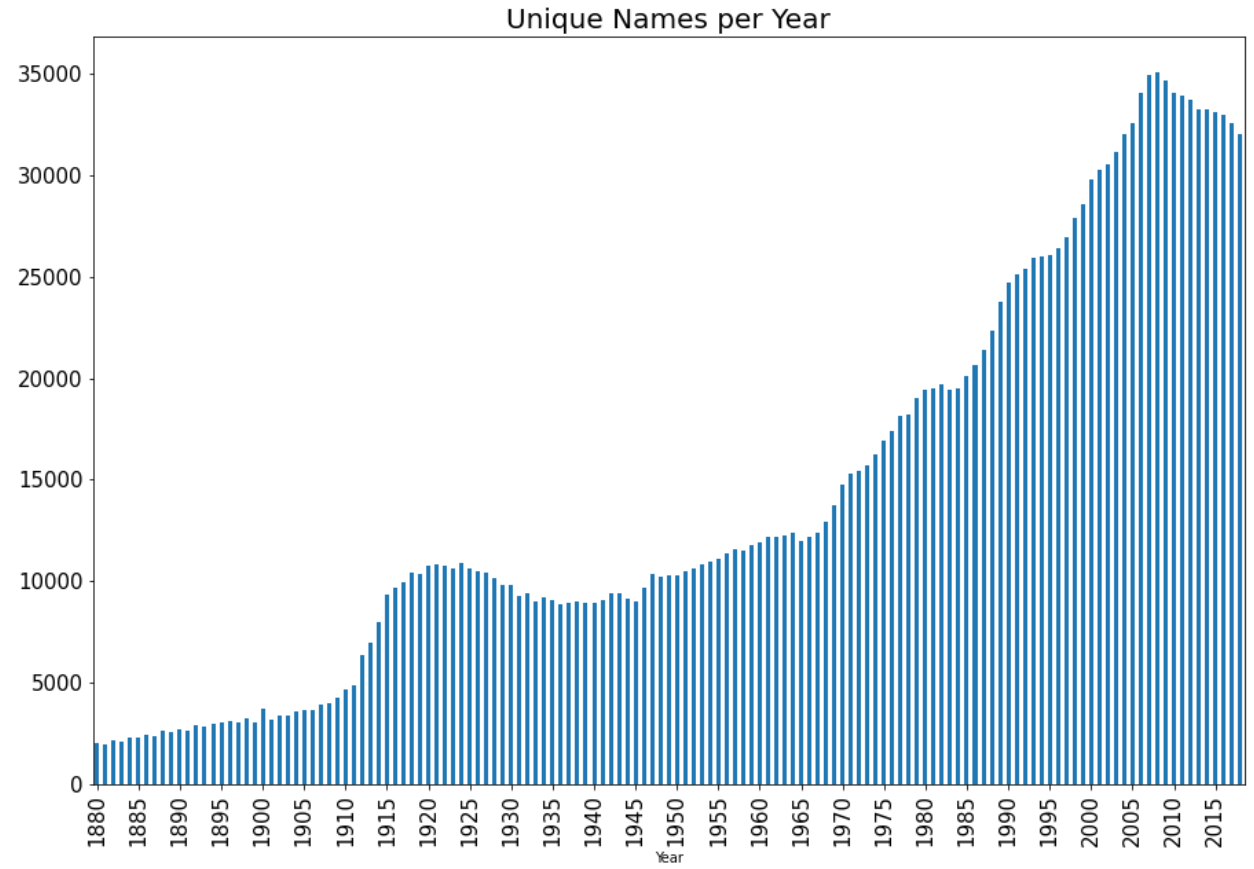

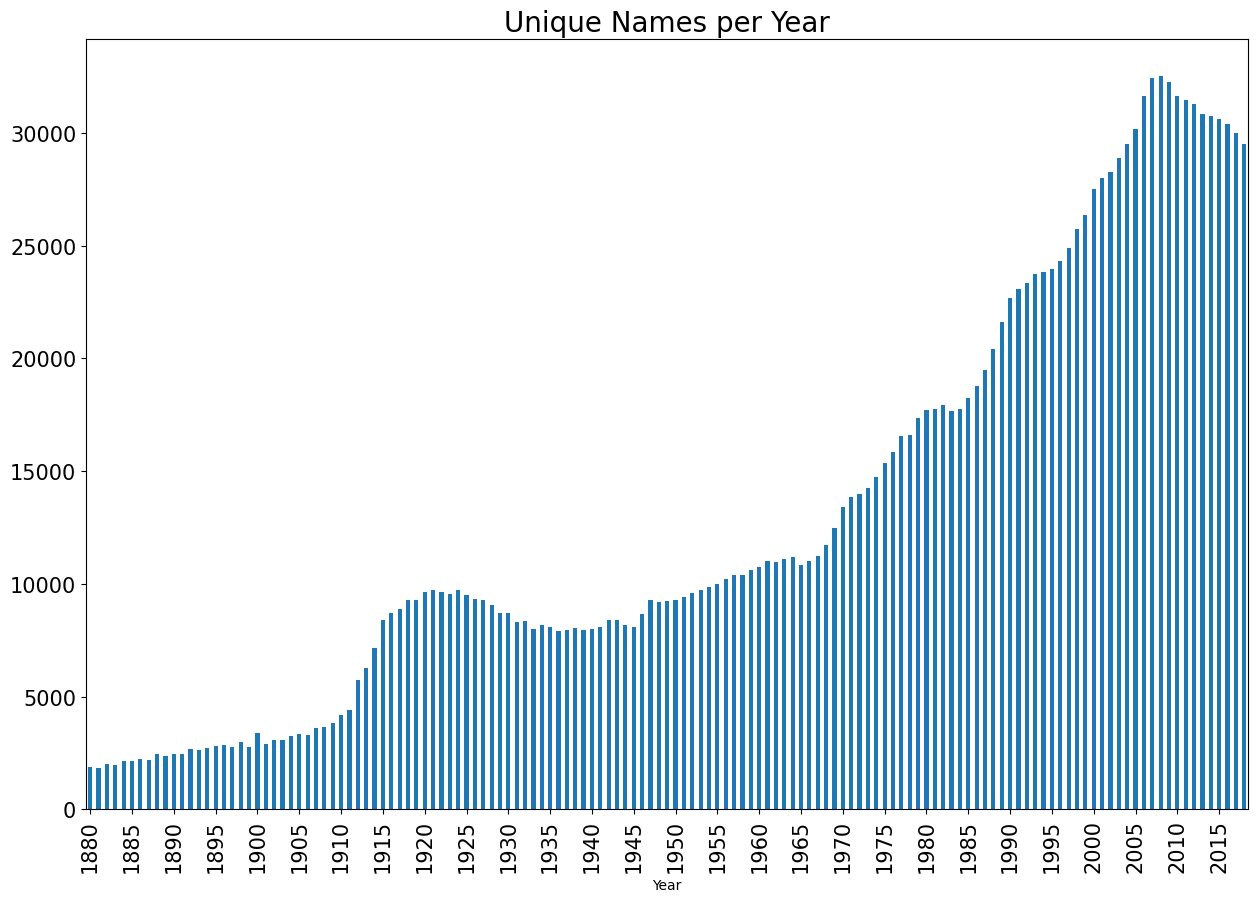

In [28]:
unique_names = df.groupby("Year").Name.nunique()

unique_names.plot(kind="bar", figsize=(15, 10), fontsize=15)
plt.xticks(ticks=(range(0, len(unique_names), 5)), labels=range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize=20)
plt.show()

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [29]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [30]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum")) * 1000000

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [31]:
# df["Rank"] = df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))
df["Rank"] = df.groupby(['Year', 'Gender'])['Count'].rank(ascending=False)

After adding "Popularity" and "Rank", df should look as follows:

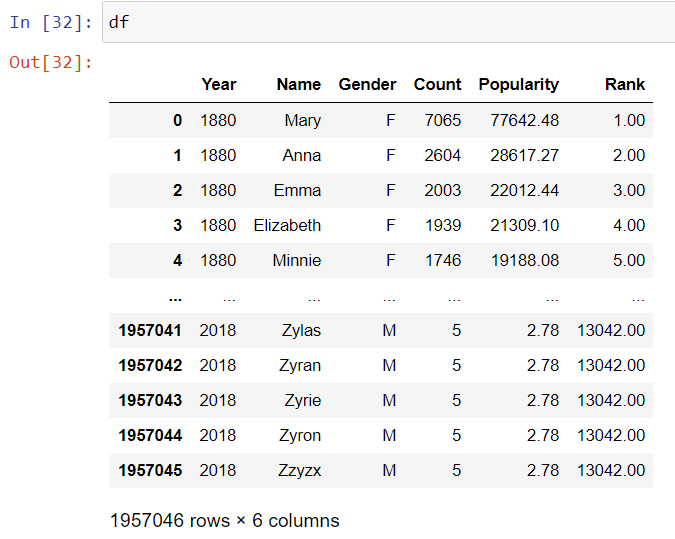

In [32]:
df

Year       Name Gender  Count  Popularity     Rank
0        1880       Mary      F   7065    77642.48     1.00
1        1880       Anna      F   2604    28617.27     2.00
2        1880       Emma      F   2003    22012.44     3.00
3        1880  Elizabeth      F   1939    21309.10     4.00
4        1880     Minnie      F   1746    19188.08     5.00
...       ...        ...    ...    ...         ...      ...
1957041  2018      Zylas      M      5        2.78 13042.00
1957042  2018      Zyran      M      5        2.78 13042.00
1957043  2018      Zyrie      M      5        2.78 13042.00
1957044  2018      Zyron      M      5        2.78 13042.00
1957045  2018      Zzyzx      M      5        2.78 13042.00

[1957046 rows x 6 columns]

## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

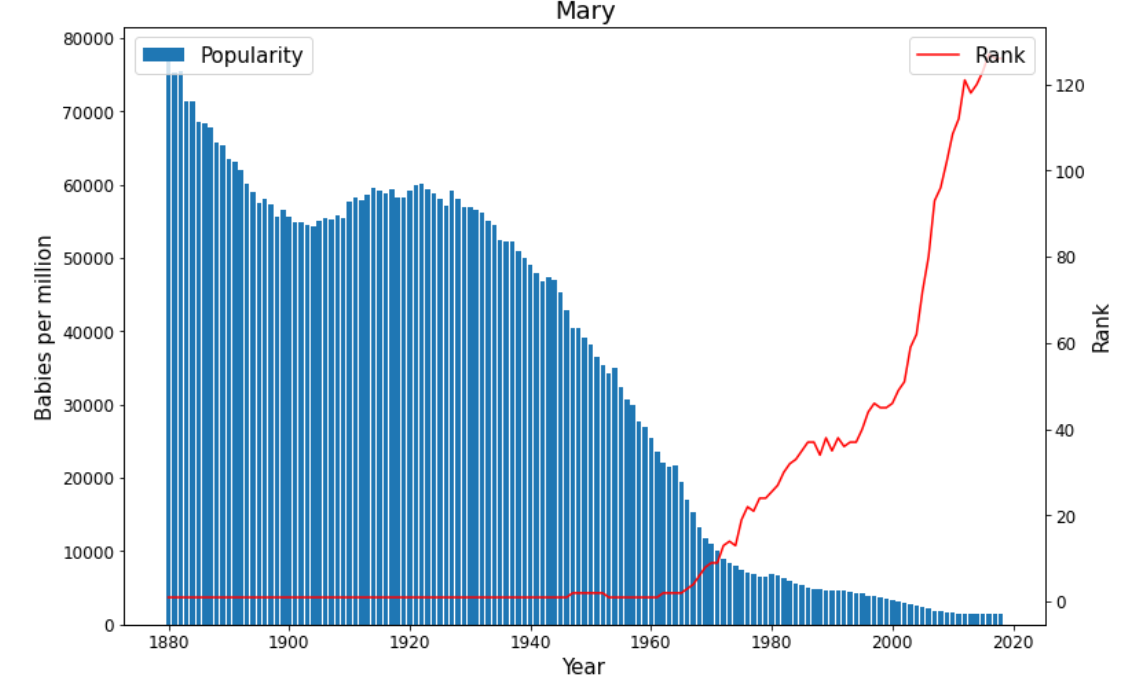

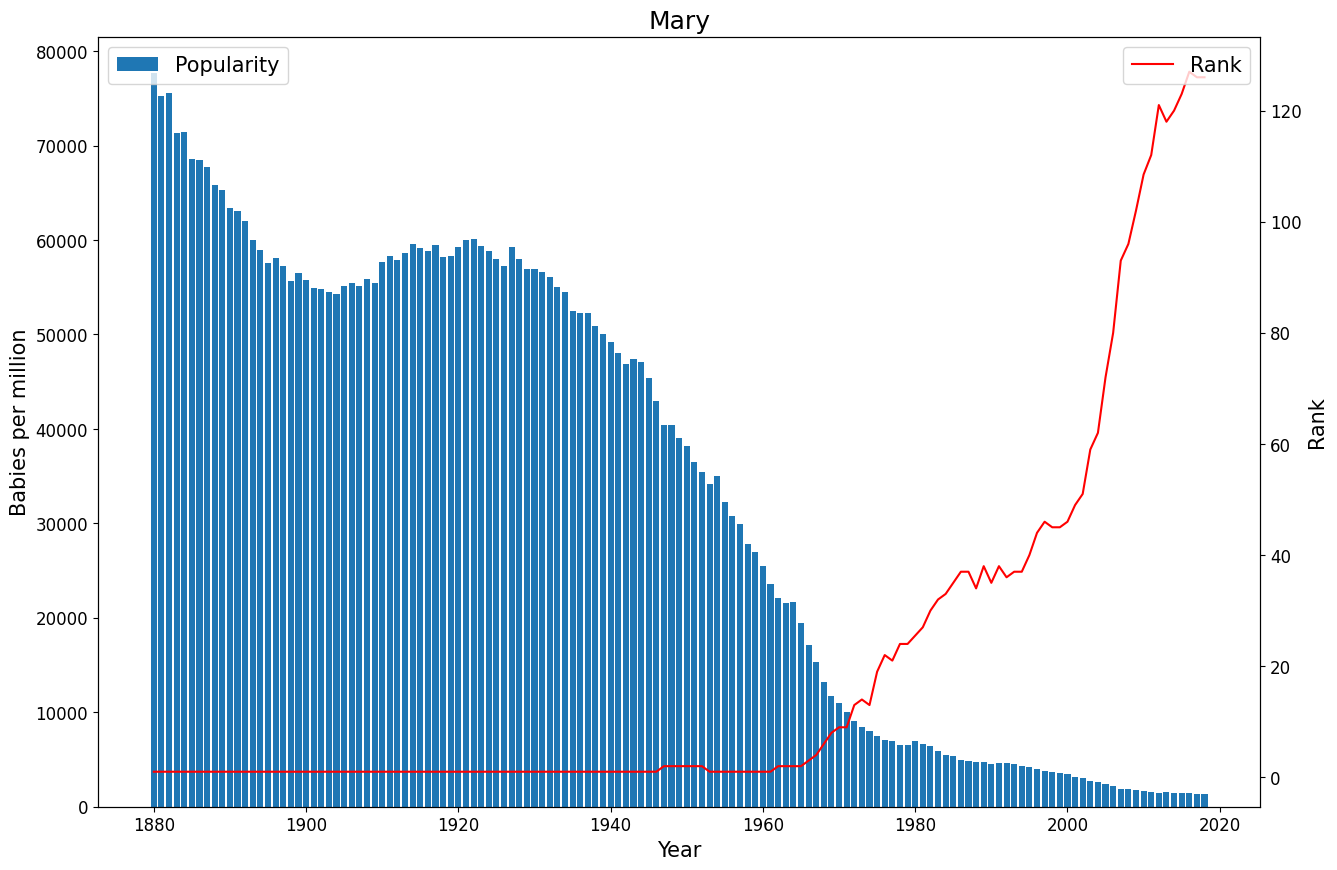

In [33]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]

fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.bar(mary.Year, mary.Popularity, label="Popularity")

ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color="red", label="Rank")

ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [34]:
def plot_name(name, gender, crit="Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")

    fig, ax1 = plt.subplots(figsize=(15, 10))
    ax1.bar(data.index, data[crit], label=crit)

    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color="red", label="Rank")

    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()


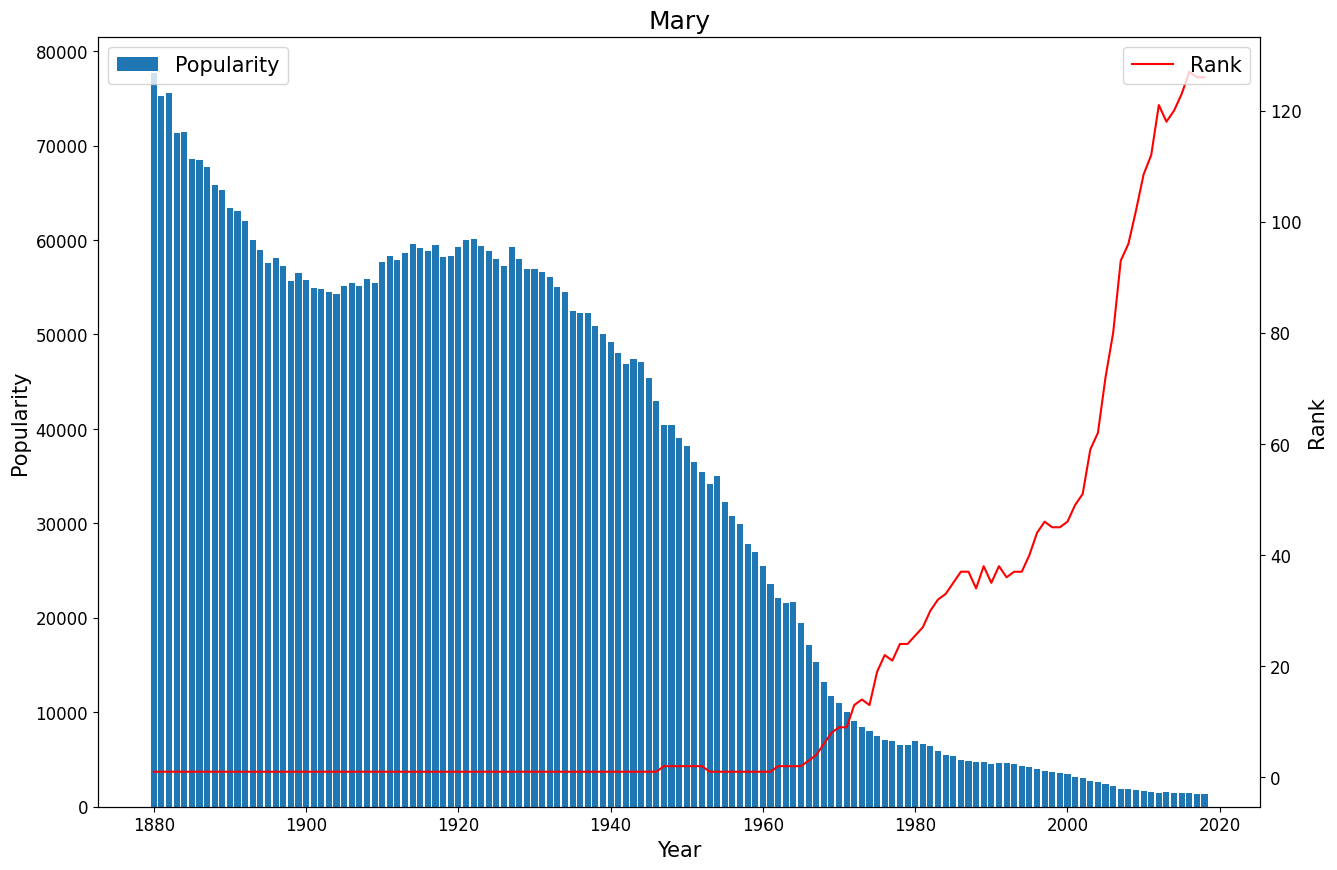

In [35]:
plot_name("Mary", "F")

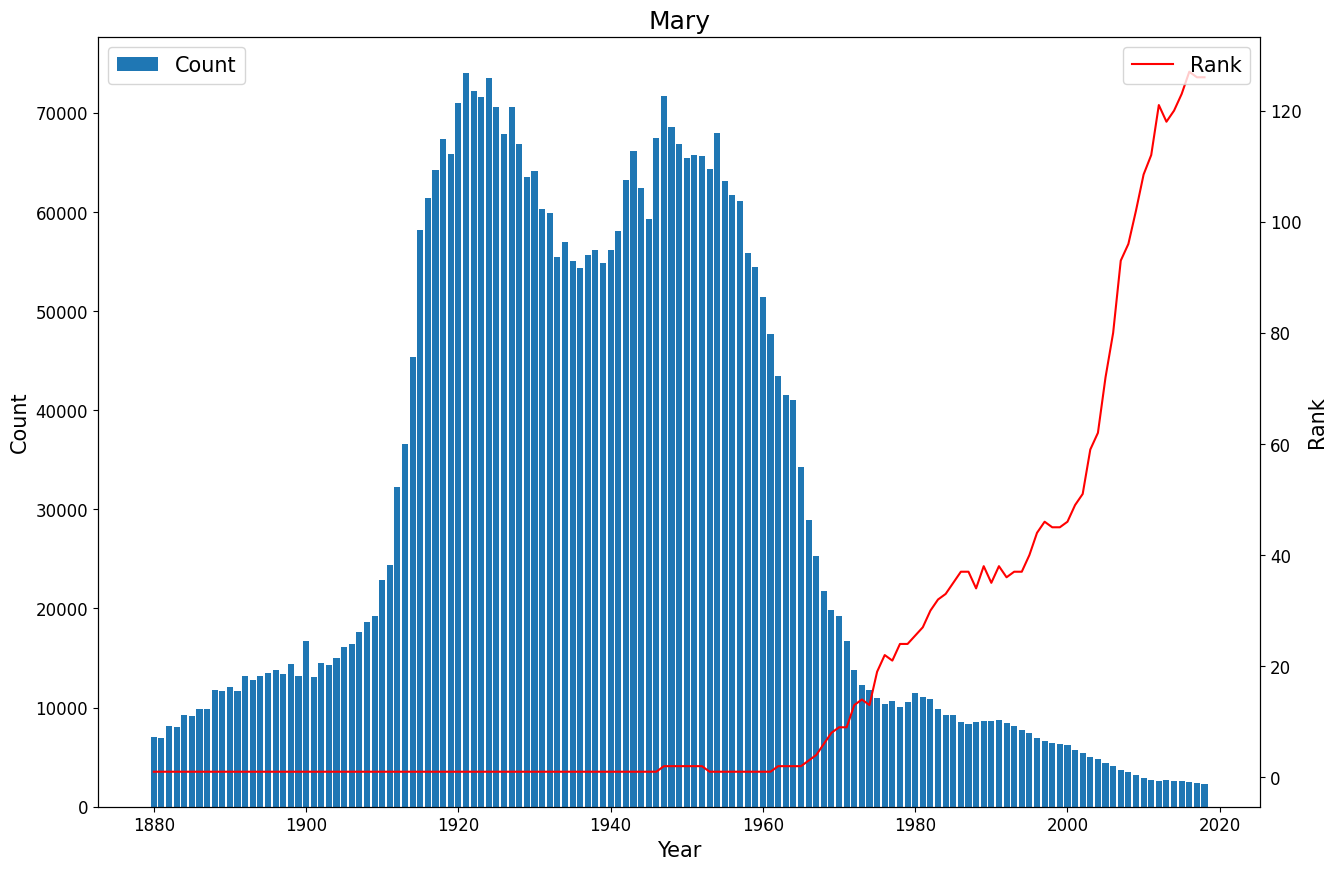

In [36]:
plot_name("Mary", "F", crit = "Count")

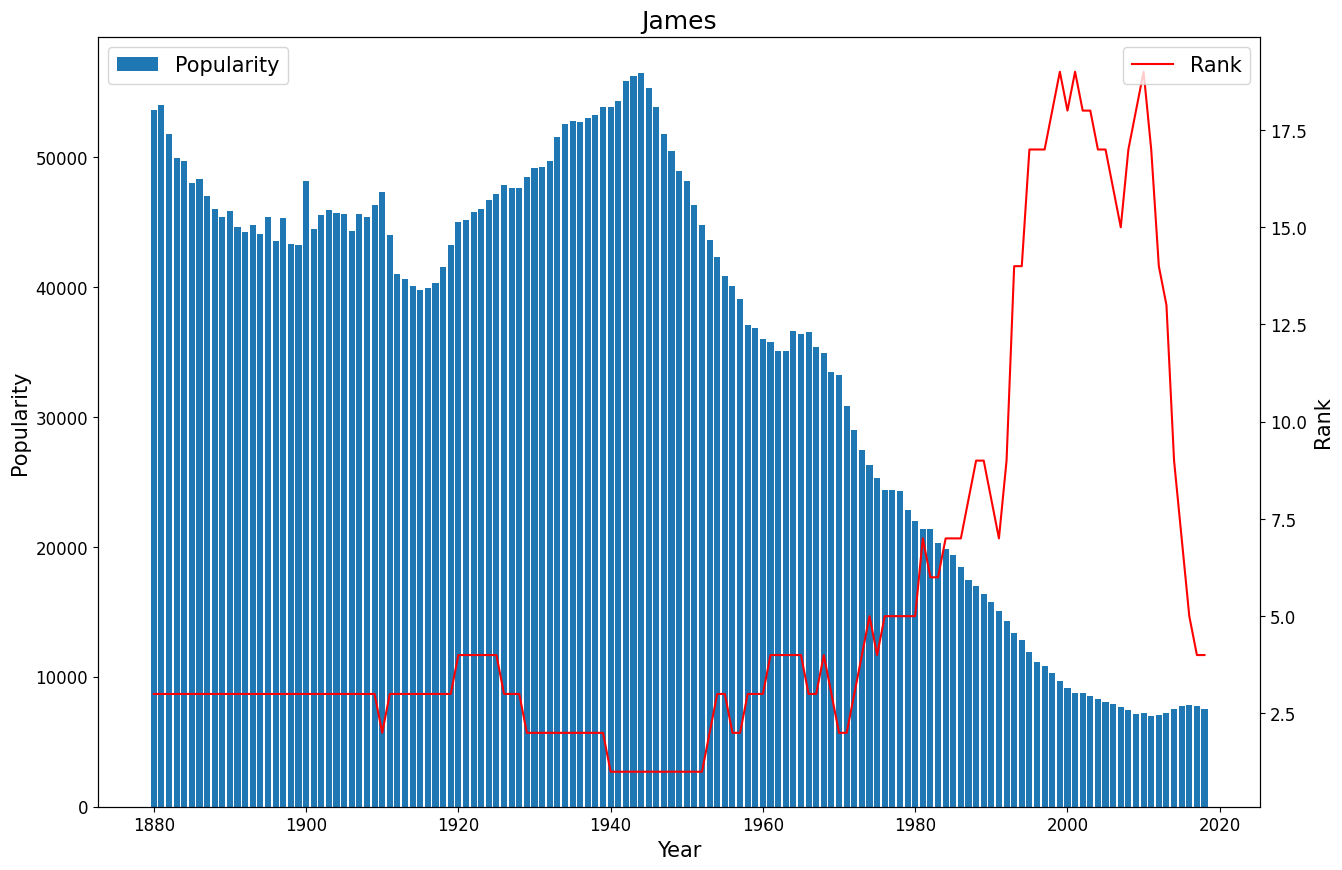

In [37]:
plot_name("James", "M", crit = "Popularity")

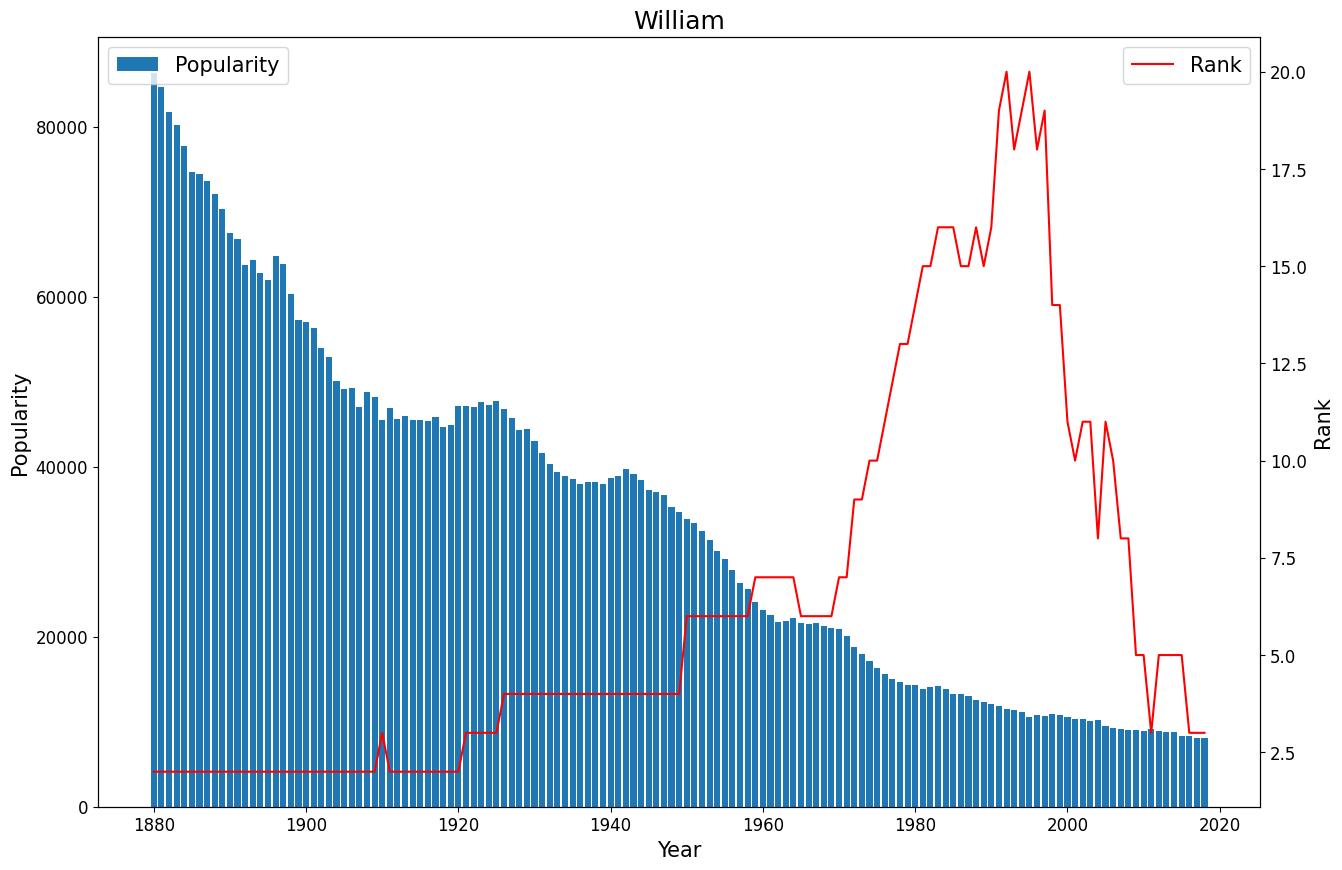

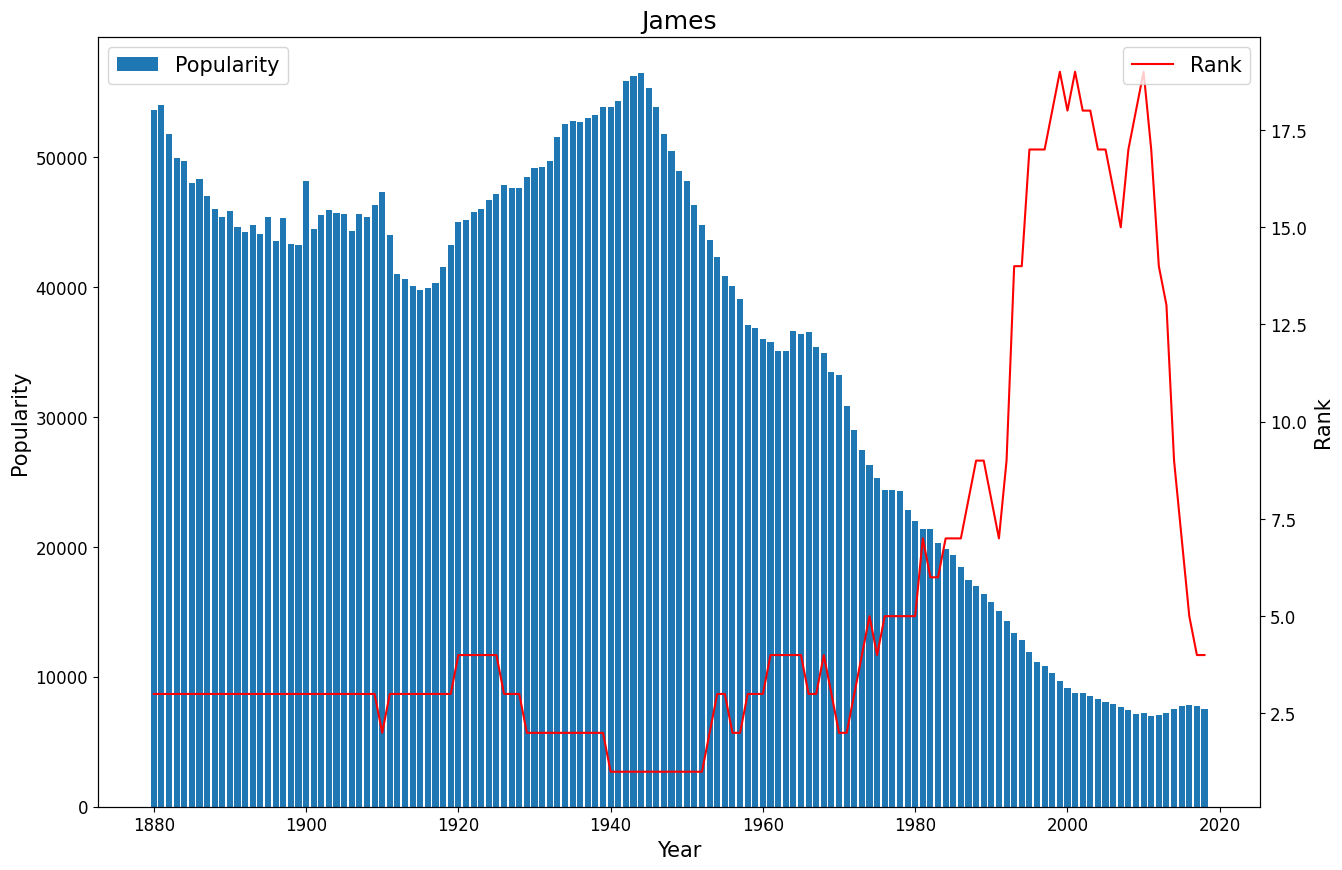

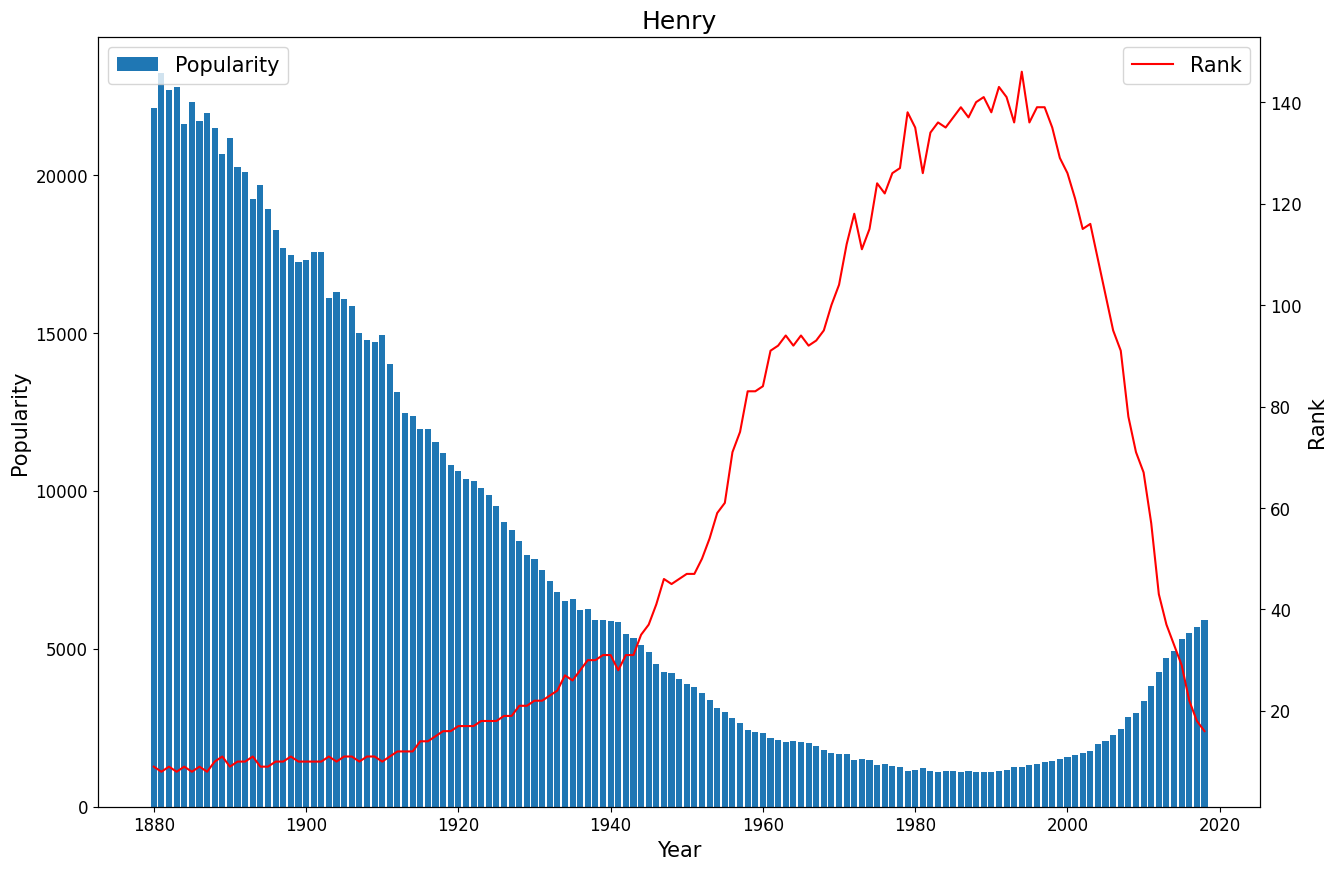

In [38]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

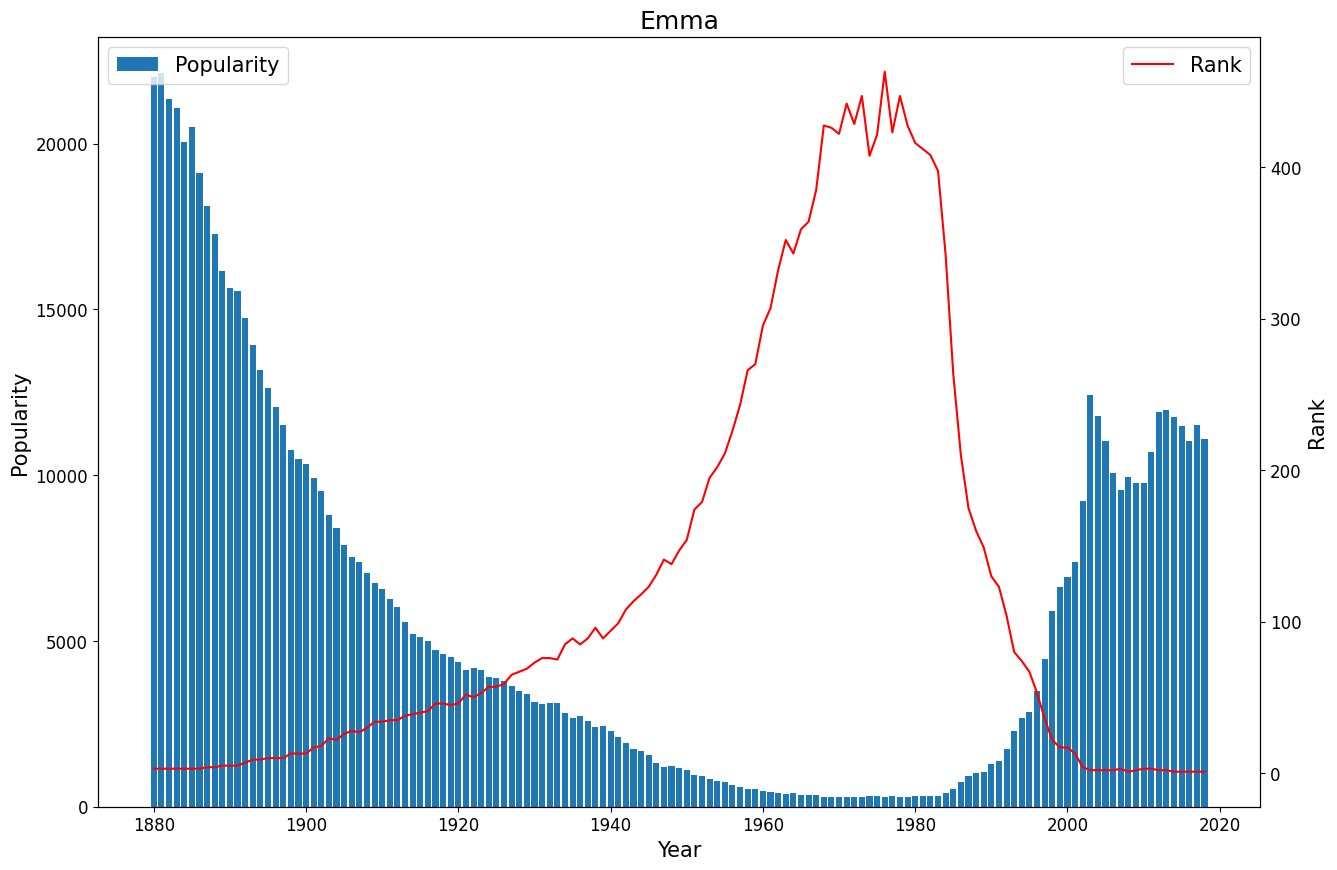

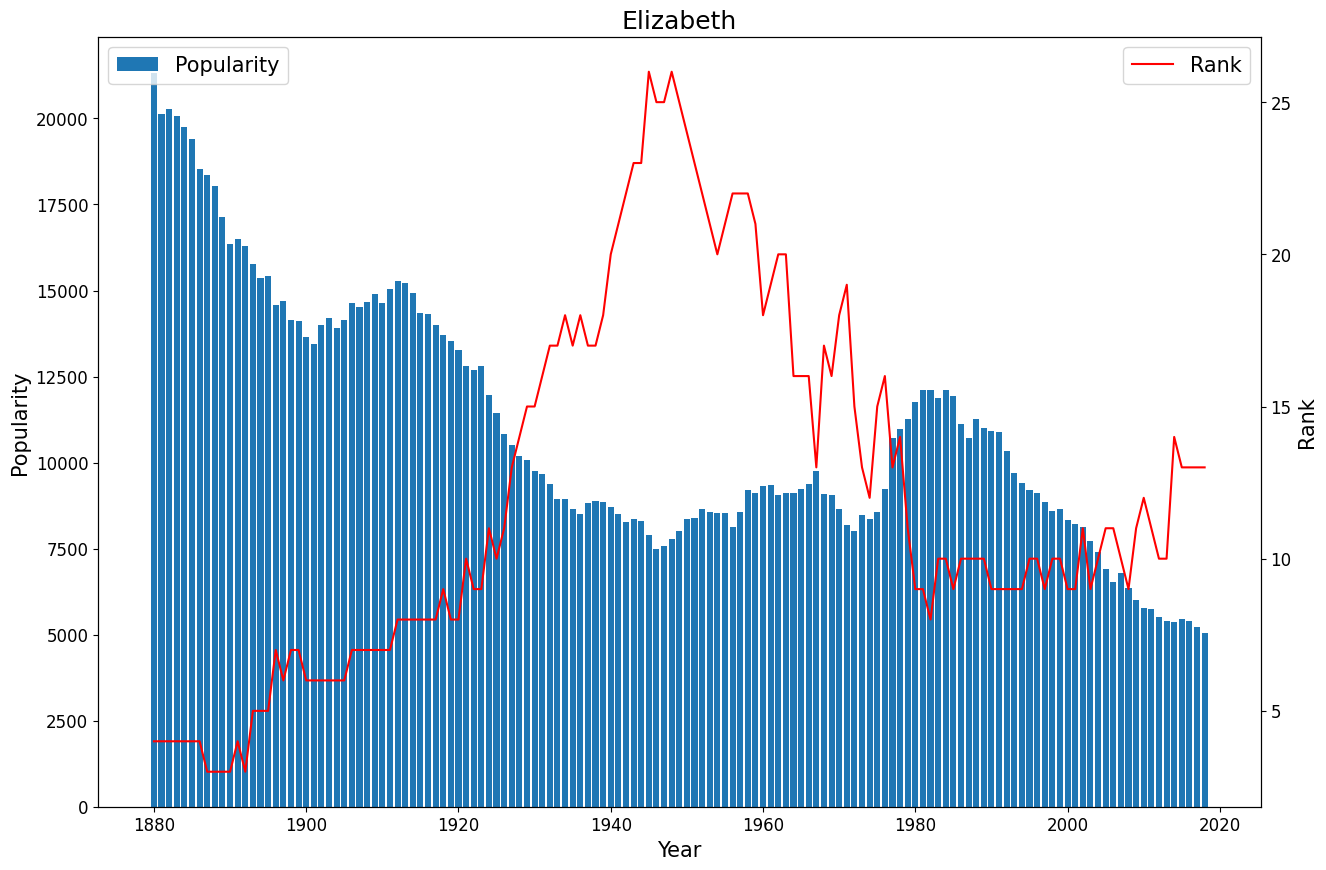

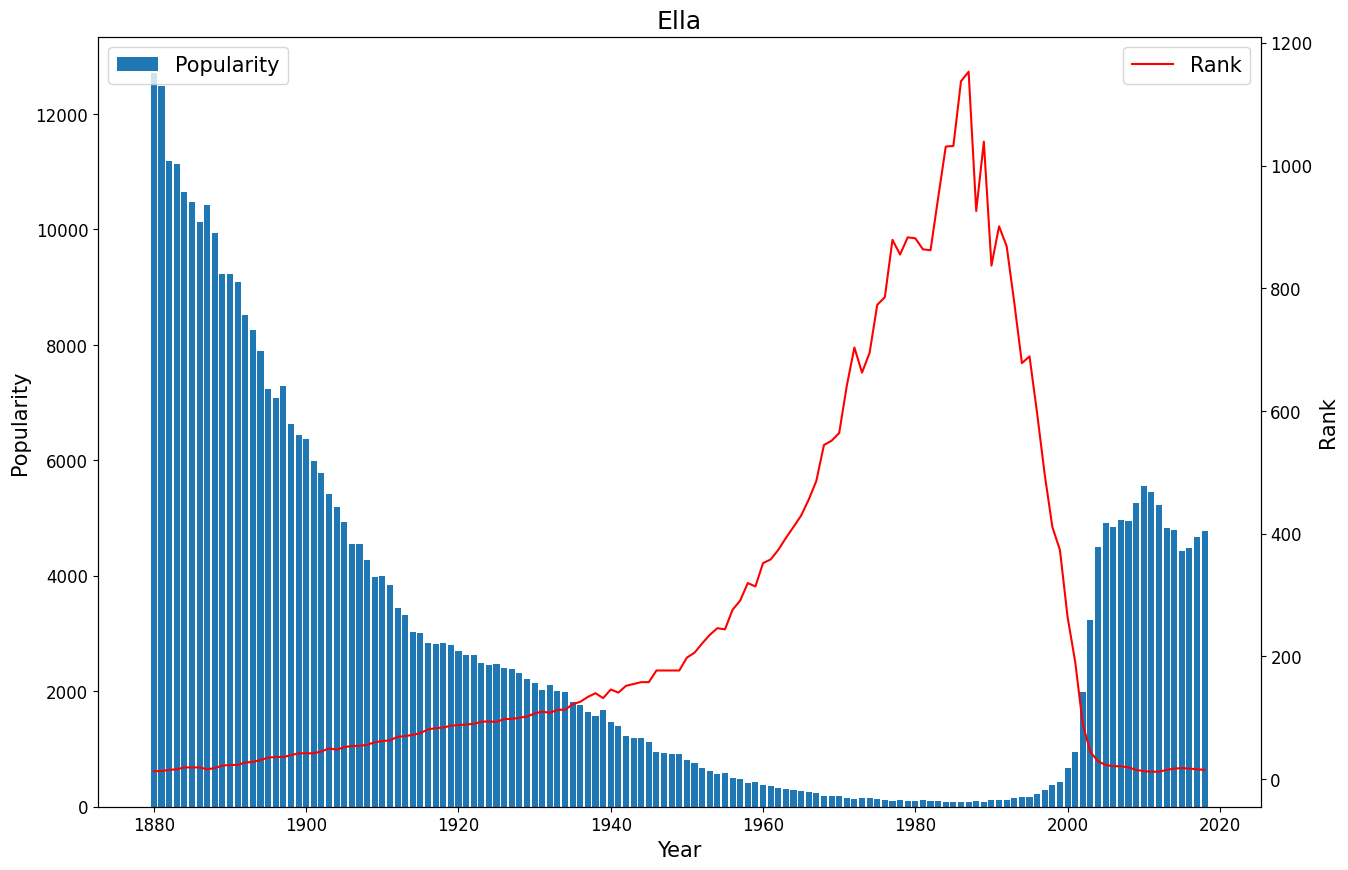

In [39]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [44]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"]

0         77642.48
2000      75244.96
3935      75551.48
6062      71332.54
8146      71439.09
            ...   
1793168    1476.70
1826414    1477.71
1859539    1419.99
1892548    1397.21
1925138    1379.40
Name: Popularity, Length: 139, dtype: float64

In [43]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0              NaN
2000      77642.48
3935      75244.96
6062      75551.48
8146      71332.54
            ...   
1793168    1513.72
1826414    1476.70
1859539    1477.71
1892548    1419.99
1925138    1397.21
Name: Popularity, Length: 139, dtype: float64

In [45]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [46]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [51]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [53]:
df2 = df[df.Year >= 1990].copy()

19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [56]:
df2.nlargest(20, "Pop_diff")

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
1144926  1993    Taylor      F  21267    11758.14  7.00   8108.19   3649.94
1094416  1991    Shelby      F  10218     5450.43 33.00   1852.87   3597.55
1160742  1993    Austin      M  17579     8965.52 26.00   5735.76   3229.76
1423421  2003      Emma      F  22706    12433.65  2.00   9209.49   3224.16
1186654  1994    Austin      M  23190    12006.13 17.00   8965.52   3040.61
1135131  1992     Dylan      M  15062     7543.18 28.00   4832.62   2710.56
1109891  1991     Dylan      M   9761     4832.62 46.00   2148.94   2683.68
1573875  2007    Jayden      M  15244     7350.81 18.00   4686.06   2664.76
1486661  2005       Ava      F  13605     7367.89  9.00   4710.39   2657.50
1119509  1992    Taylor      F  14948     8108.19 17.00   5469.63   2638.57
1711676  2011     Mason      M  19510    10286.97  2.00   7745.99   2540.98
1109861  1991     Tyler      M  25207    12479.86 16.00  10050.61   2429.24
1084928  1990    Jordan      M  16134     7858.33 29.00   5435.82   2422.51
1658040  2010    Sophia      F  20643    11627.60  2.00   9233.48   2394.12
1519229  2006   Addison      F   7620     4010.90 28.00   1637.13   2373.77
1677865  2010     Mason      M  14845     7745.99 12.00   5392.43   2353.56
1623330  2009  Isabella      F  22306    12155.45  1.00   9854.59   2300.86
1084920  1990     Tyler      M  20635    10050.61 21.00   7792.81   2257.80
1553300  2007   Addison      F  11946     6218.46 11.00   4010.90   2207.57
1094452  1991    Mariah      F   5192     2769.49 69.00    581.10   2188.39

20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

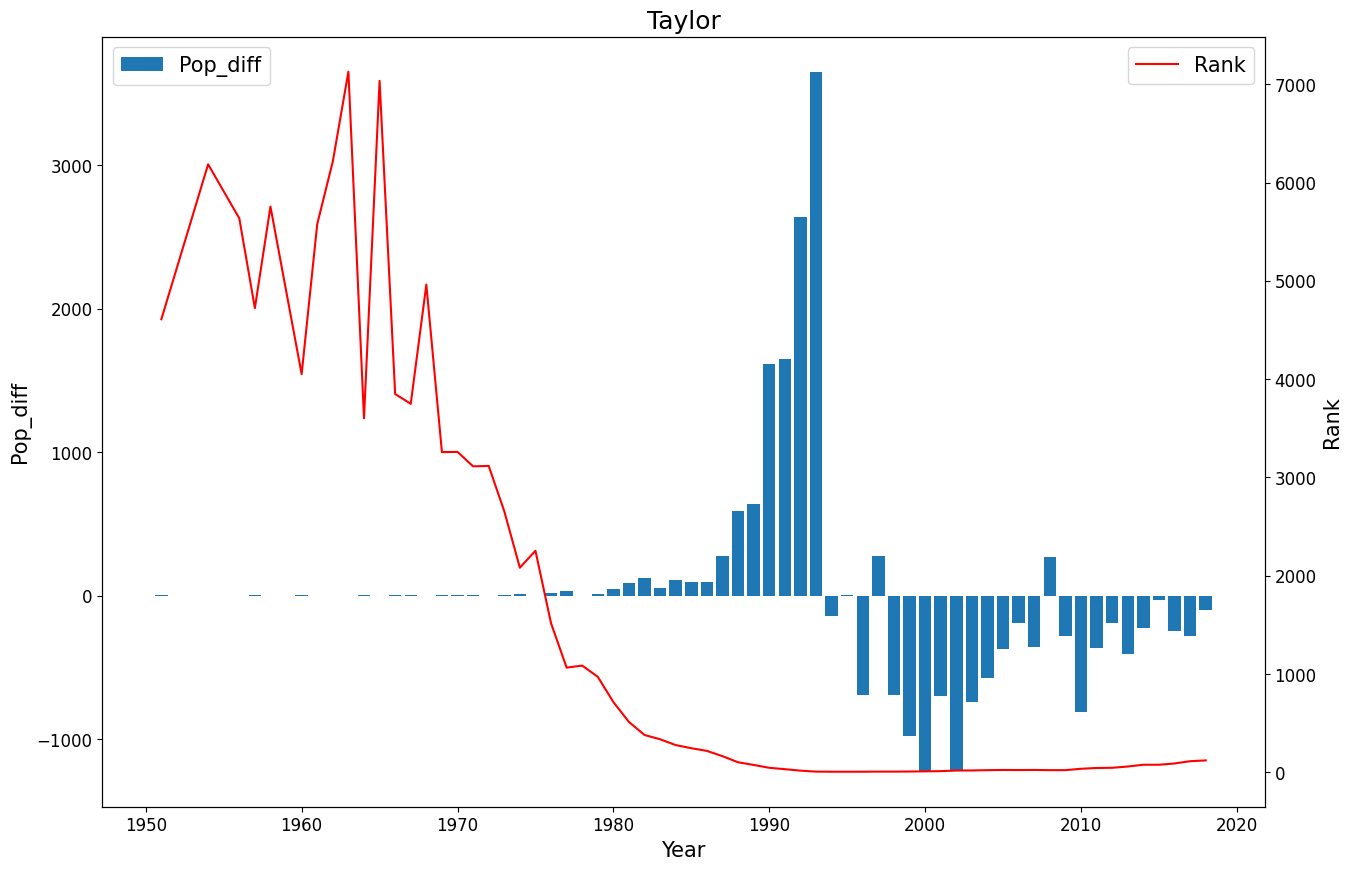

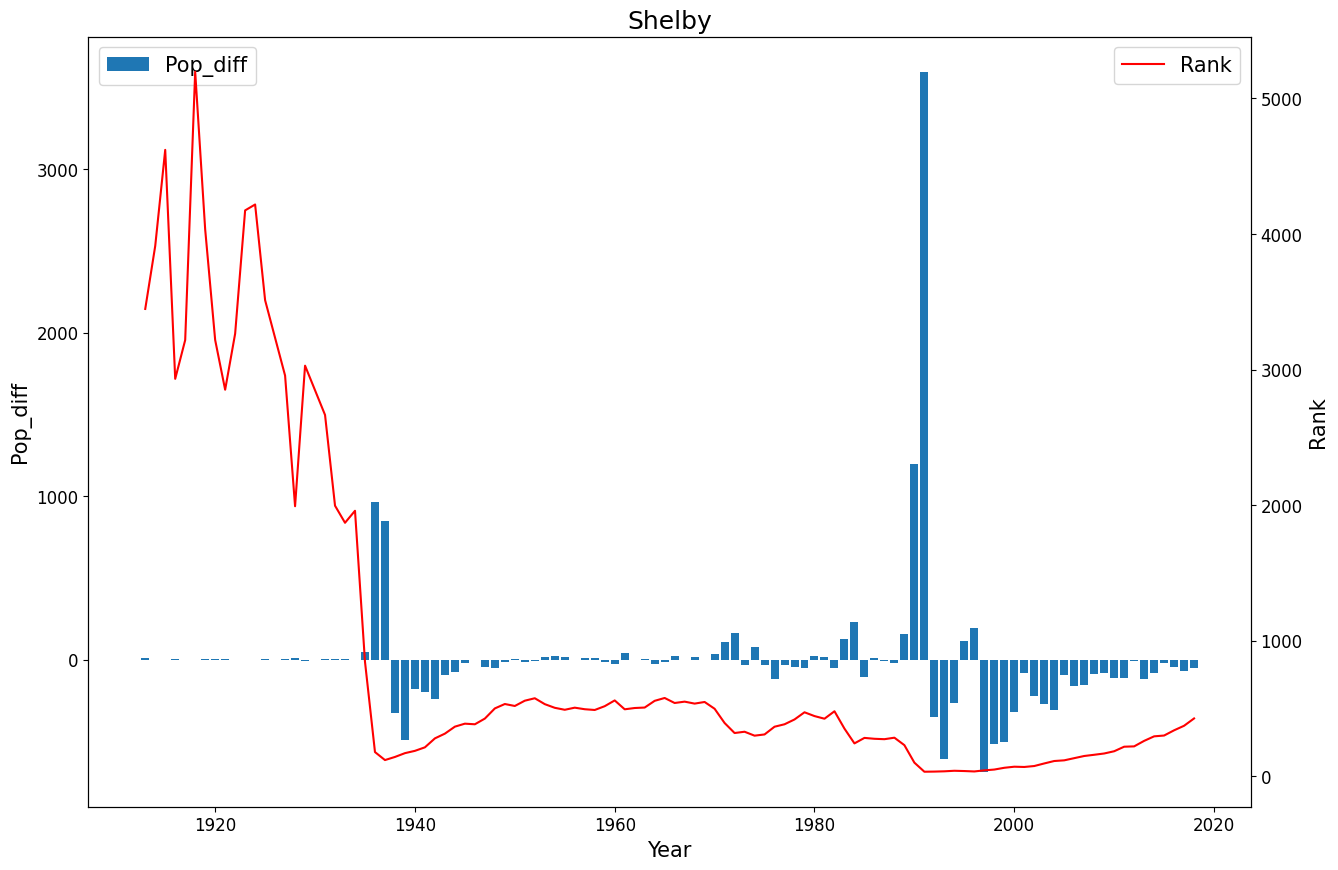

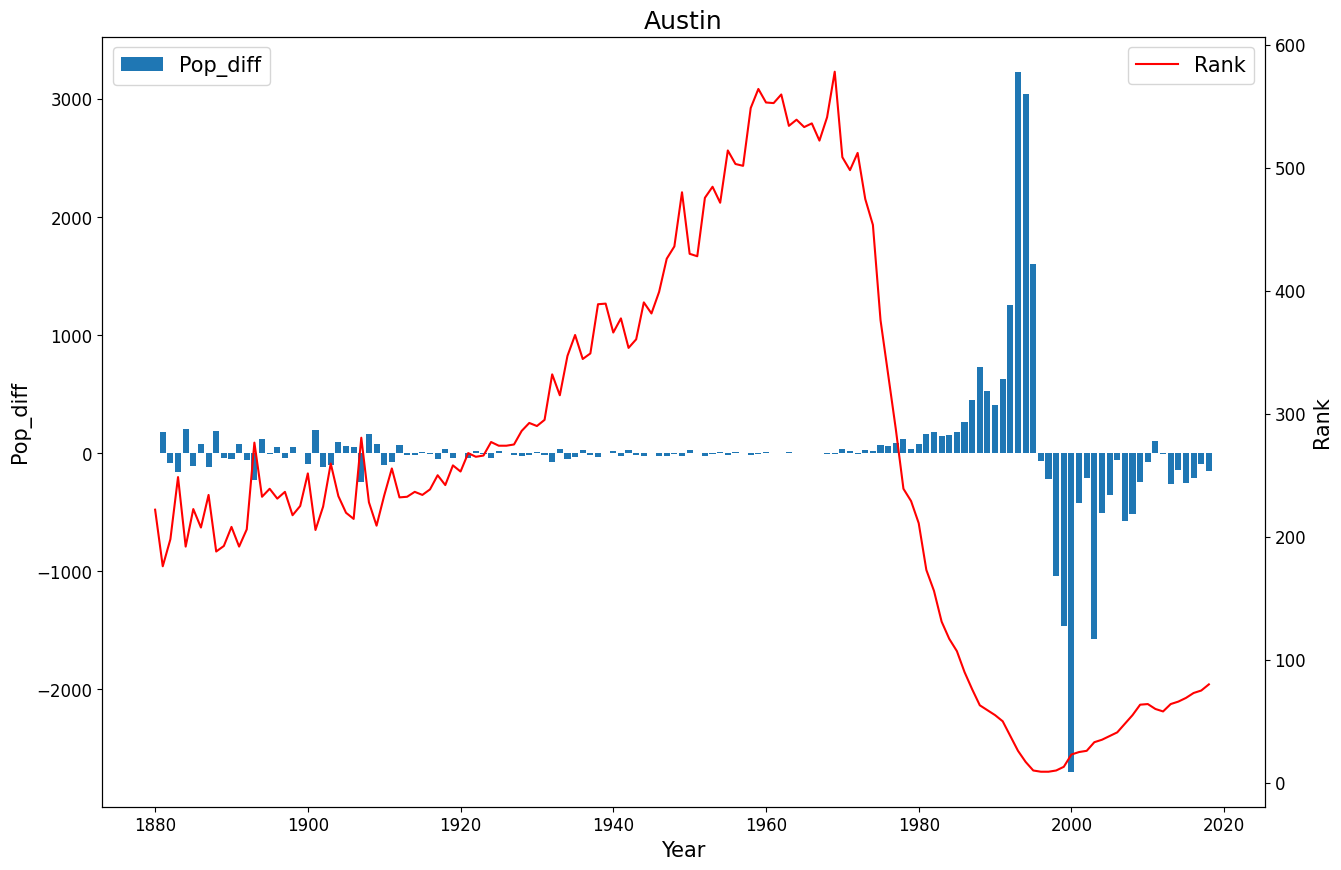

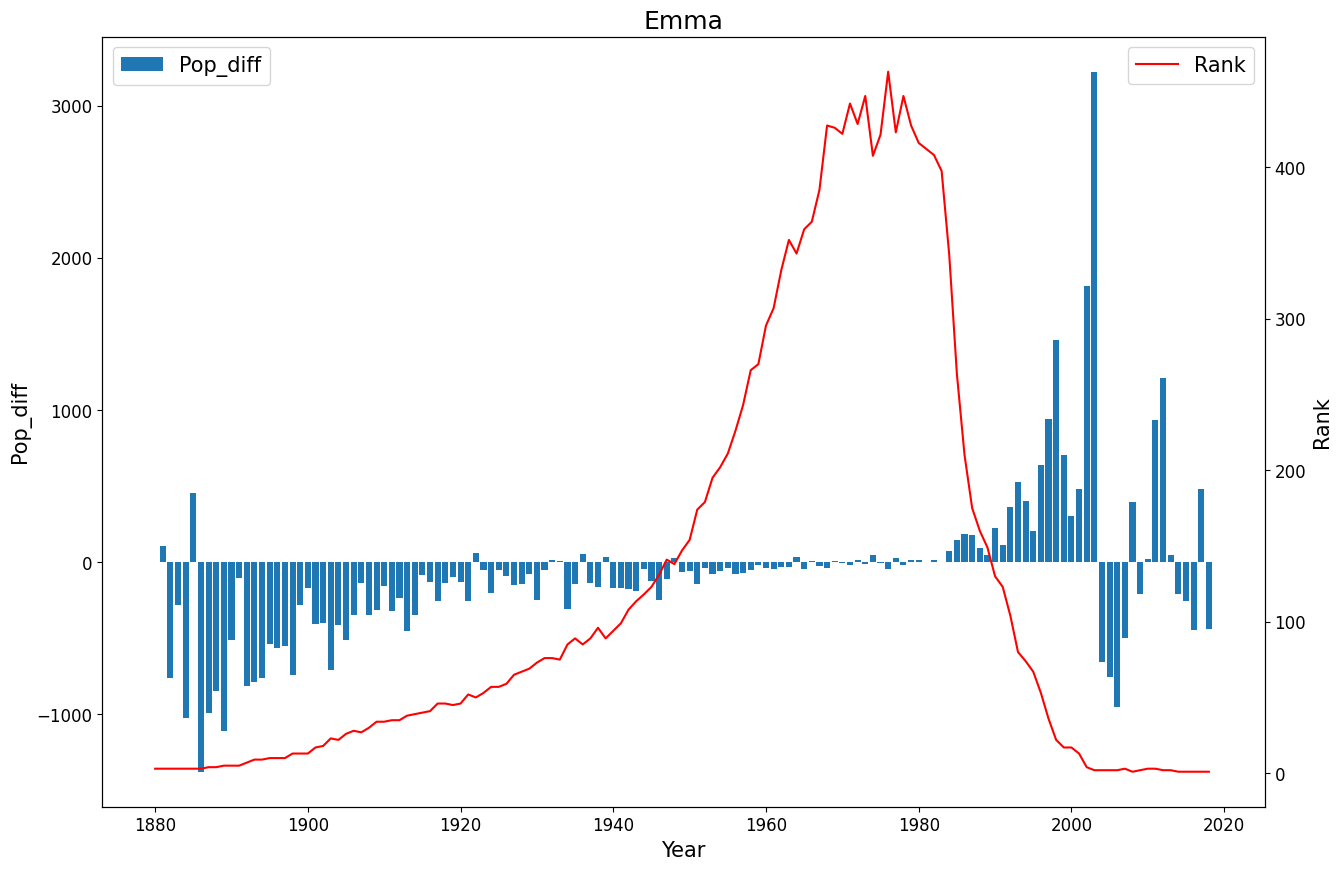

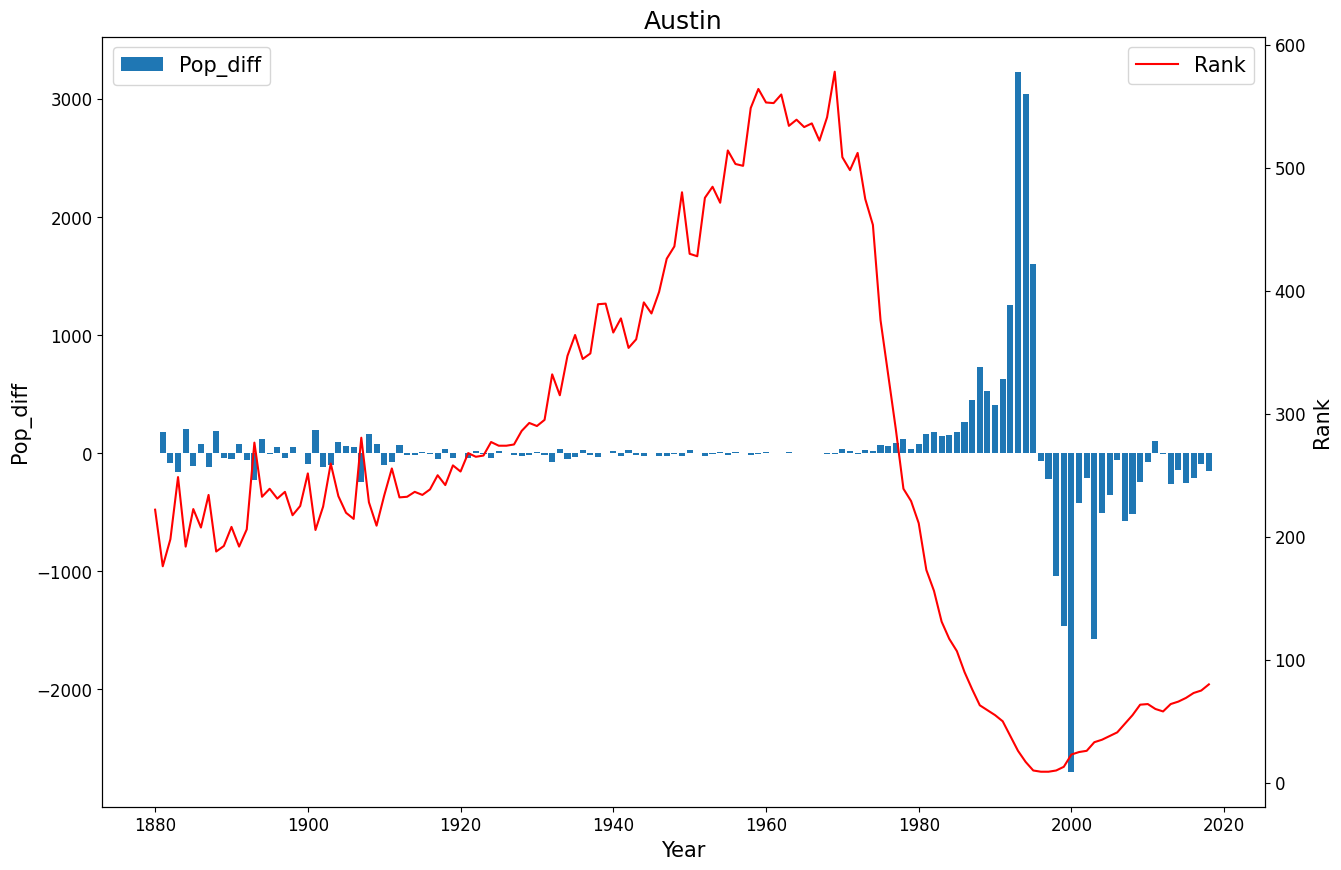

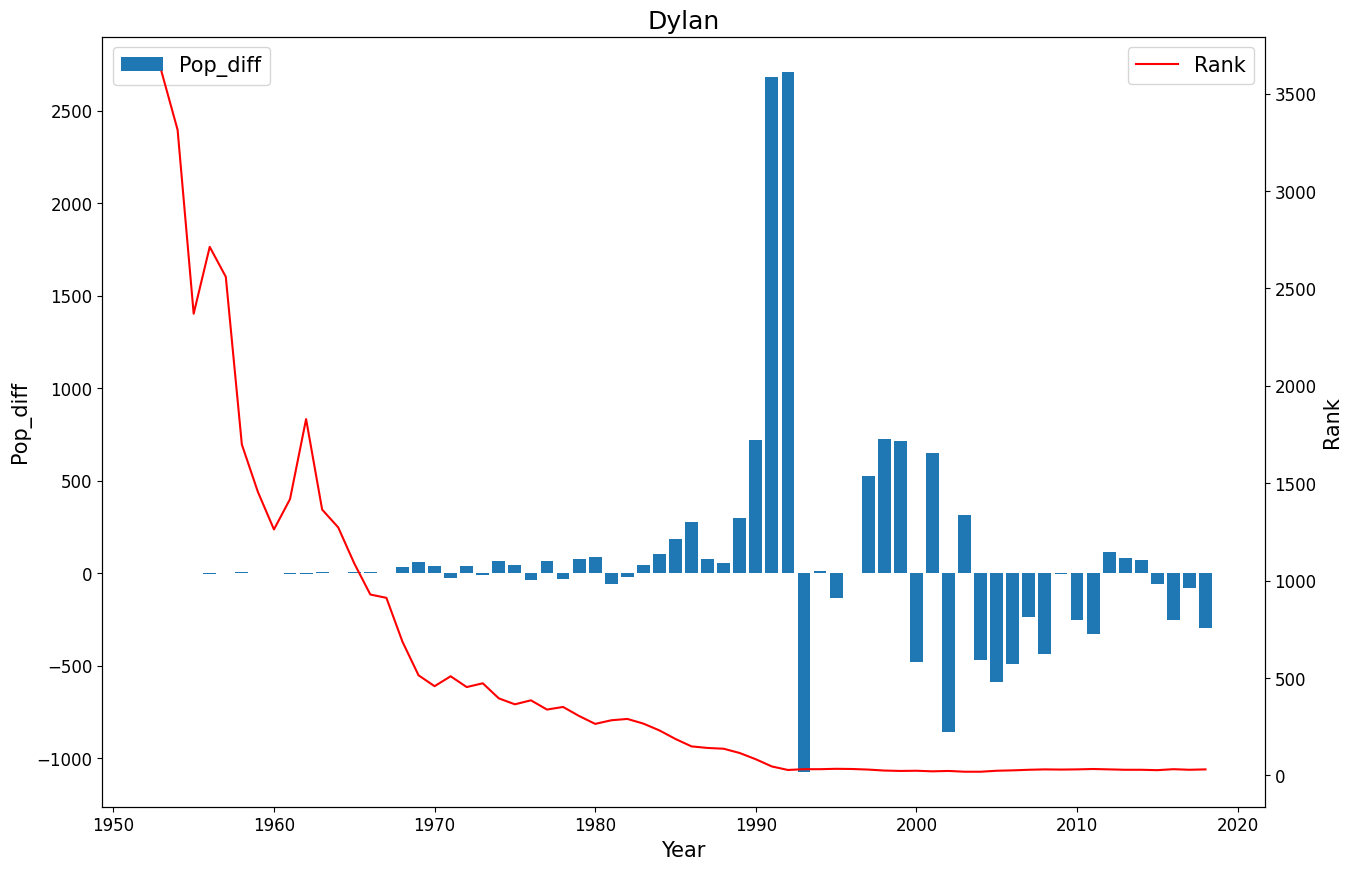

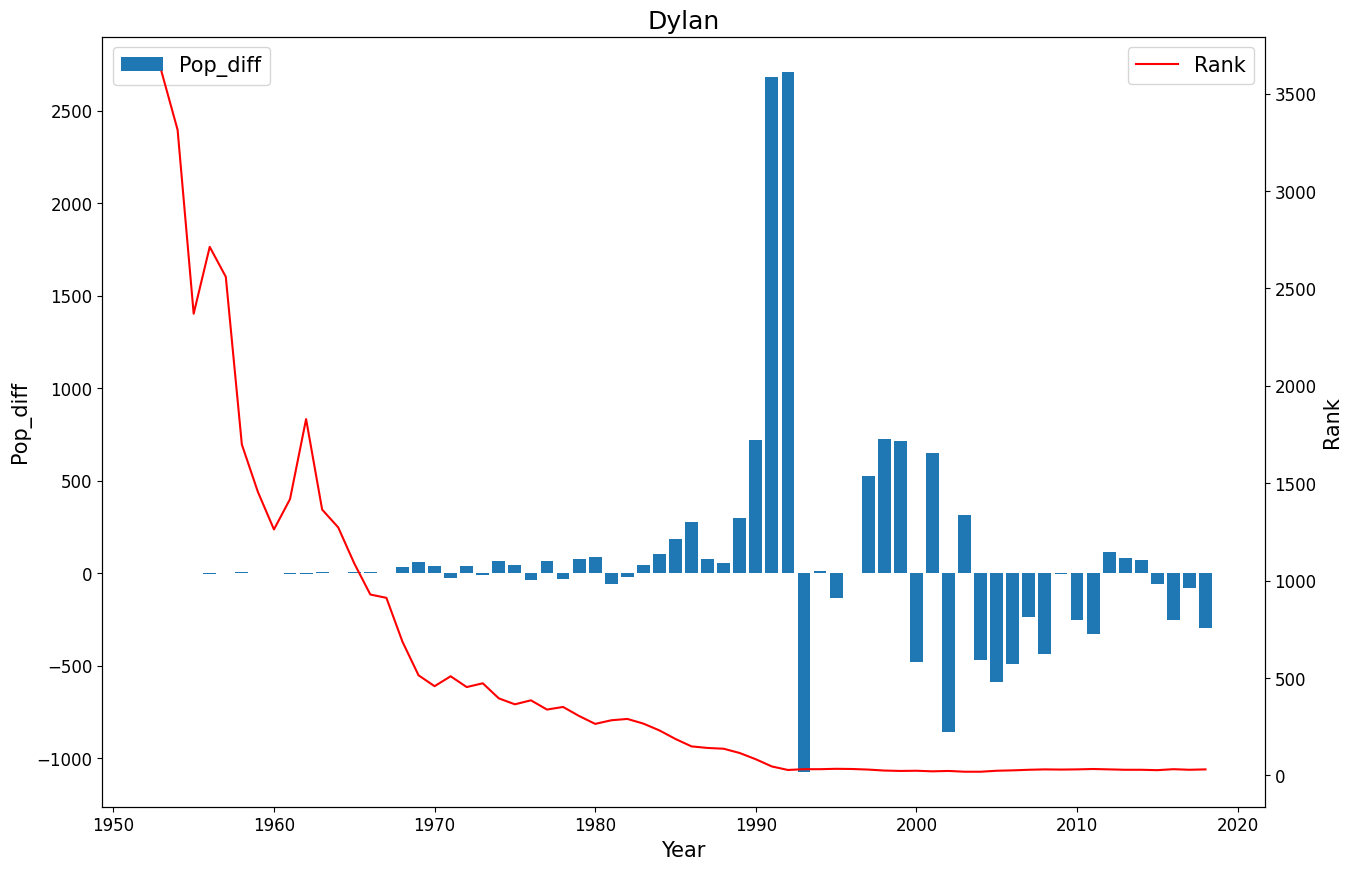

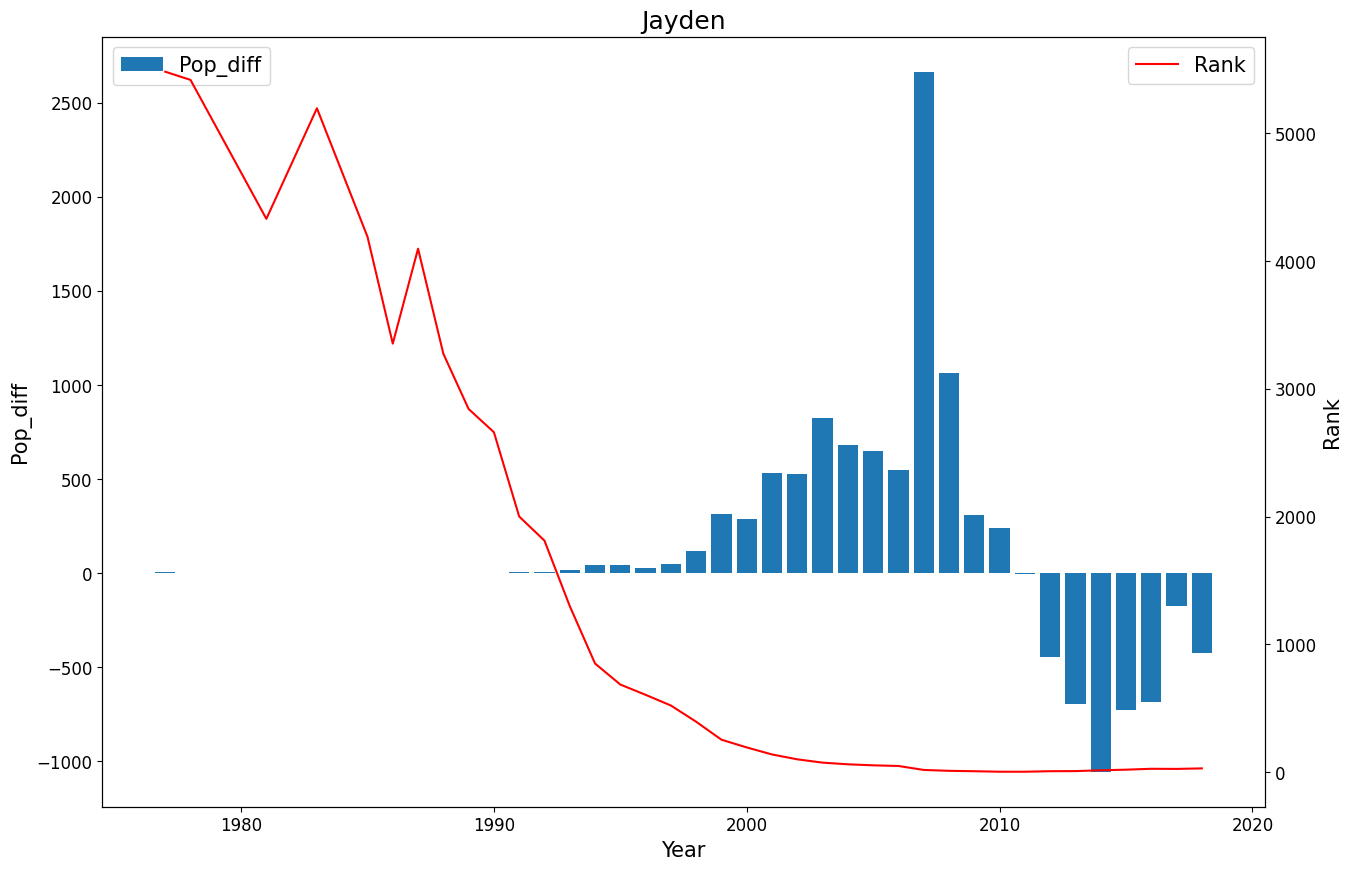

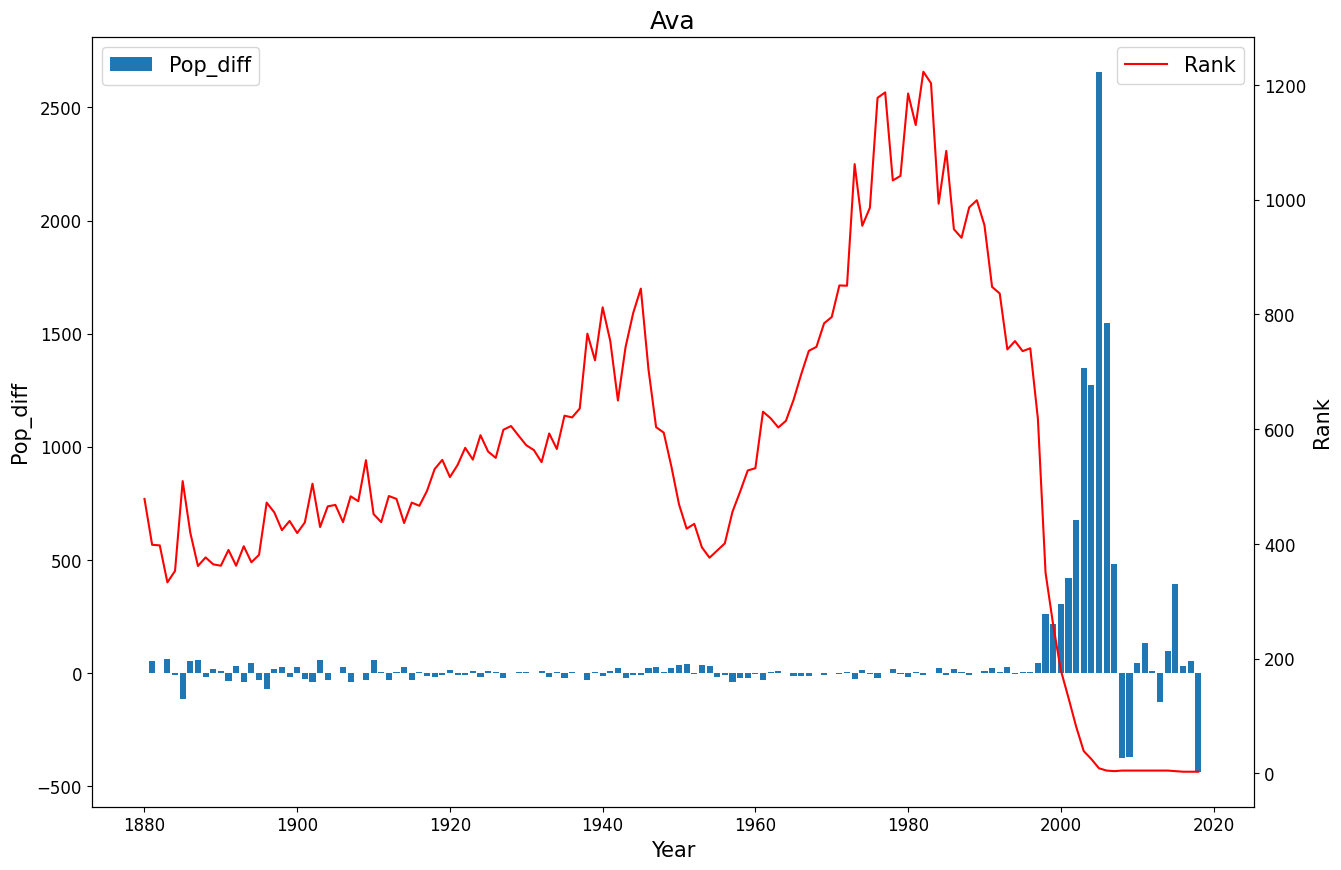

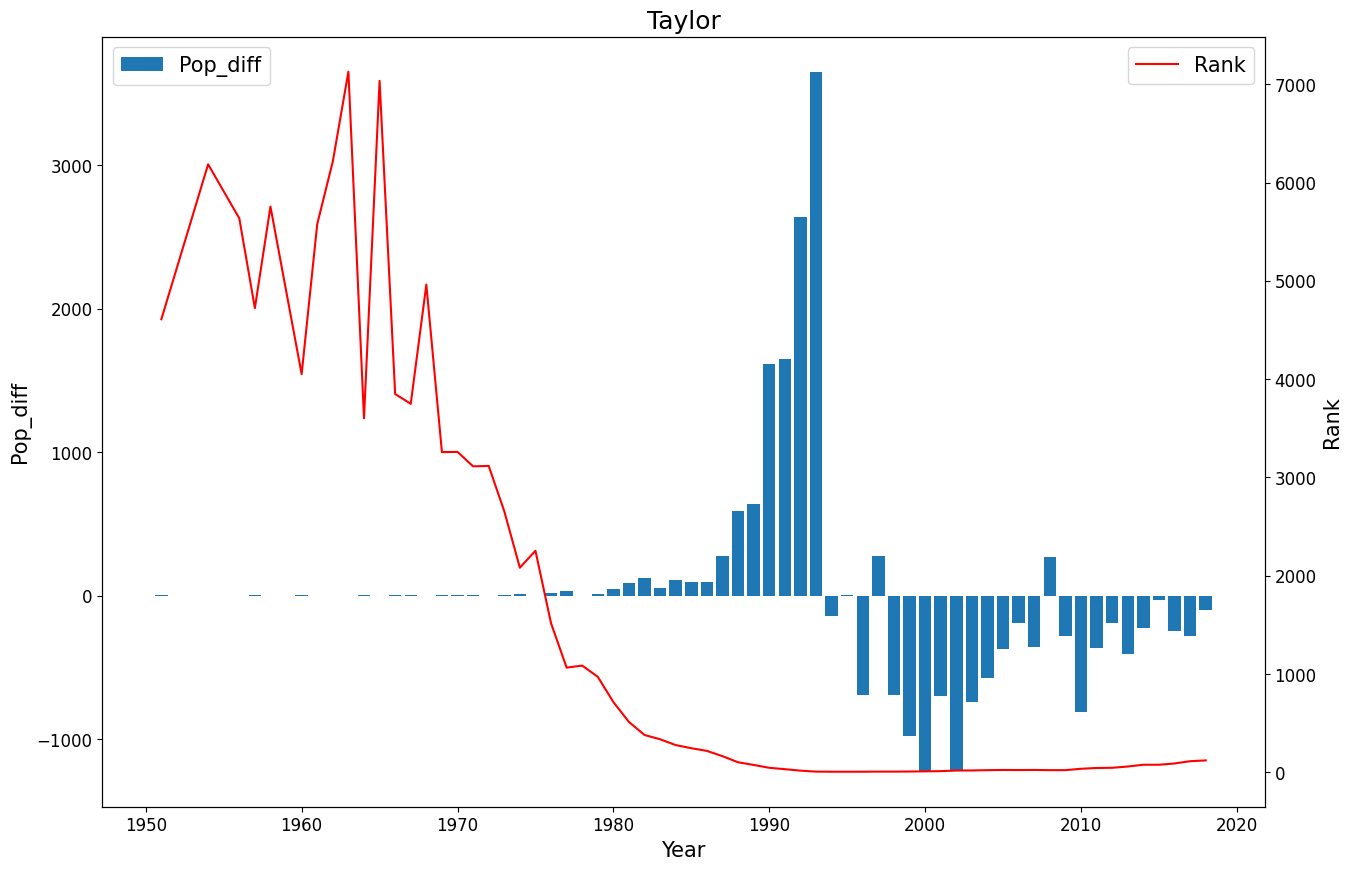

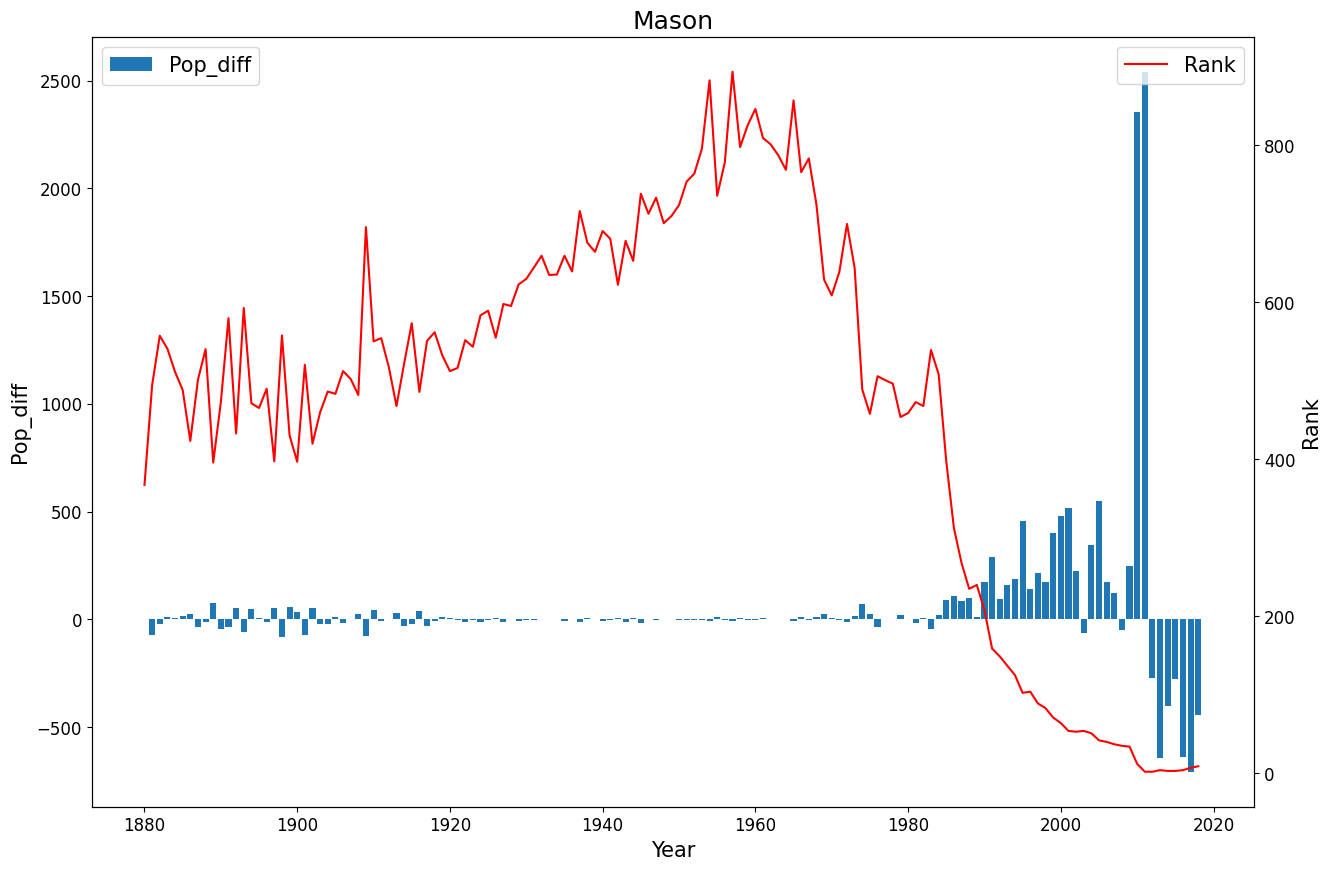

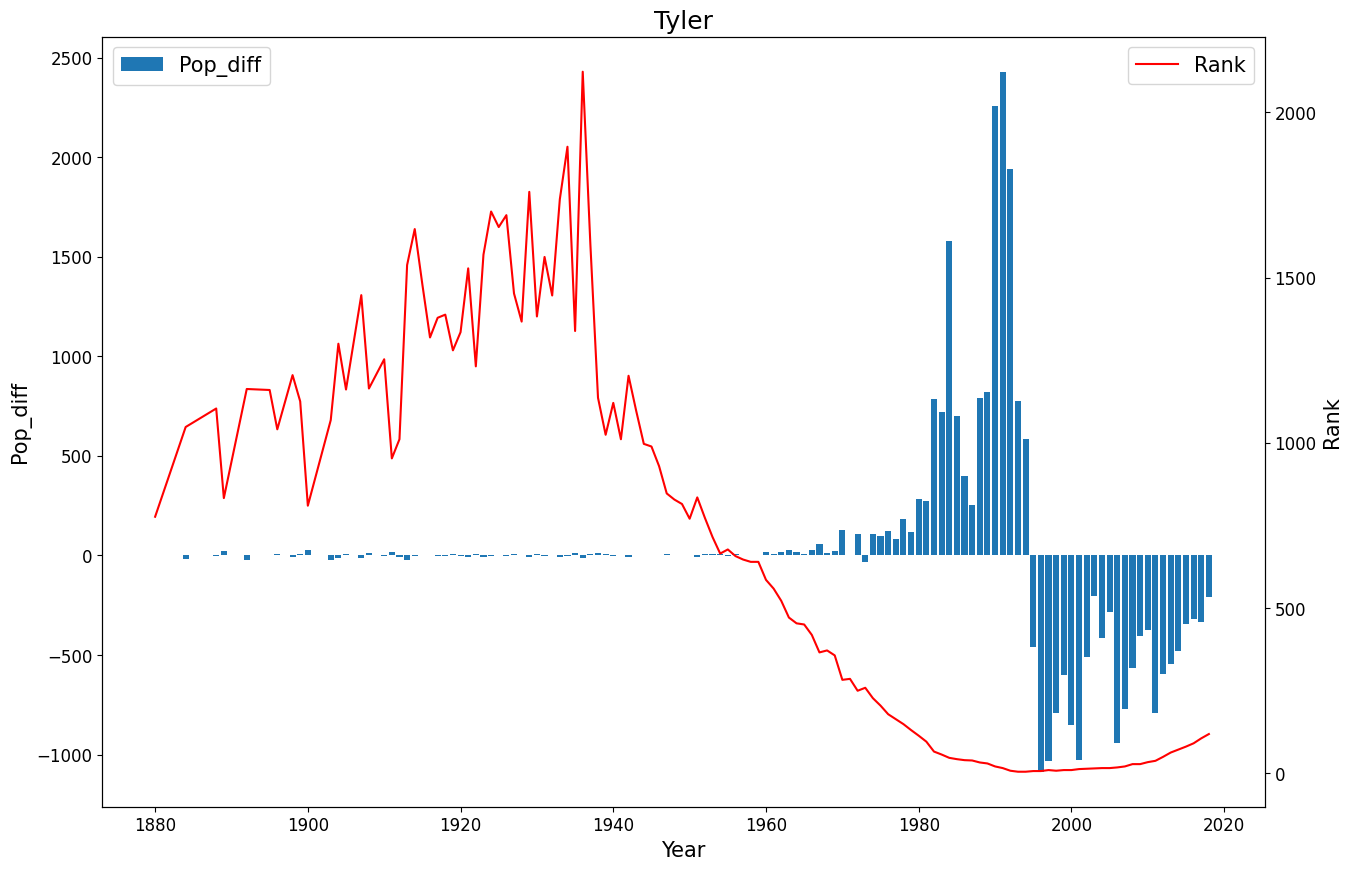

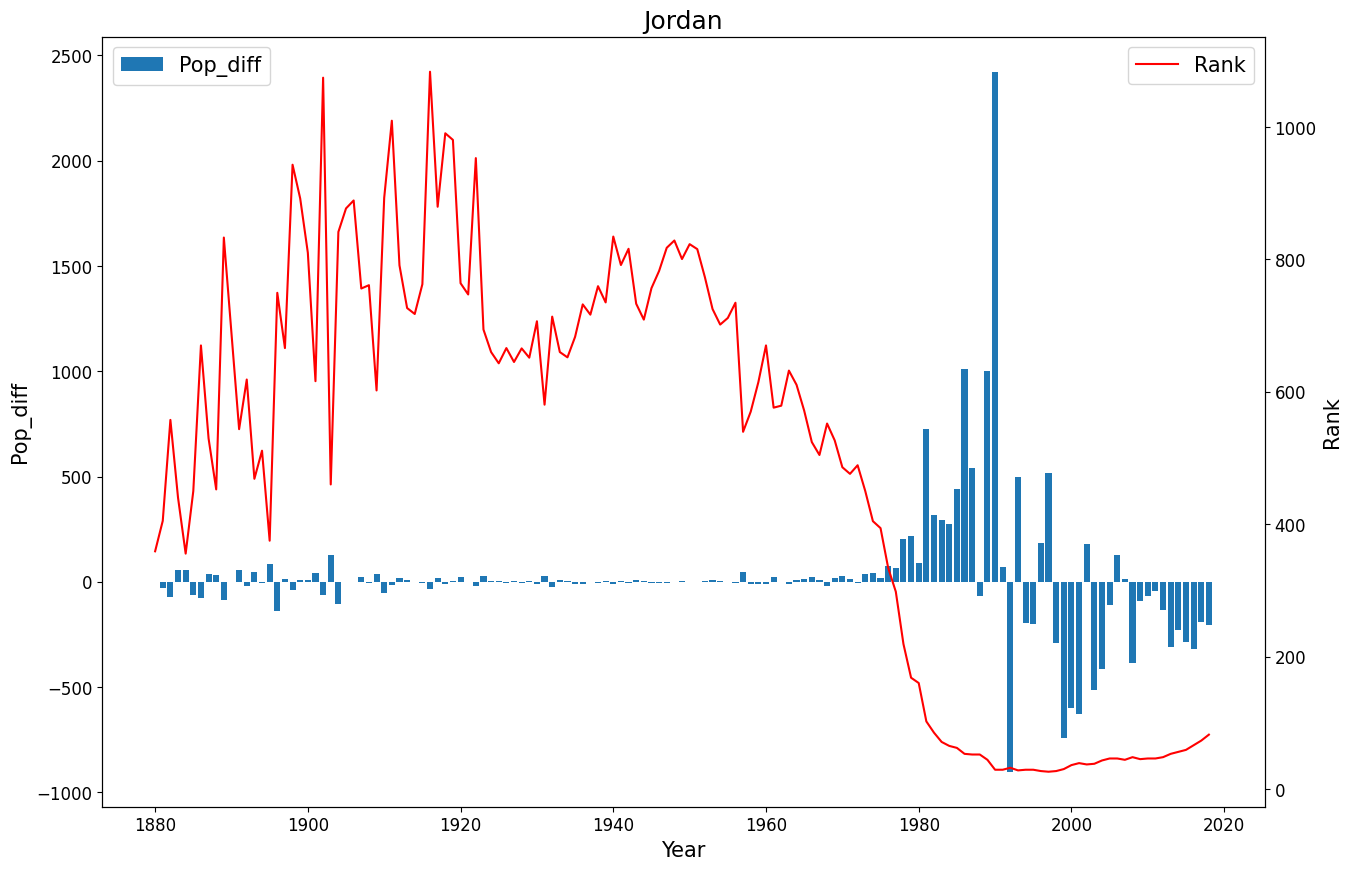

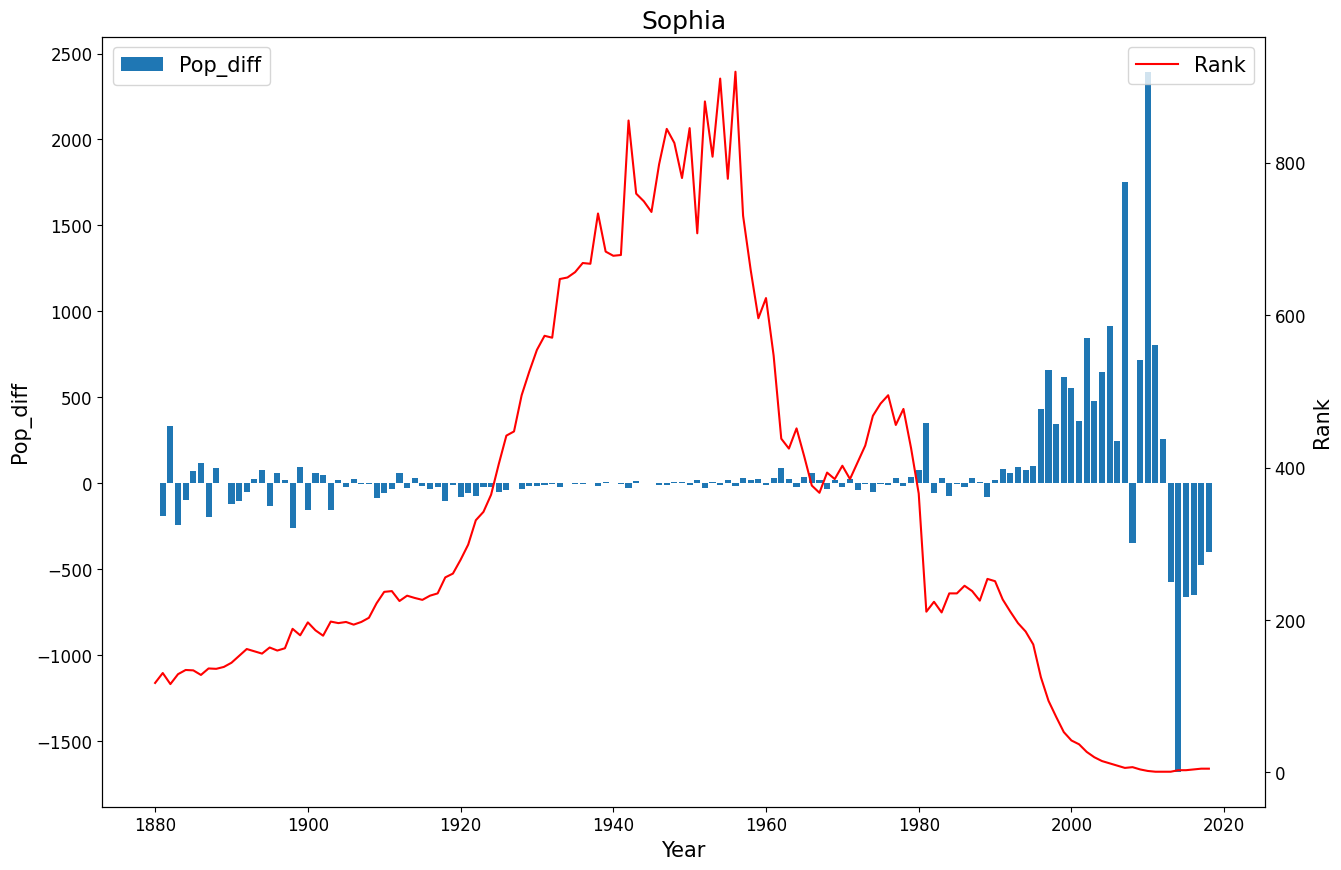

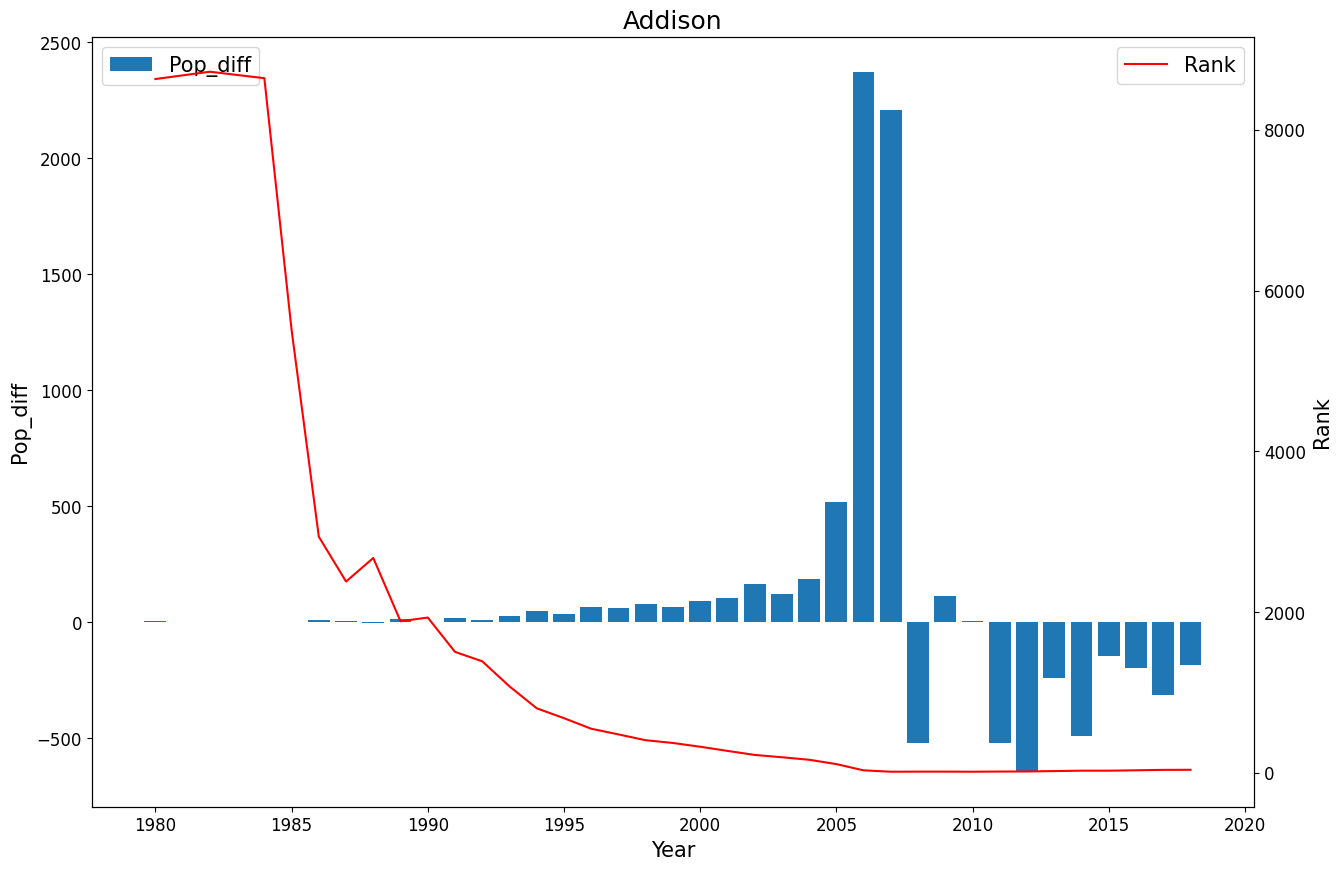

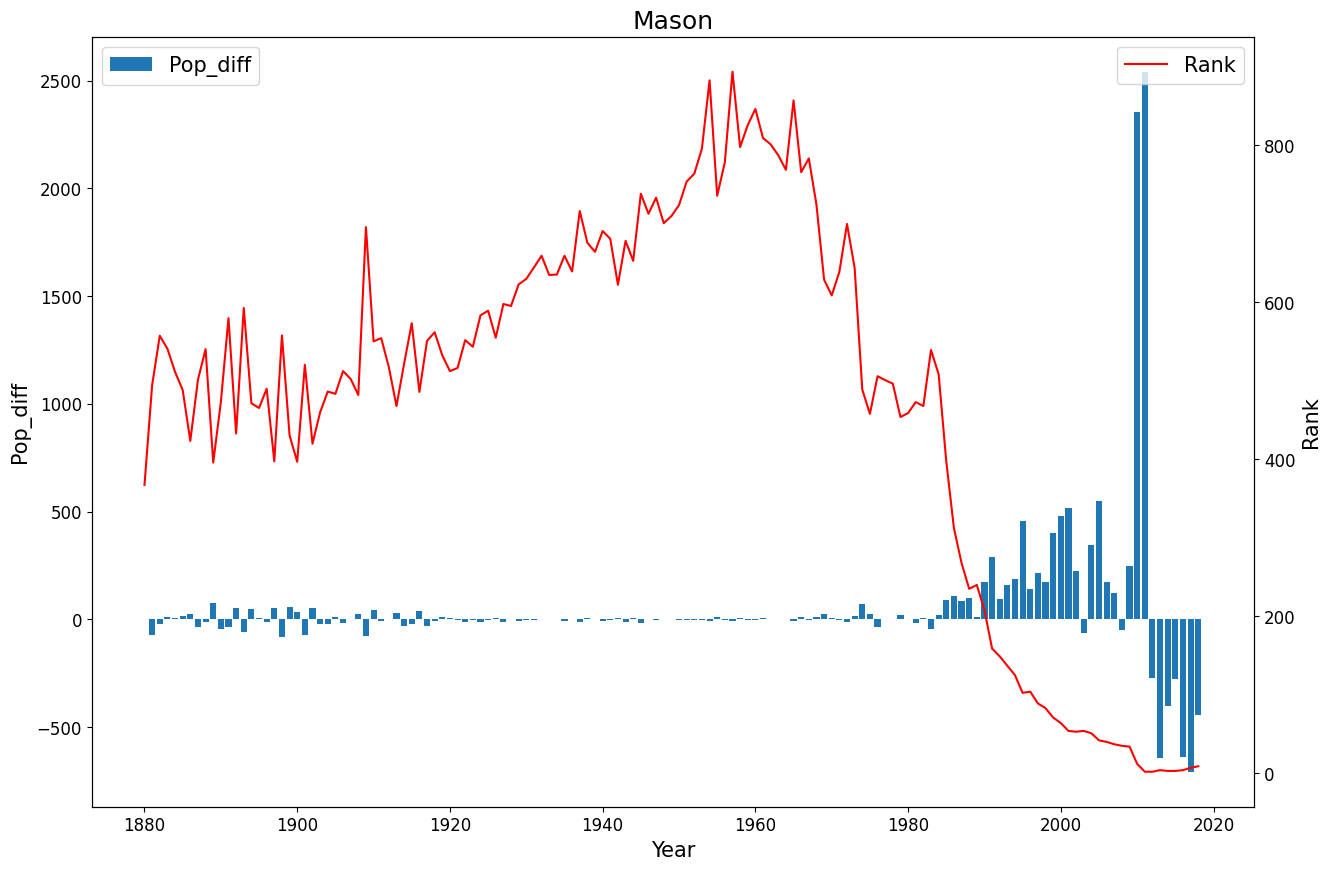

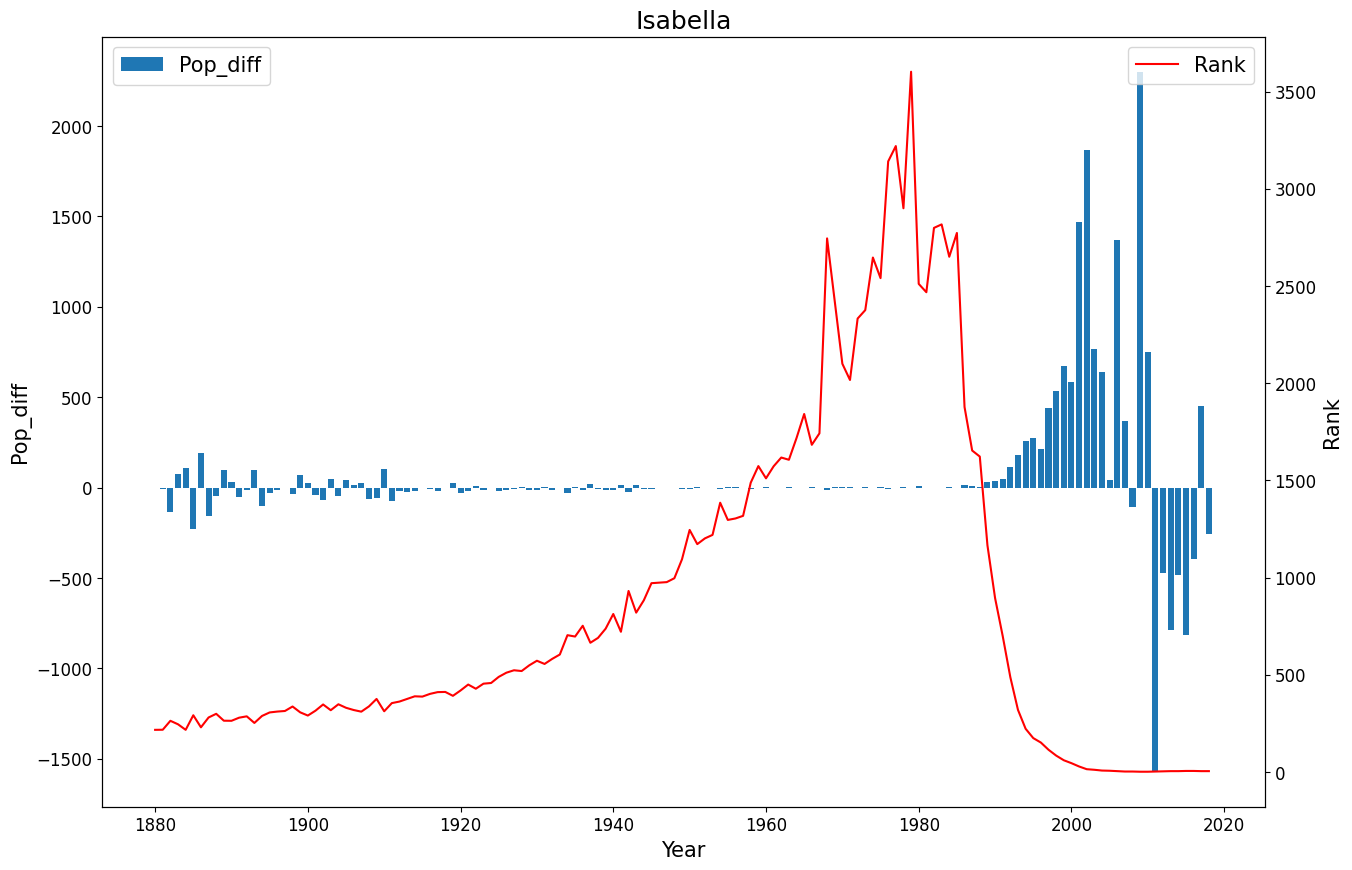

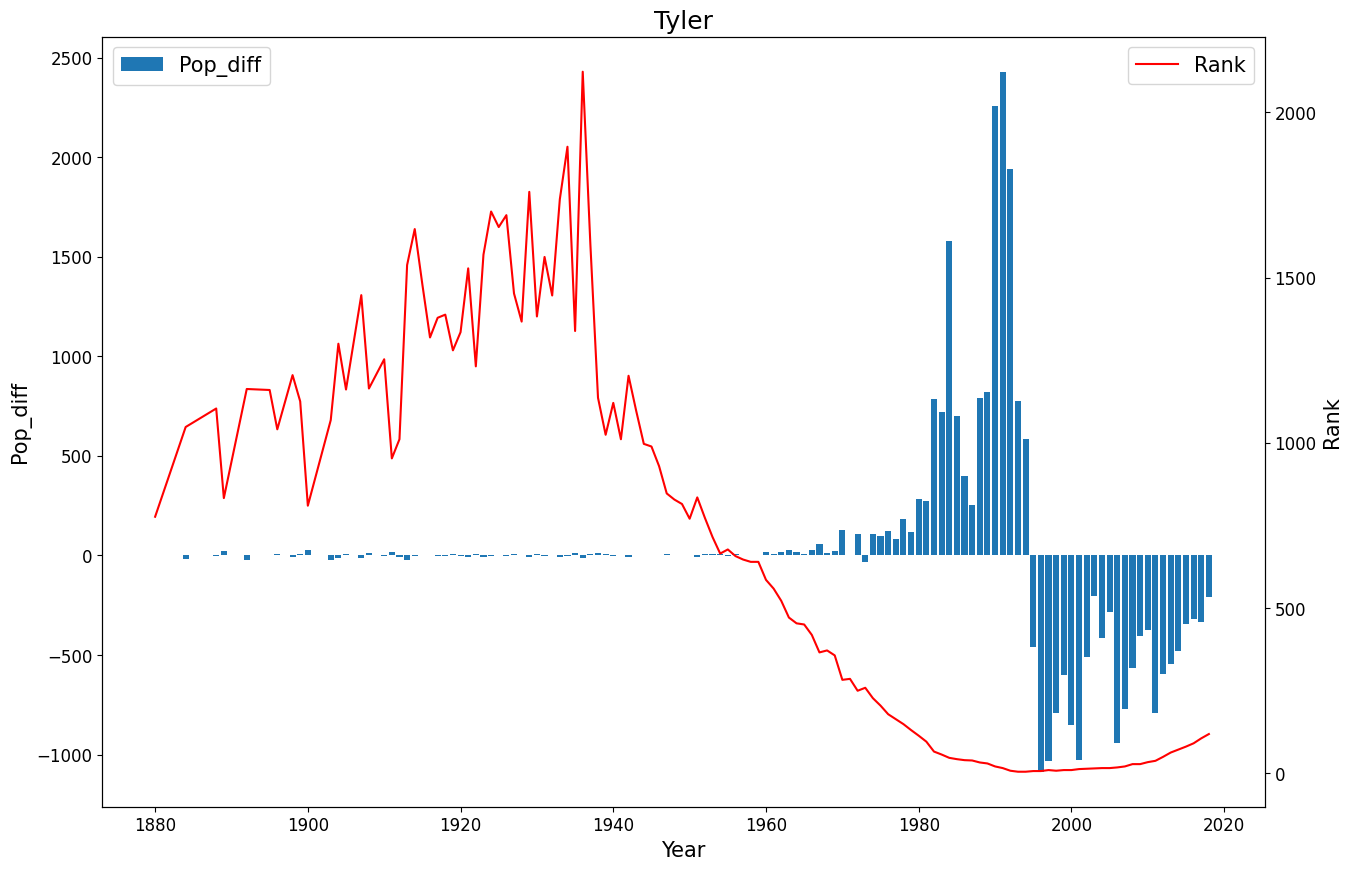

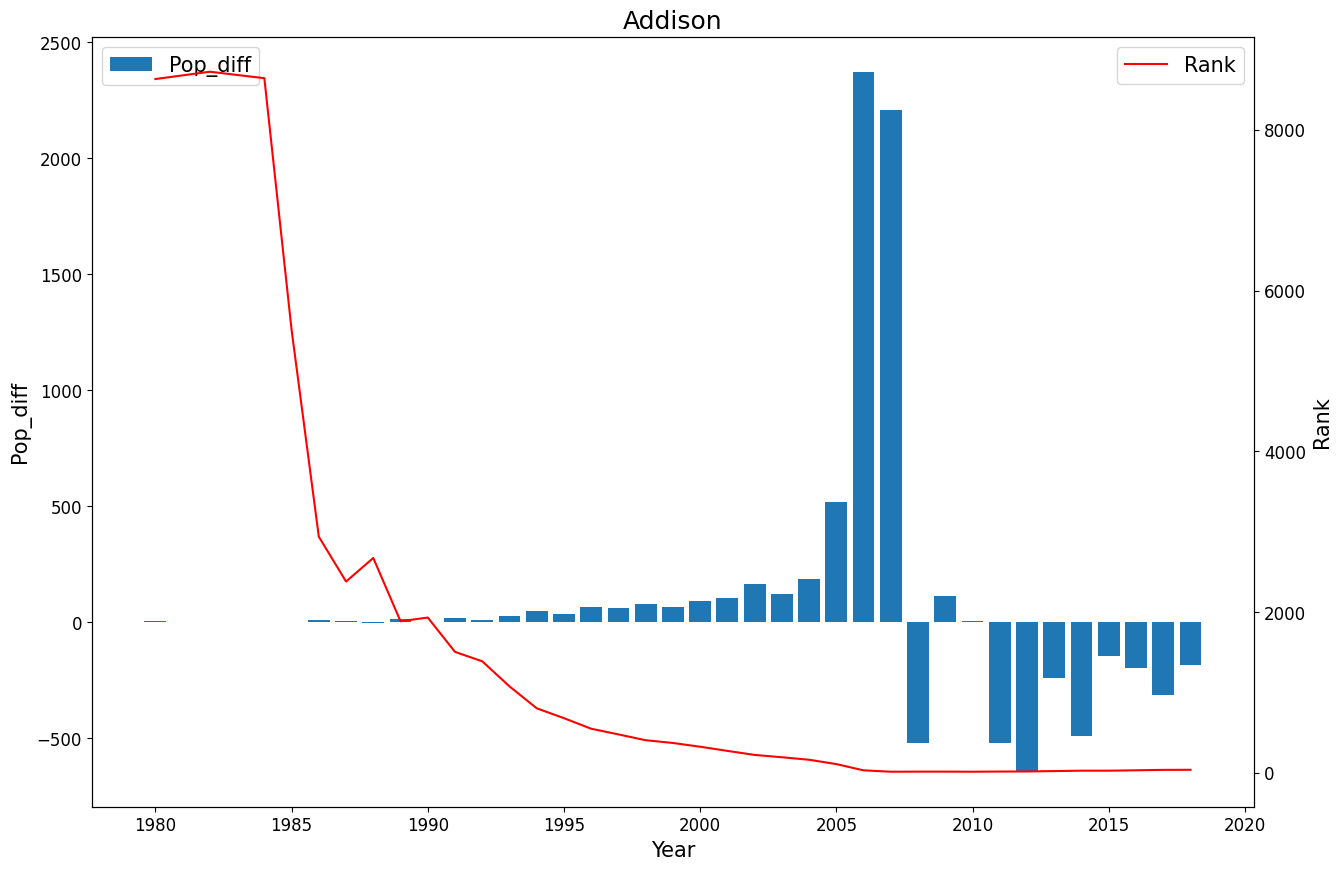

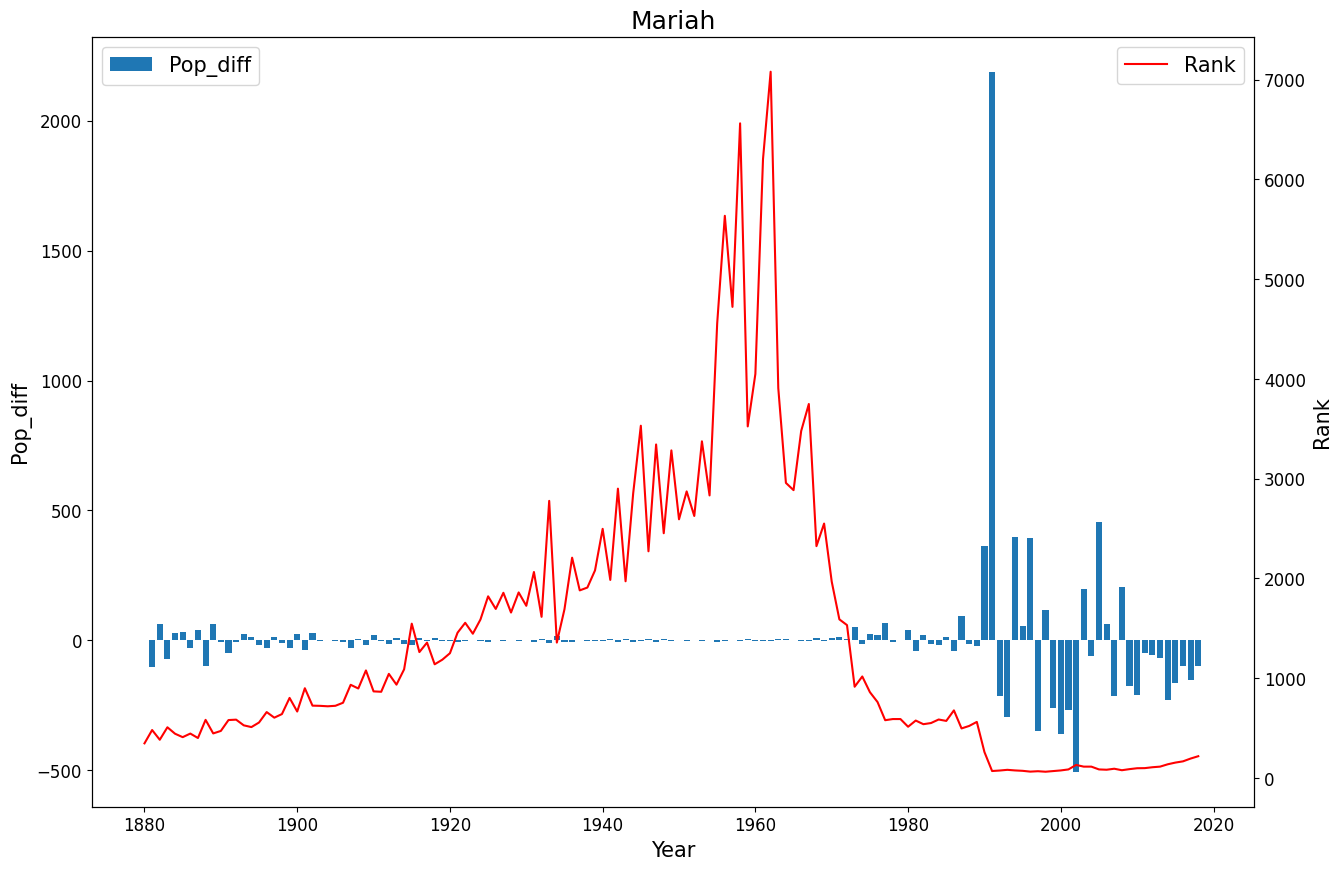

In [79]:
diff = df2.nlargest(20, "Pop_diff")

for idx, row in diff.iterrows():
    plot_name(row.Name, row.Gender, crit = "Pop_diff")

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

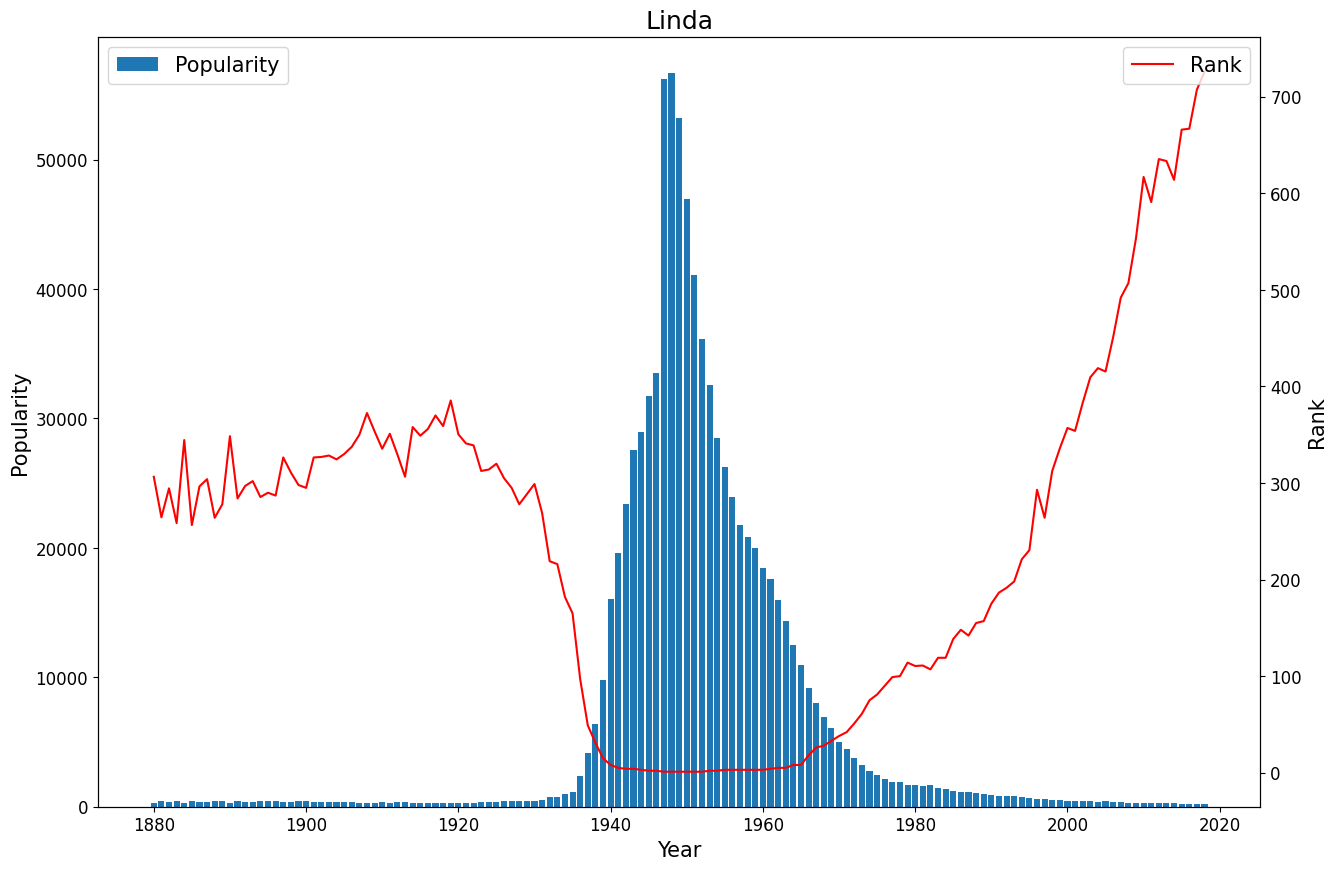

In [57]:
plot_name("Linda", "F")

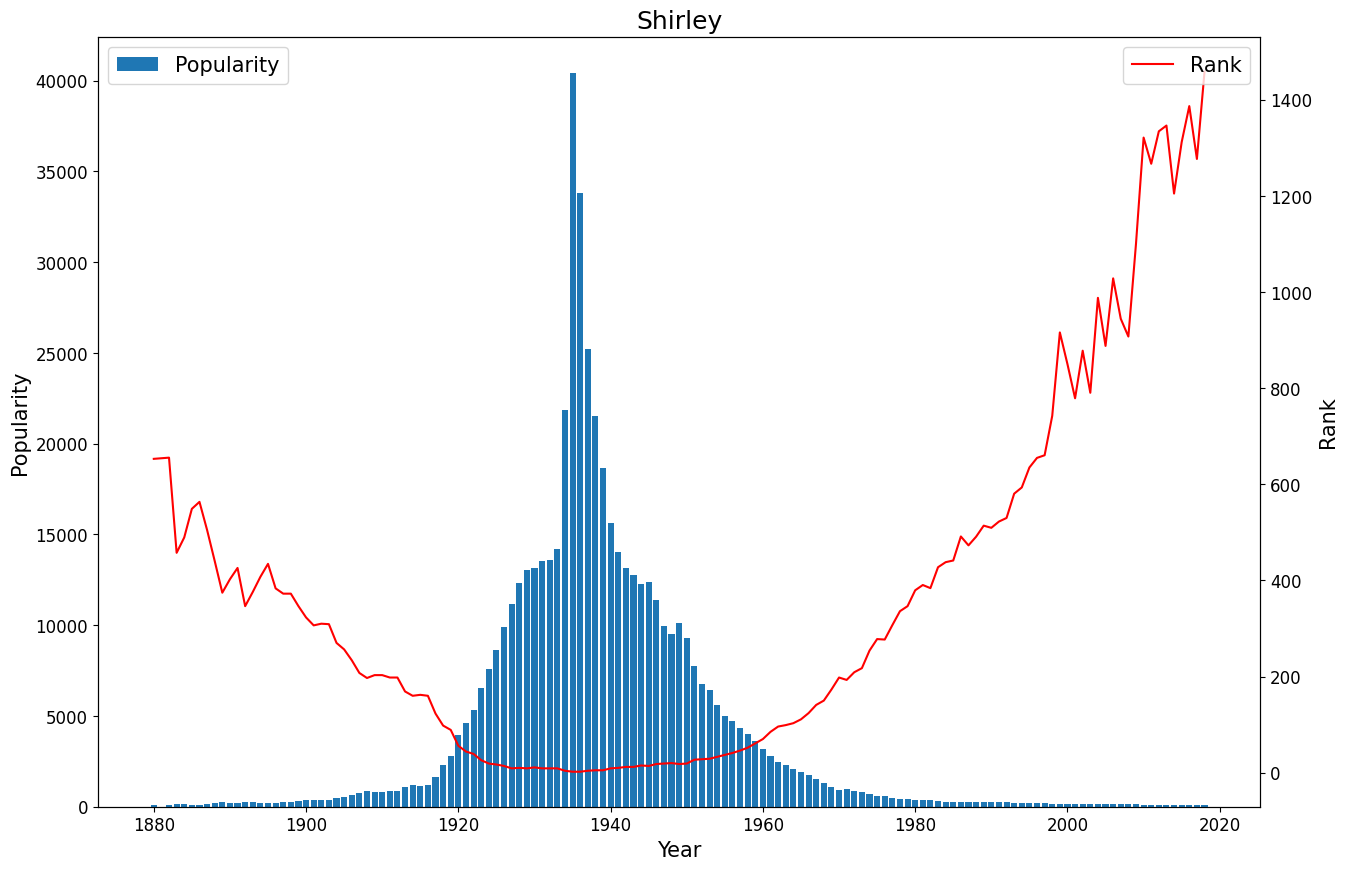

In [58]:
plot_name("Shirley", "F")

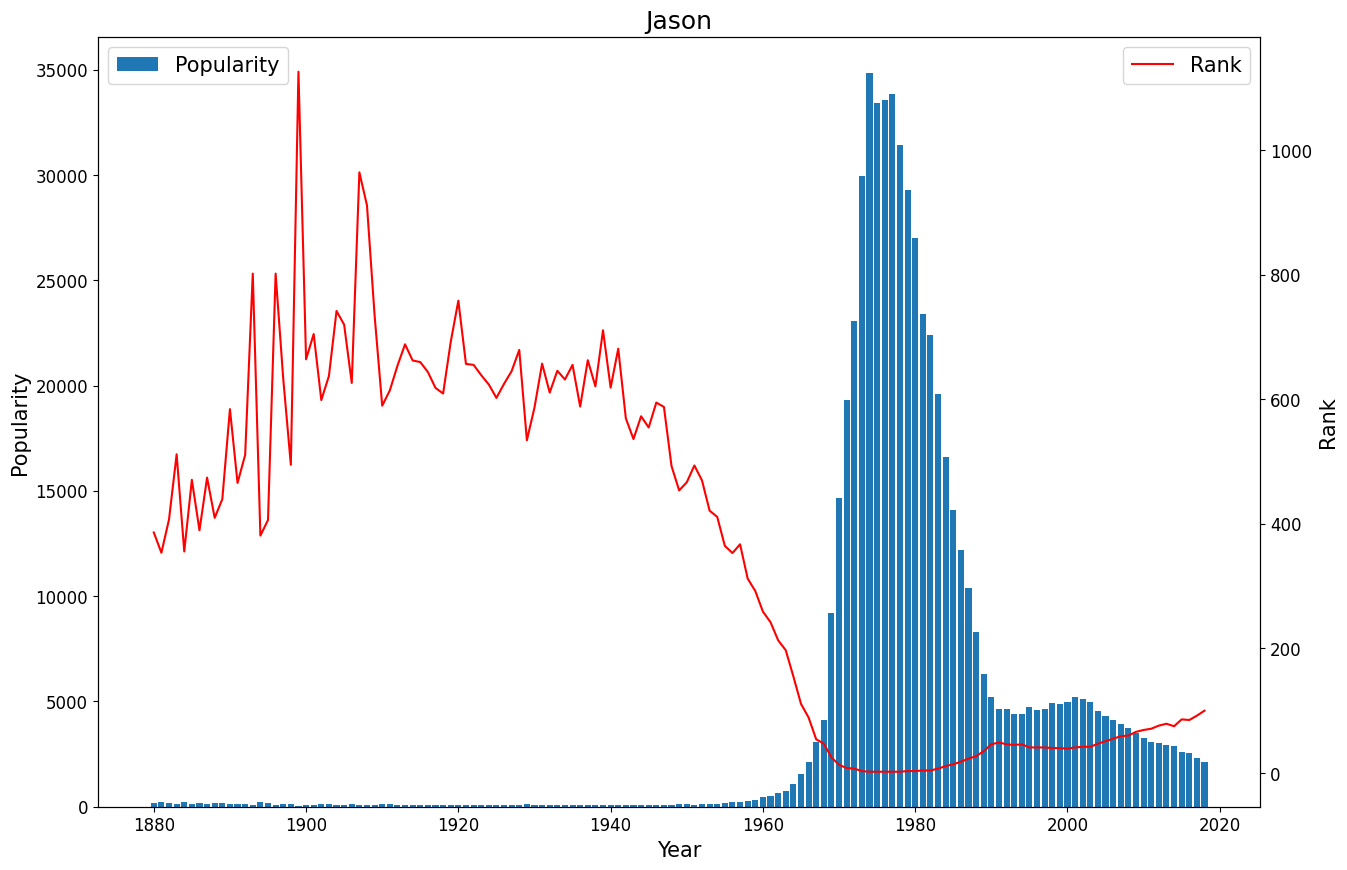

In [59]:
plot_name("Jason", "M")

In [60]:
df2.nsmallest(20, "Pop_diff")

Year         Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
1094386  1991     Brittany      F  29089    15516.48  3.00  19248.89  -3732.41
1135104  1992      Michael      M  54392    27239.98  1.00  30094.34  -2854.36
1094387  1991       Amanda      F  28893    15411.93  4.00  18127.27  -2715.33
1350487  2000       Austin      M  15944     8121.43 23.00  10818.60  -2697.17
1144944  1993      Chelsea      F  11288     6240.93 25.00   8773.21  -2532.28
1119494  1992      Jessica      F  38356    20805.32  2.00  23149.11  -2343.79
1119493  1992       Ashley      F  38453    20857.93  1.00  23191.78  -2333.84
1170887  1994       Ashley      F  30278    16958.99  2.00  19267.93  -2308.94
1135107  1992       Joshua      M  36215    18136.78  4.00  20406.82  -2270.04
1186638  1994      Michael      M  44469    23022.88  1.00  25270.64  -2247.75
1109847  1991  Christopher      M  47104    23320.95  2.00  25491.10  -2170.15
1196883  1995      Jessica      F  27938    15889.79  1.00  17989.03  -2099.24
1222964  1996      Jessica      F  24198    13806.58  2.00  15889.79  -2083.21
1144927  1993       Amanda      F  20811    11506.02  8.00  13578.57  -2072.55
1135105  1992  Christopher      M  42460    21264.33  2.00  23320.95  -2056.62
1196901  1995       Nicole      F  12276     6982.00 19.00   8967.91  -1985.91
1160717  1993      Michael      M  49549    25270.64  1.00  27239.98  -1969.34
1119496  1992     Brittany      F  24977    13548.19  4.00  15516.48  -1968.29
1170923  1994      Chelsea      F   7717     4322.36 38.00   6240.93  -1918.57
1588267  2008       Hannah      F   9563     5062.28 17.00   6929.53  -1867.25

## Why does a Name´s Popularity suddenly change? (Part 2)

__'From 0 to 100' Names__

In [80]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

Year     Name Gender  Count  Popularity    Rank  Pop_lag1  Pop_diff
1553888  2007  Jaslene      F    501      260.79  599.50      2.63    258.16
1223510  1996   Moesha      F    426      243.06  547.50      0.00    243.06
1070200  1990   Isamar      F    446      234.97  533.50      0.00    234.97
1411471  2002  Omarion      M    418      215.41  534.50      2.57    212.83
1519907  2006  Akeelah      F    403      212.12  707.00      3.34    208.78
1925889  2018   Zhavia      F    306      181.39  876.00      0.00    181.39
1250142  1997   Erykah      F    279      160.32  757.50      0.00    160.32
1487607  2005  Jolette      F    258      139.72  955.50      4.75    134.97
1794190  2014   Dalary      F    218      122.31 1142.50      0.00    122.31
1145794  1993  Coraima      F    221      122.19  876.00      2.71    119.47
1846305  2015   Jonael      M    232      121.37  923.00      3.02    118.34
1250373  1997   Yulisa      F    198      113.77  986.50      3.99    109.78
1171889  1994     Ajee      F    185      103.62 1007.00      0.00    103.62
1363720  2001    Yaire      F    184      102.23 1137.50      0.00    102.23
1624628  2009  Greidys      F    186      101.36 1301.00      0.00    101.36
1574814  2007    Yurem      M    206       99.34  955.50      0.00     99.34
1161508  1993    Savon      M    179       91.29  791.00      3.51     87.79
1187456  1994  Shyheim      M    168       86.98  819.00      0.00     86.98
1554698  2007  Jazlene      F    169       87.97 1409.50      3.68     84.29
1944228  2018   Atreus      M    159       88.31 1188.50      4.34     83.97

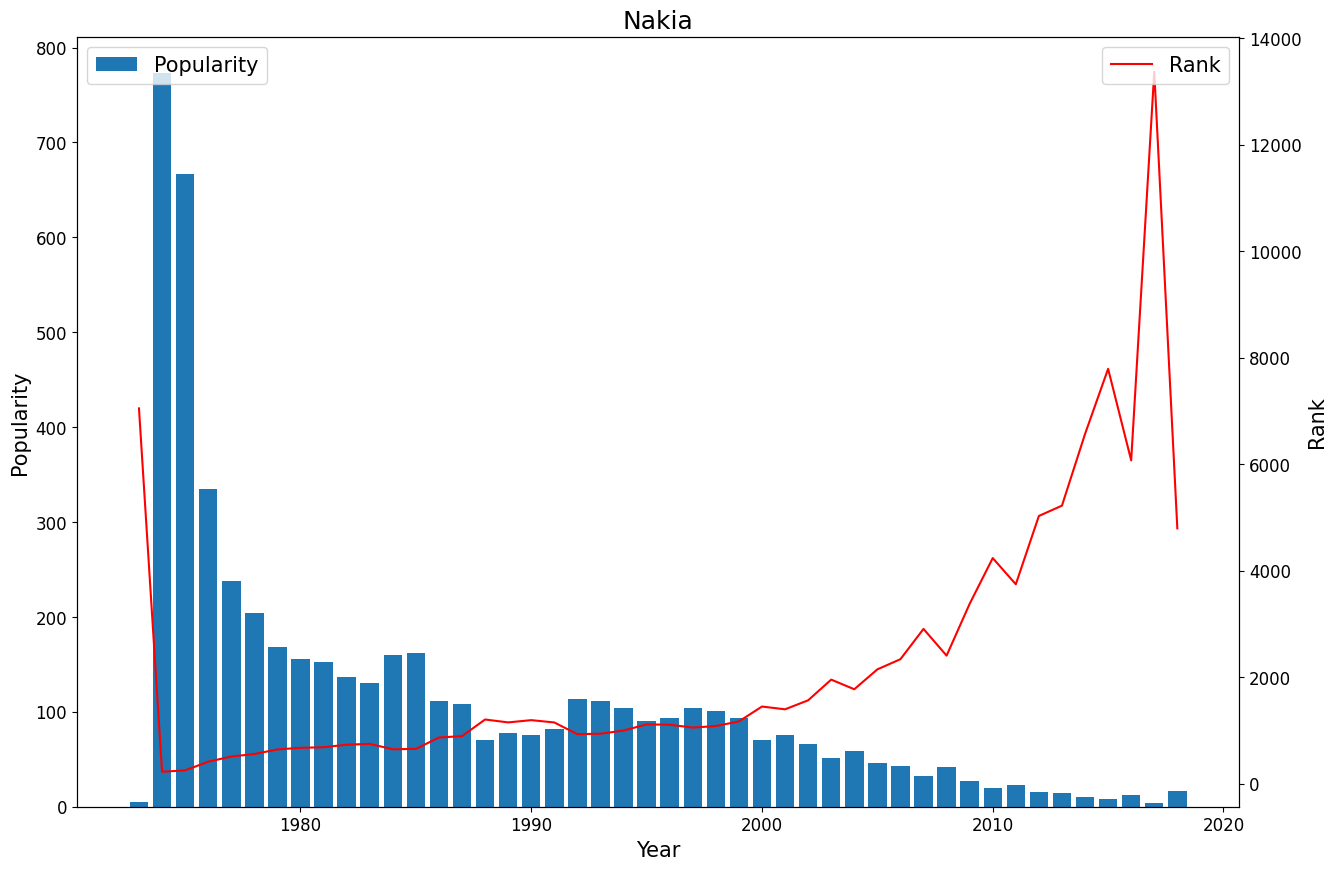

In [81]:
plot_name("Nakia", "F")

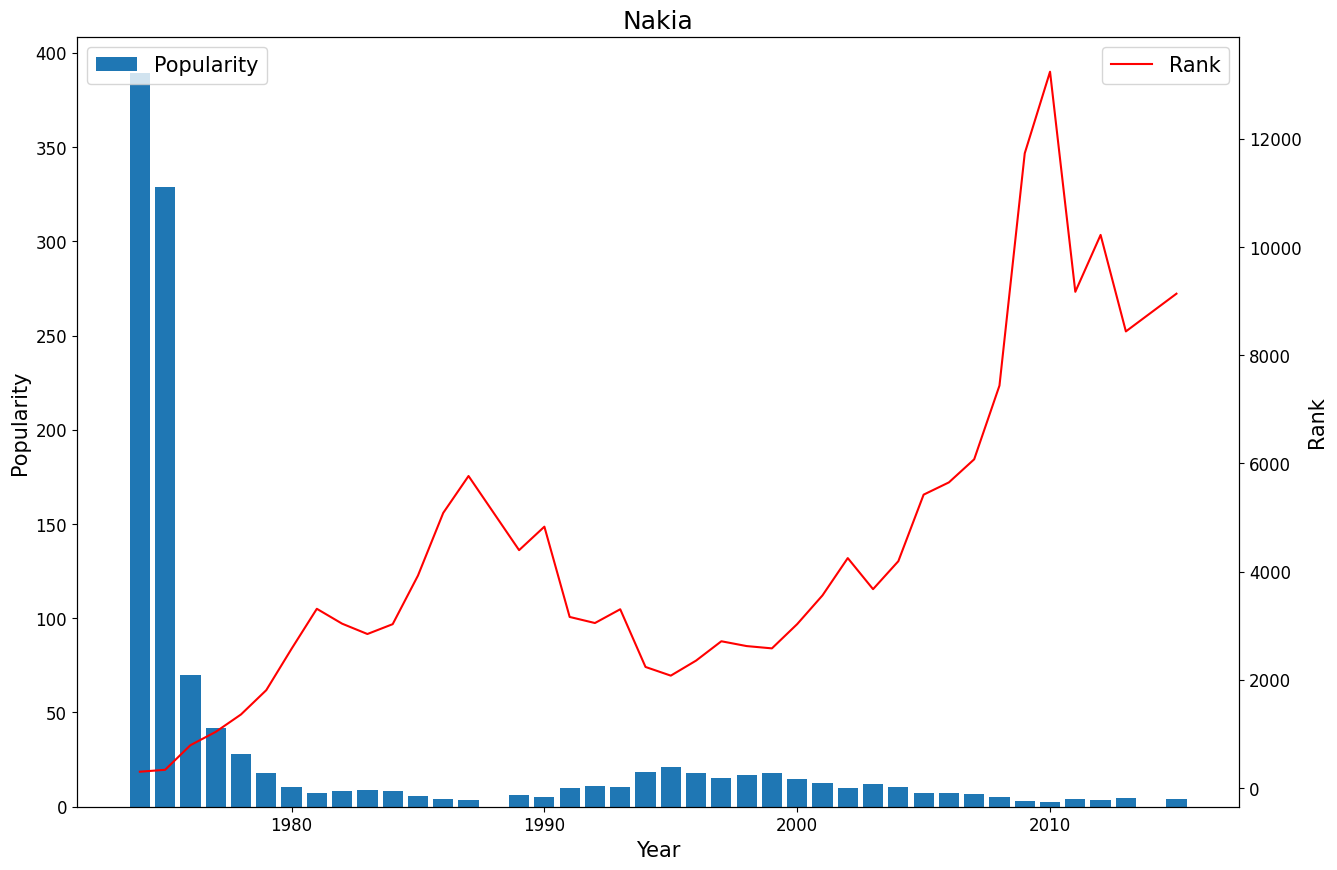

In [82]:
plot_name("Nakia", "M")

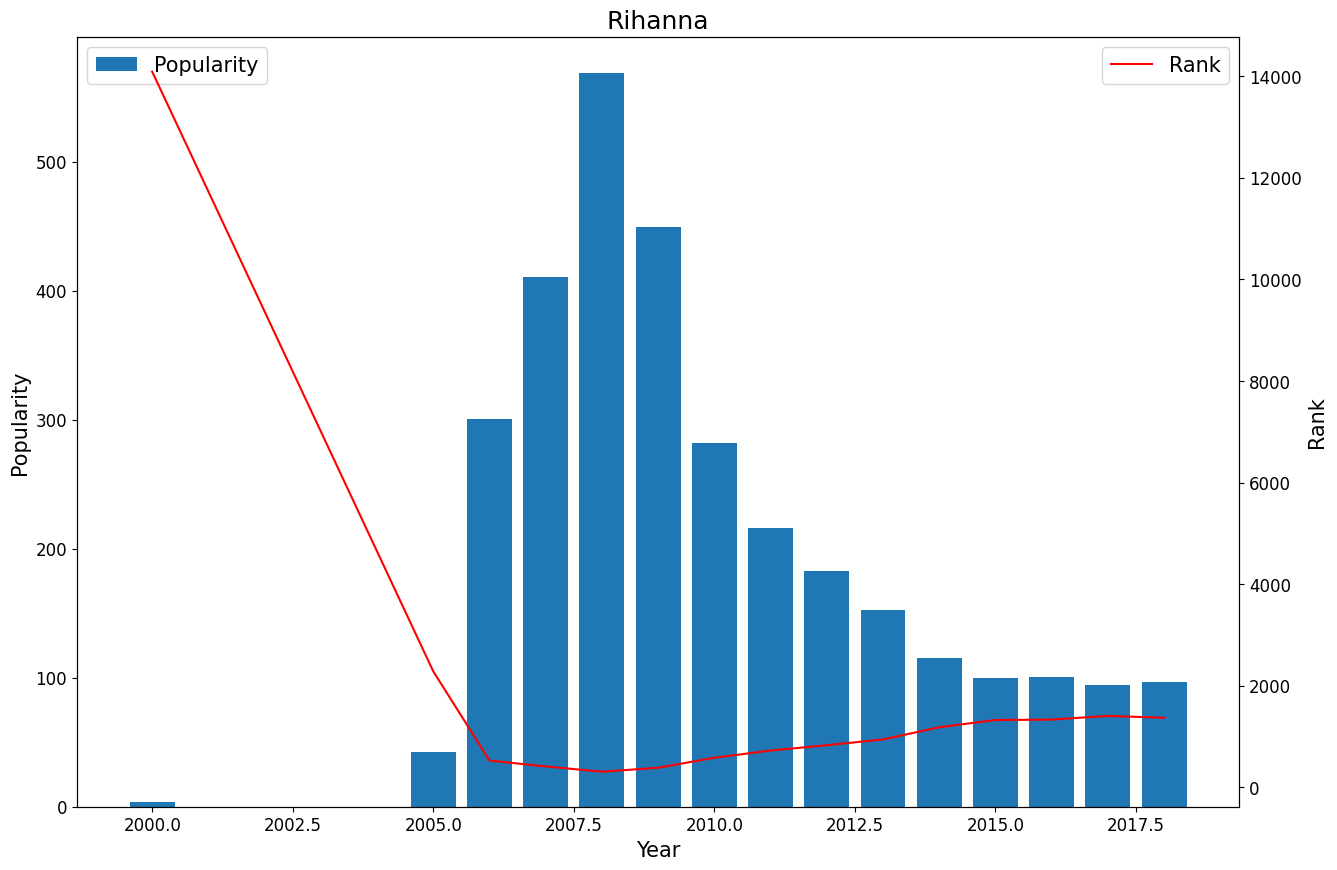

In [84]:
plot_name("Rihanna", "F")

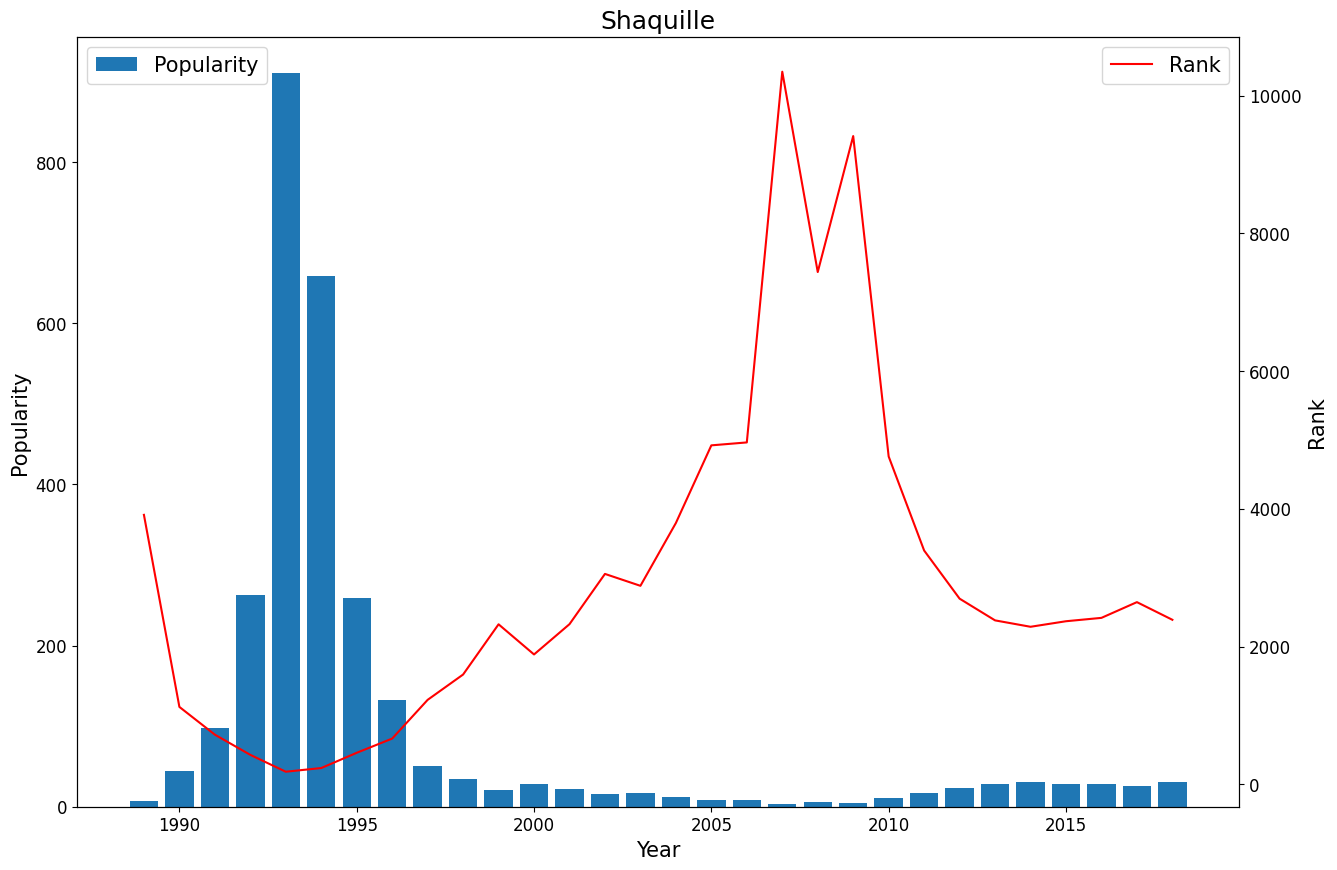

In [83]:
plot_name("Shaquille", "M")

__Highest percentage decrease among popular names__

In [90]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [91]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

Year       Name Gender  Count  Popularity   Rank  Pop_lag1  Pop_diff  \
1119924  1992      Iesha      F    581      315.15 432.50   1011.35   -696.20   
1423744  2003    Ashanti      F    962      526.78 325.00   1639.78  -1112.99   
1145180  1993    Hillary      F   1064      588.27 261.00   1367.46   -779.19   
1249716  1997     Shania      F    861      494.74 330.50   1046.99   -552.25   
1362696  2001   Brittany      F   2929     1627.37 115.00   2855.18  -1227.81   
1223104  1996     Selena      F   2291     1307.17 142.00   2174.91   -867.74   
1845564  2015       Jase      M   2292     1199.04 182.00   1953.50   -754.46   
1332939  2000      Kiara      F   2559     1409.69 130.00   2269.25   -859.56   
1454836  2004    Lizbeth      F   1422      774.89 232.00   1245.77   -470.88   
1069838  1990      Kiara      F   1690      890.35 171.00   1423.52   -533.17   
1362802  2001   Brittney      F   1442      801.18 221.00   1275.83   -474.64   
1332870  2000   Brittany      F   5183     2855.18  61.00   4478.72  -1623.54   
1658272  2010     Marley      F   1344      757.04 234.00   1182.52   -425.49   
1171057  1994  Kassandra      F   1763      987.47 172.00   1509.37   -521.89   
1393118  2002     Nayeli      F   1206      671.50 263.00   1025.09   -353.59   
1793318  2014     Alexia      F   1223      686.17 270.00   1044.36   -358.18   
1304408  1999     Monica      F   2134     1203.42 151.00   1827.91   -624.49   
1393025  2002   Brittany      F   1936     1077.97 170.00   1627.37   -549.41   
1519414  2006      Ciara      F   1607      845.87 213.00   1258.04   -412.17   
1623518  2009      Miley      F   1733      944.38 189.00   1402.28   -457.90   

         %change  
1119924   -68.84  
1423744   -67.87  
1145180   -56.98  
1249716   -52.75  
1362696   -43.00  
1223104   -39.90  
1845564   -38.62  
1332939   -37.88  
1454836   -37.80  
1069838   -37.45  
1362802   -37.20  
1332870   -36.25  
1658272   -35.98  
1171057   -34.58  
1393118   -34.49  
1793318   -34.30  
1304408   -34.16  
1393025   -33.76  
1519414   -32.76  
1623518   -32.65

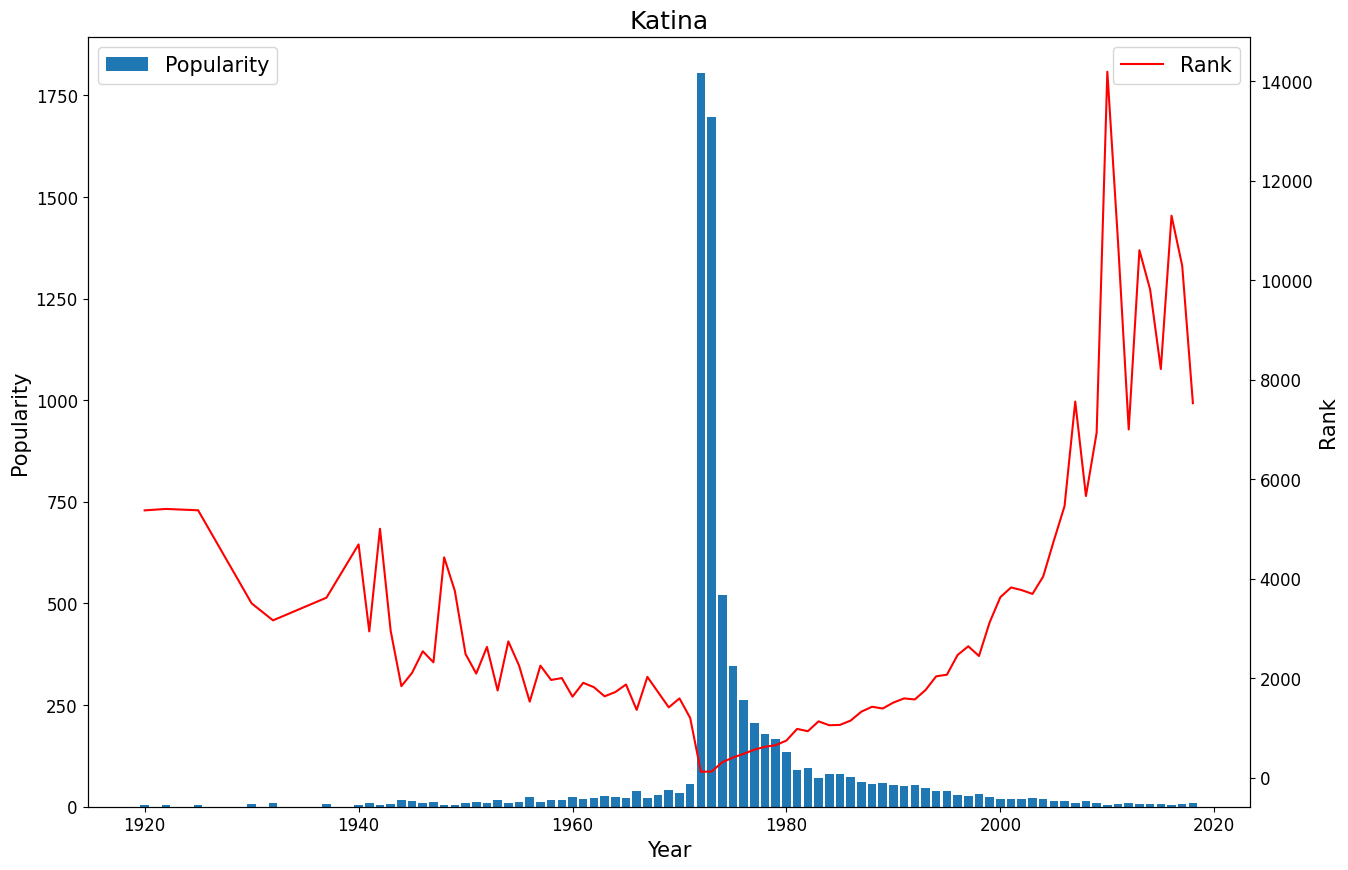

In [92]:
plot_name("Katina", "F")

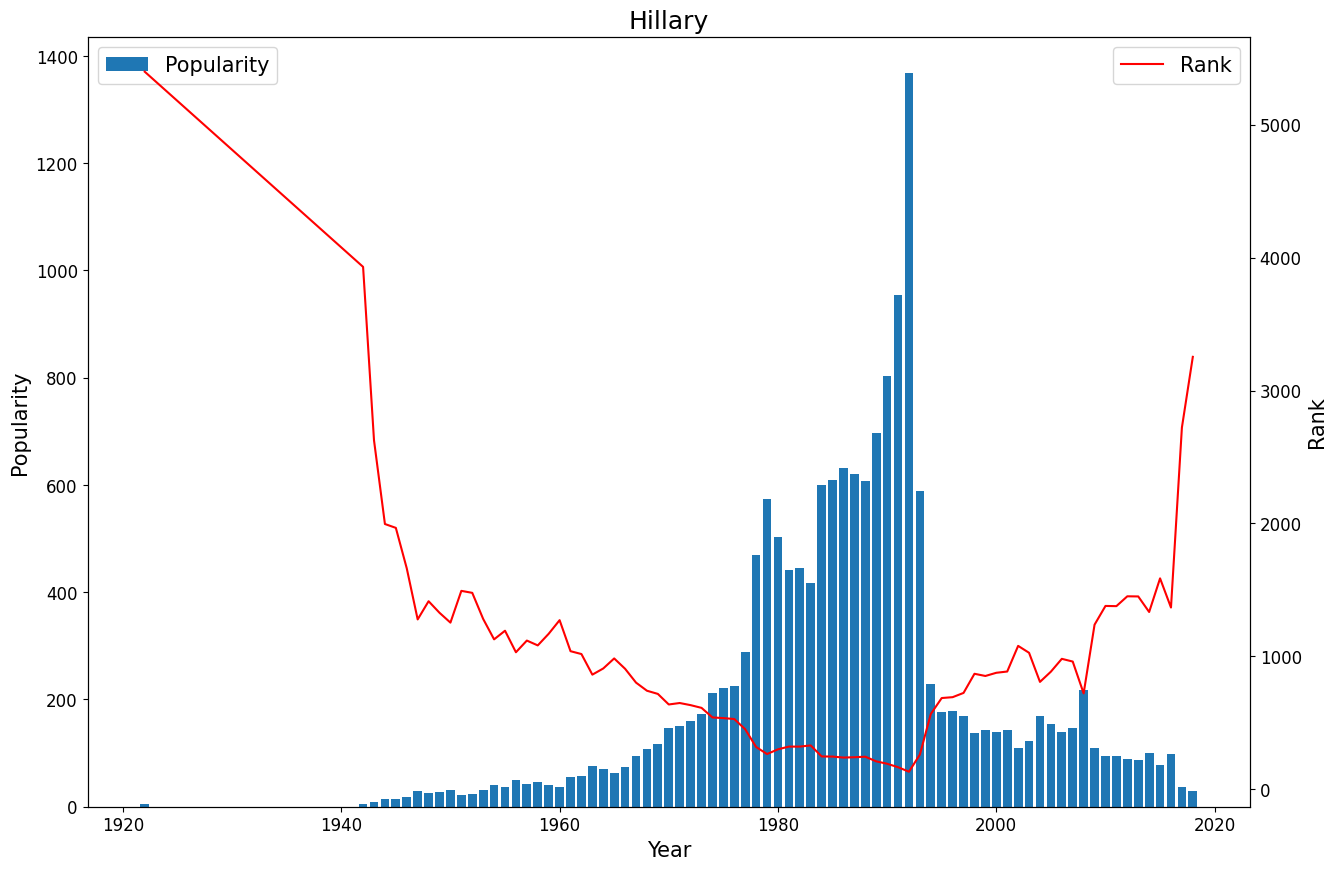

In [93]:
plot_name("Hillary", "F")

## Persistant vs. Spike-Fade Names

In [94]:
agg

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
0         Aaban      M    114       11        2007       2018         16   
1         Aabha      F     35        5        2011       2016          9   
2         Aabid      M     16        3        2003       2018          6   
3       Aabidah      F      5        1        2018       2018          5   
4         Aabir      M     10        2        2016       2018          5   
...         ...    ...    ...      ...         ...        ...        ...   
109168   Zyvion      M      5        1        2009       2009          5   
109169    Zyvon      M      7        1        2015       2015          7   
109170  Zyyanna      F      6        1        2010       2010          6   
109171    Zyyon      M      6        1        2014       2014          6   
109172    Zzyzx      M     10        2        2010       2018          5   

        Best_Year  
0            2014  
1            2014  
2            2018  
3            2018  
4            2016  
...           ...  
109168       2009  
109169       2015  
109170       2010  
109171       2014  
109172       2010  

[109173 rows x 8 columns]

In [98]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [100]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)
pers

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
49192      Joseph      M  2613304      139        1880       2018      32732   
30706   Elizabeth      F  1638349      139        1880       2018      20744   
85133        Rosa      F   174125      139        1880       2018       2230   
69242     Maurice      M   134504      139        1880       2018       1743   
25419       Delia      F    36276      139        1880       2018        491   
21172   Cornelius      M    35764      139        1880       2018        485   
28009     Domingo      M    13797      121        1882       2018        190   
68440    Marshall      M    91352      139        1880       2018       1270   
97753     Teodoro      M     3079      111        1884       2018         43   
103320     Victor      M   317673      139        1880       2018       4444   
75335      Nelson      M    77267      139        1880       2018       1082   
92689        Sina      F     1640      137        1880       2018         23   
64060      Lovell      M     3278      122        1886       2018         46   
52728    Katheryn      F    14899      139        1880       2018        212   
108291    Zenobia      F     4352      134        1881       2018         62   
98476      Theron      M    12576      136        1880       2018        180   
3918        Alida      F     4464      139        1880       2018         64   
3800      Alfonso      M    39797      135        1881       2018        573   
67021      Manuel      M   184429      139        1880       2018       2663   
47303      Jessie      M   110212      139        1880       2018       1592   

        Best_Year  Spike_Score  
49192        1956         1.25  
30706        1990         1.27  
85133        1925         1.28  
69242        1921         1.30  
25419        1957         1.35  
21172        1974         1.36  
28009        1946         1.38  
68440        1947         1.39  
97753        1969         1.40  
103320       1990         1.40  
75335        1959         1.40  
92689        1917         1.40  
64060        1916         1.40  
52728        1988         1.42  
108291       1923         1.42  
98476        1966         1.43  
3918         1917         1.43  
3800         1991         1.44  
67021        2005         1.44  
47303        1922         1.44

In [101]:
l = list(zip(pers.Name, pers.Gender))
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

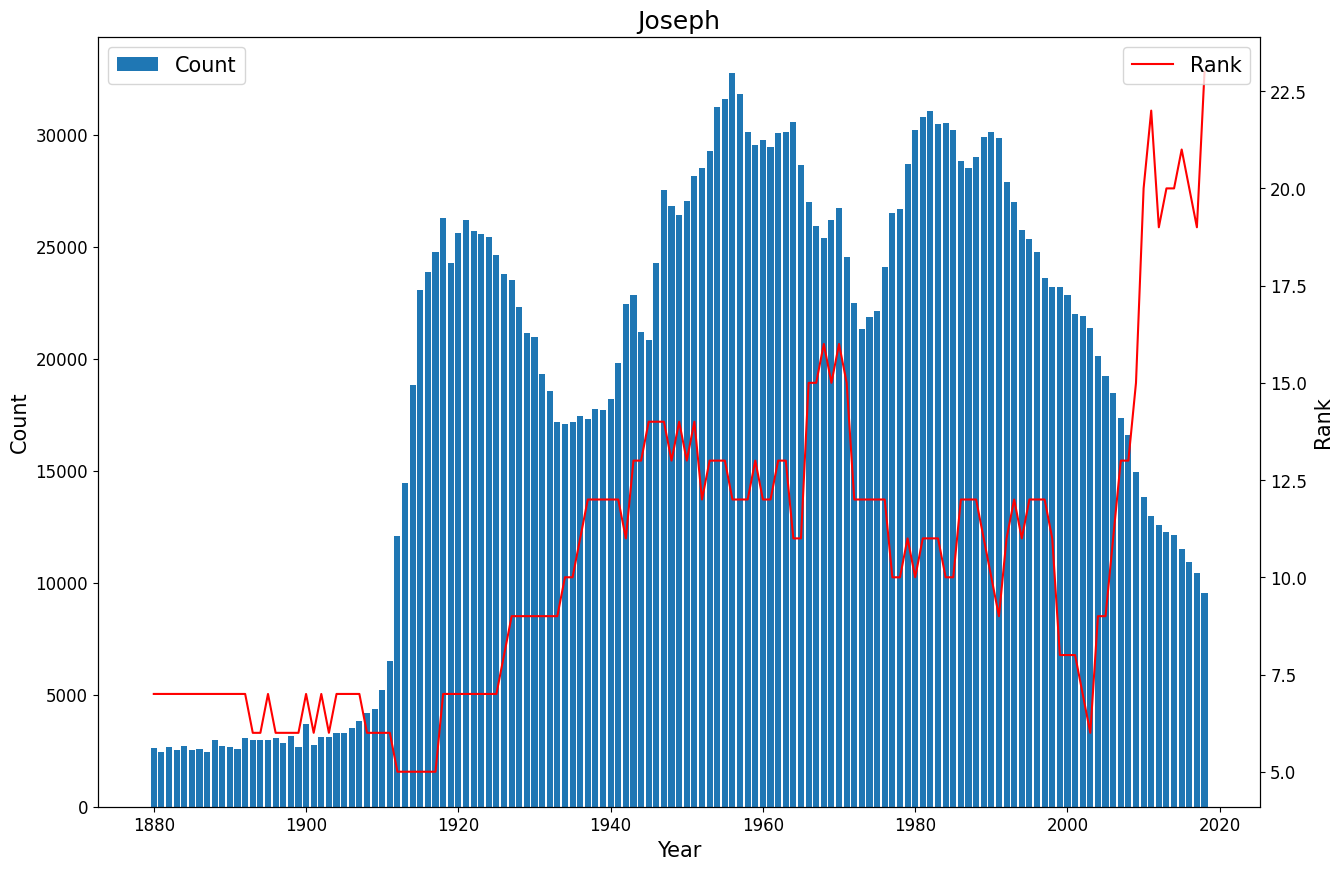

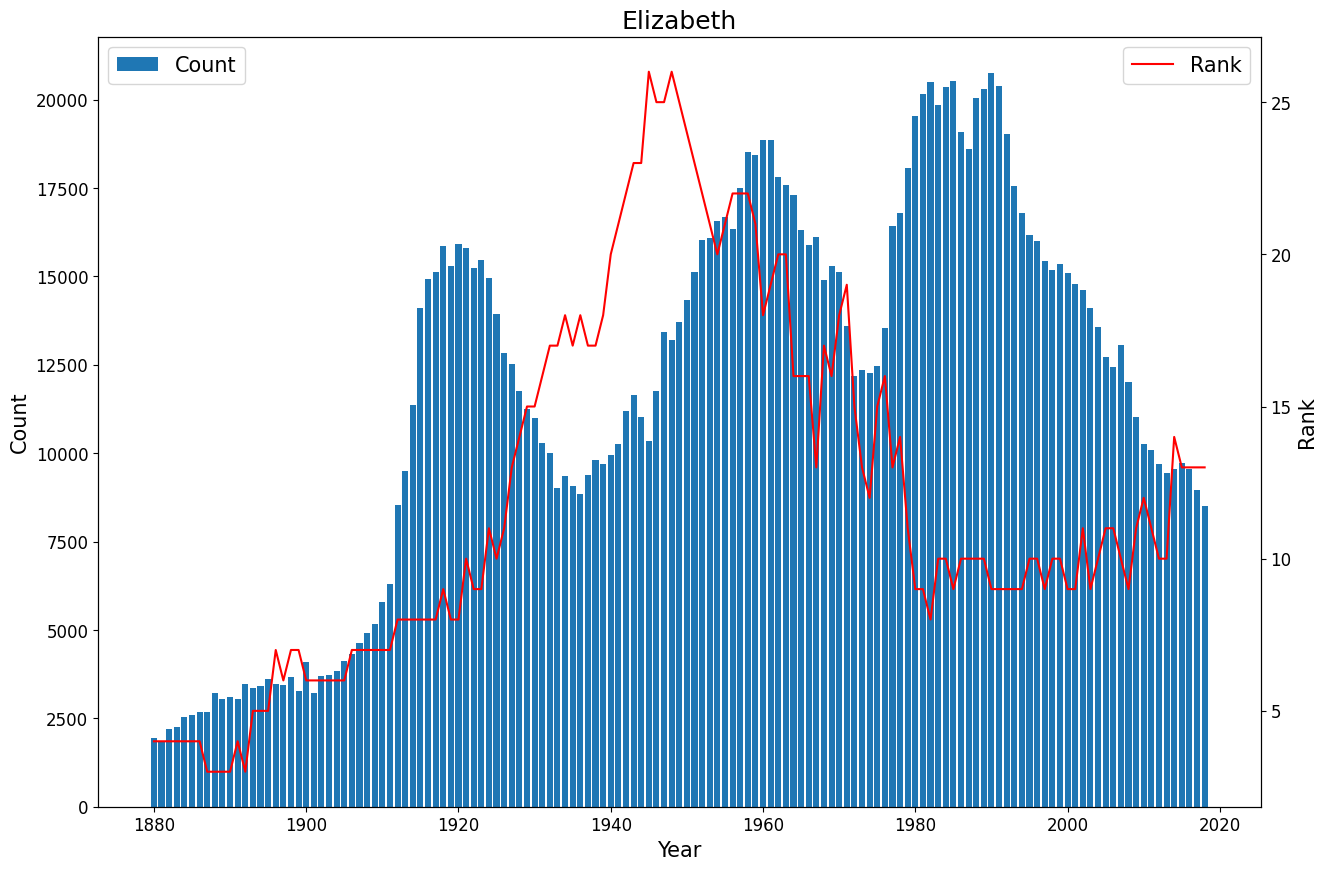

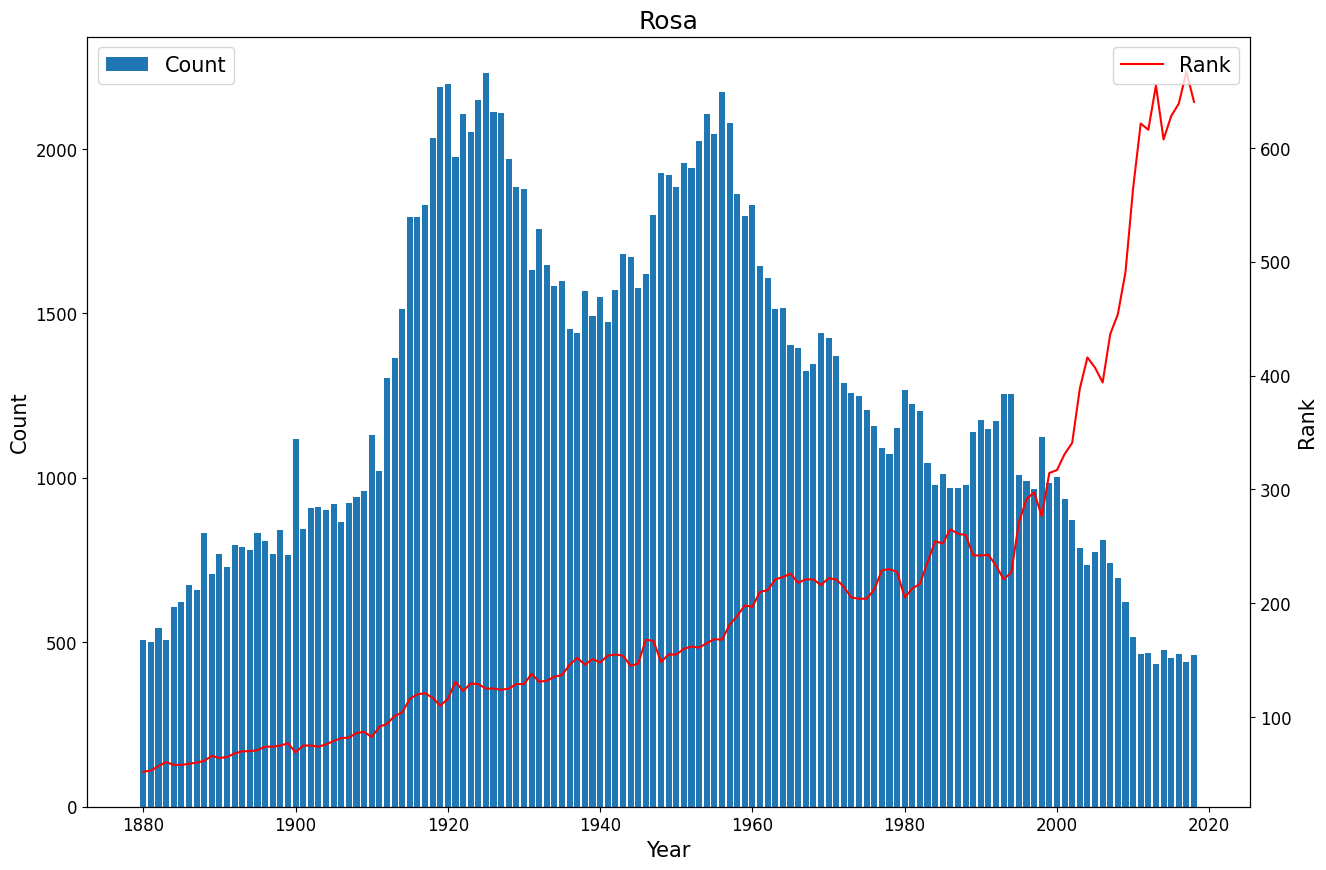

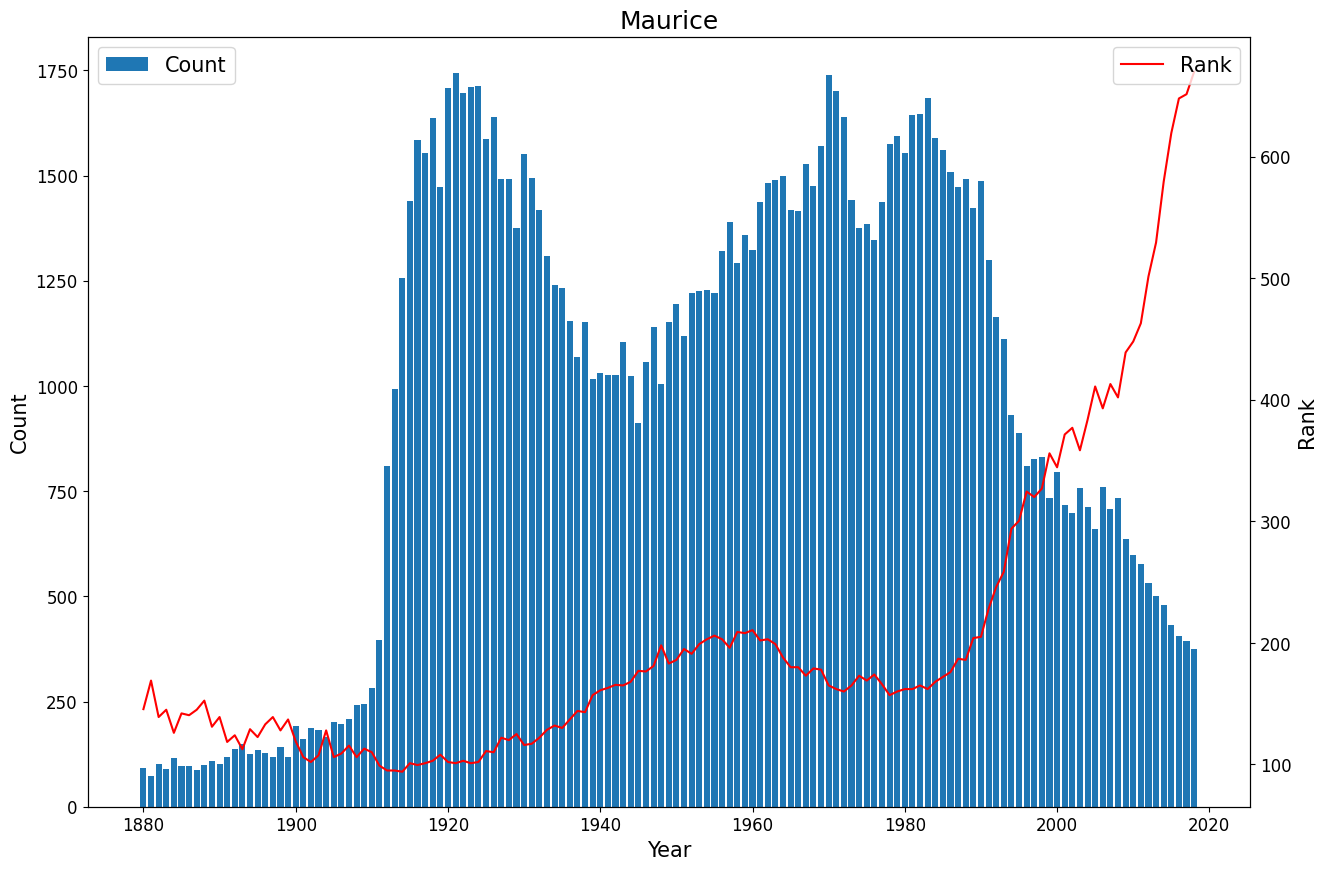

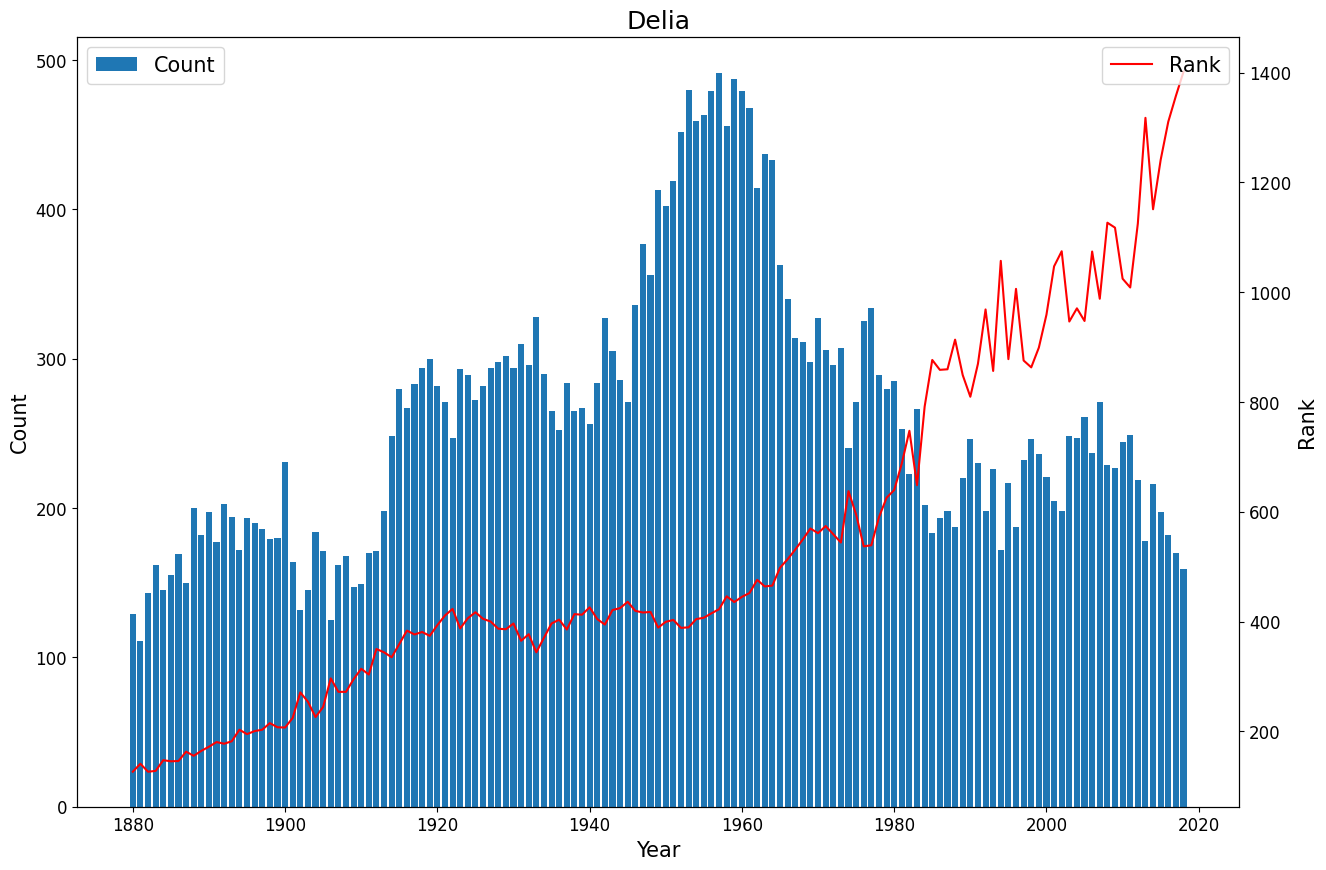

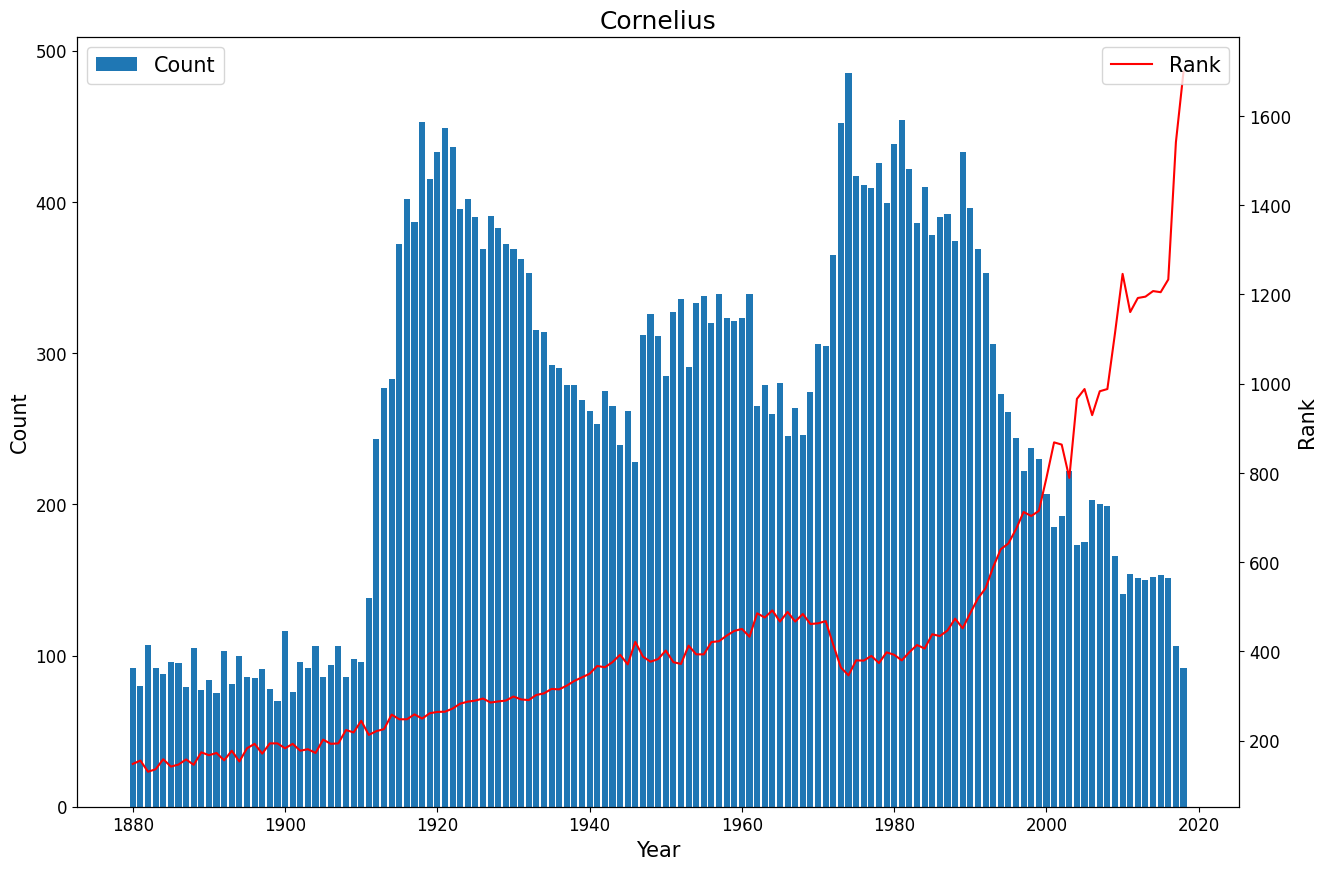

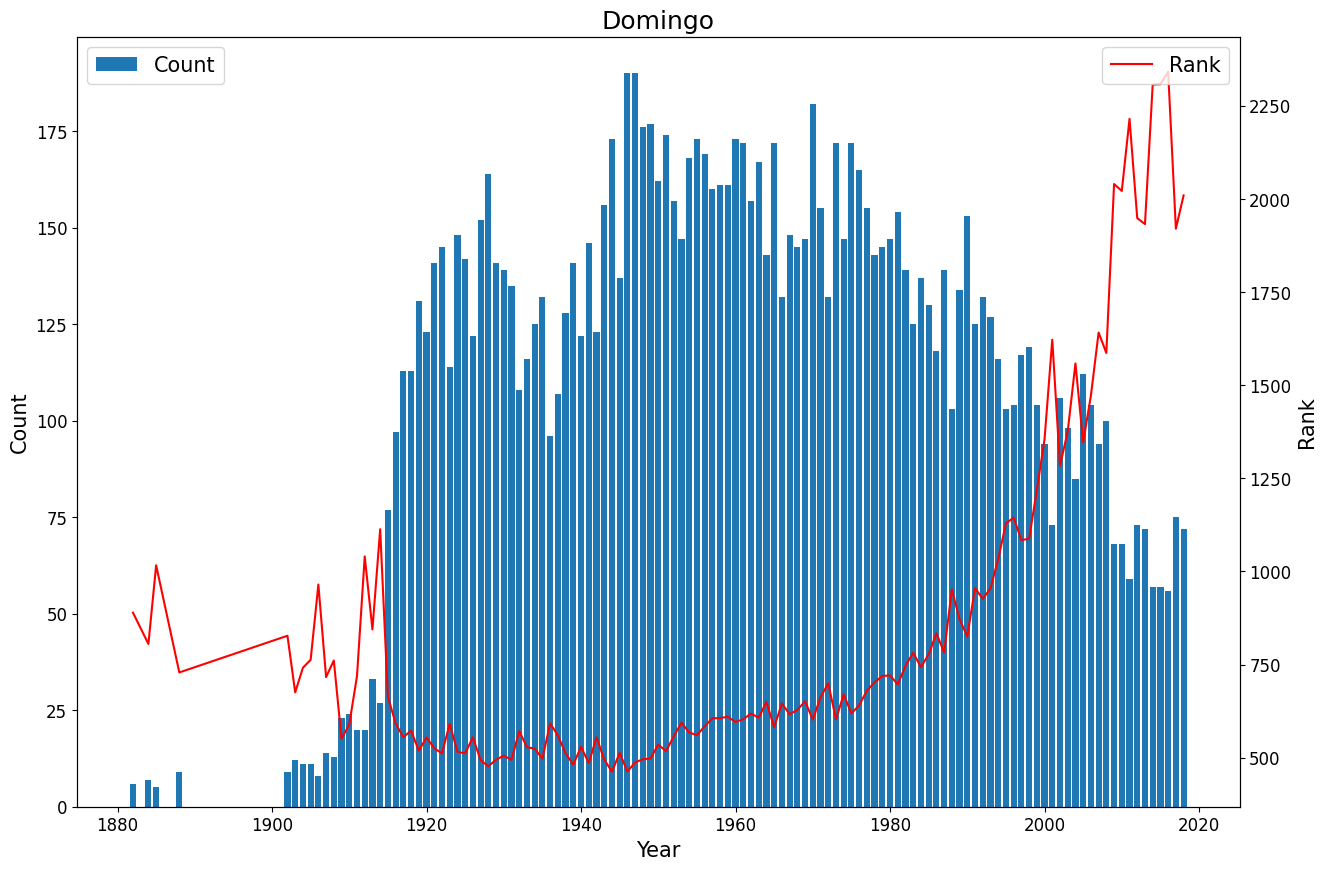

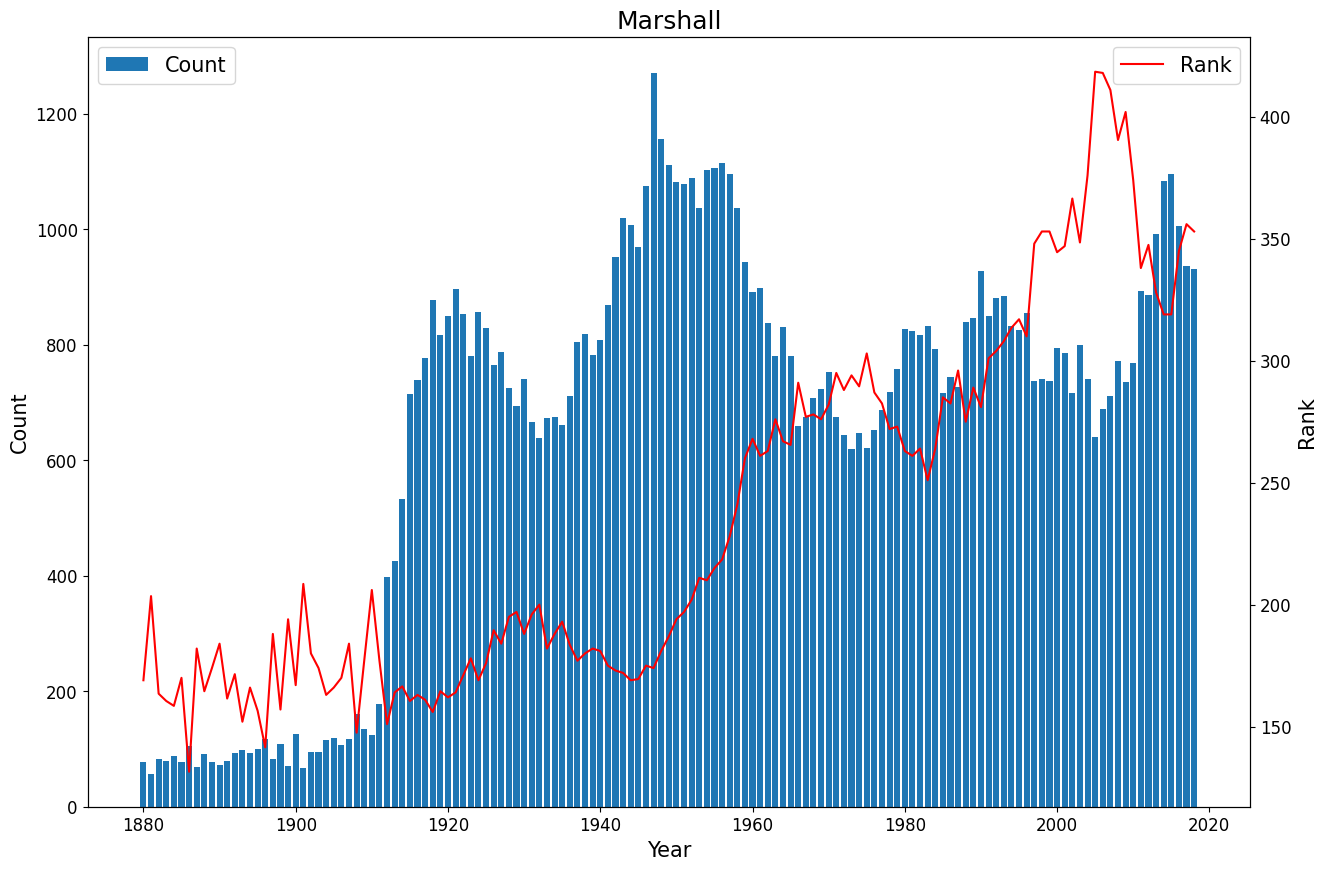

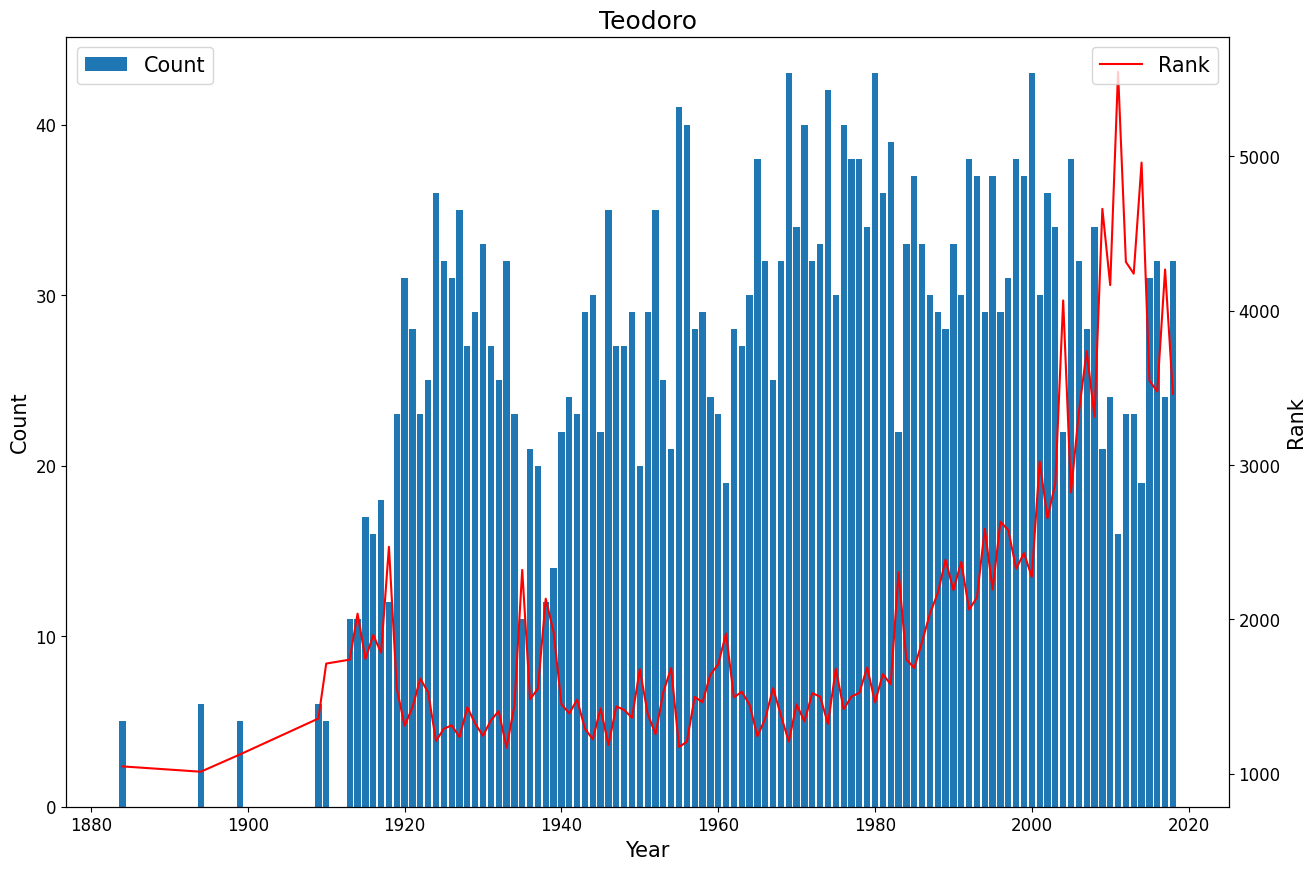

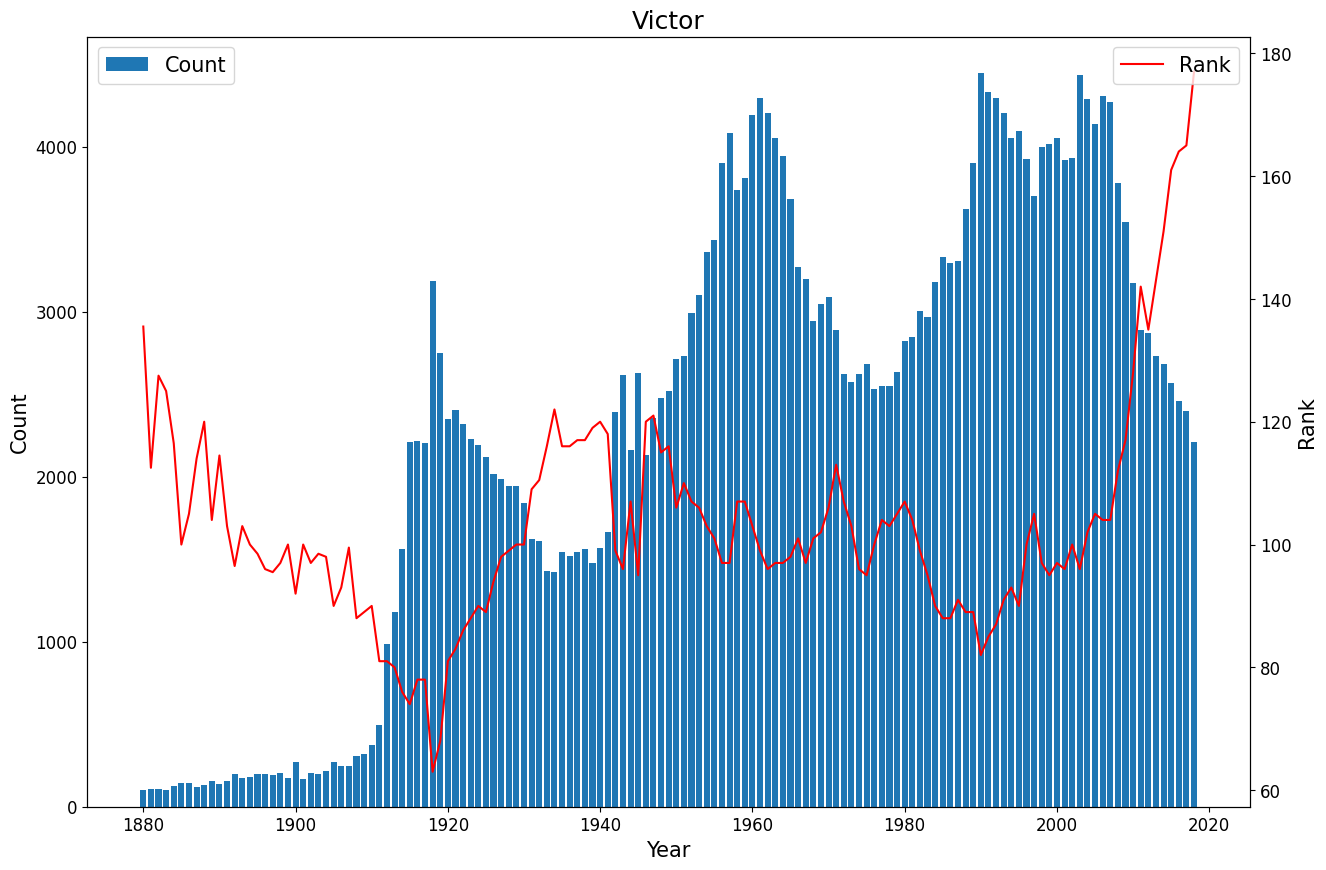

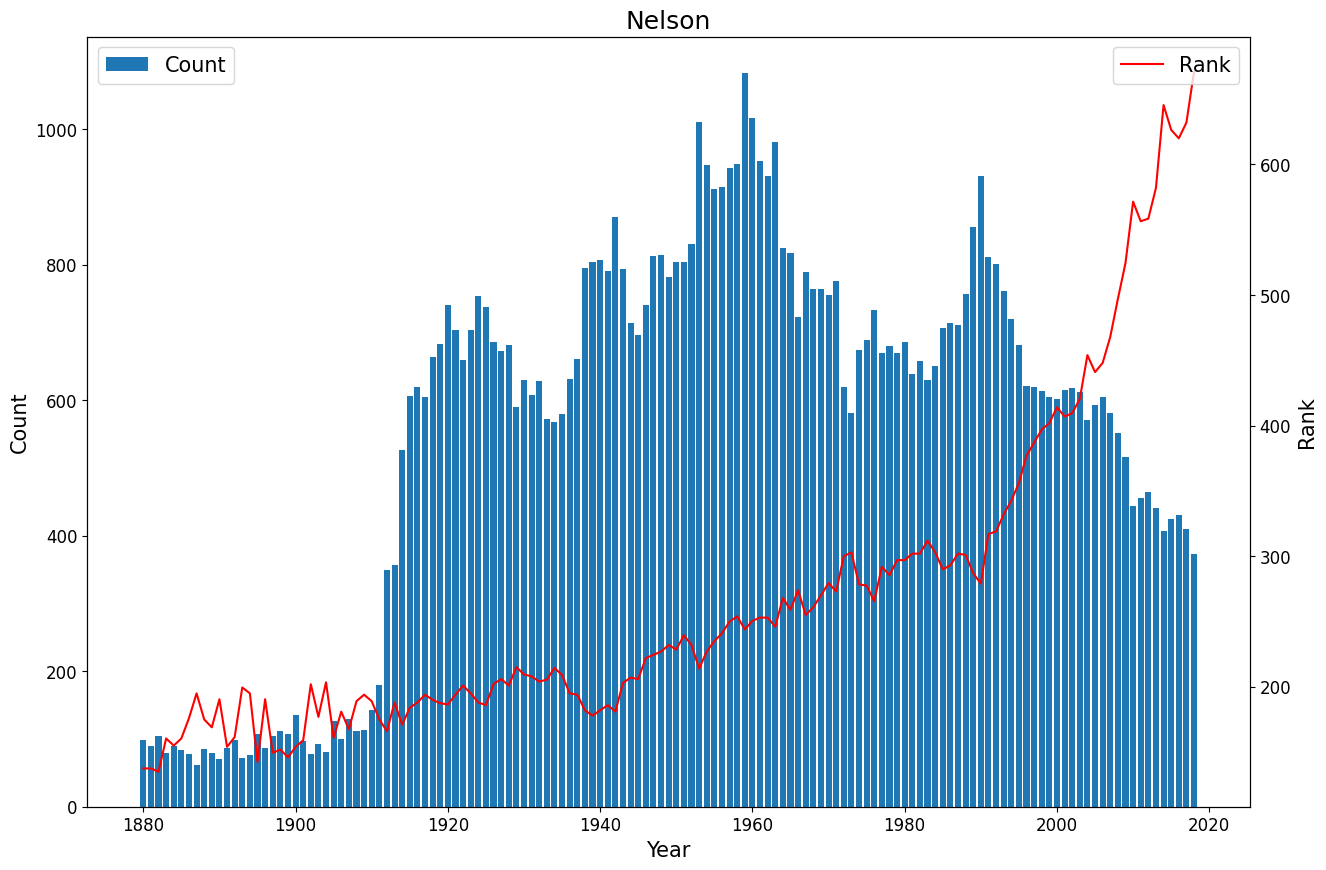

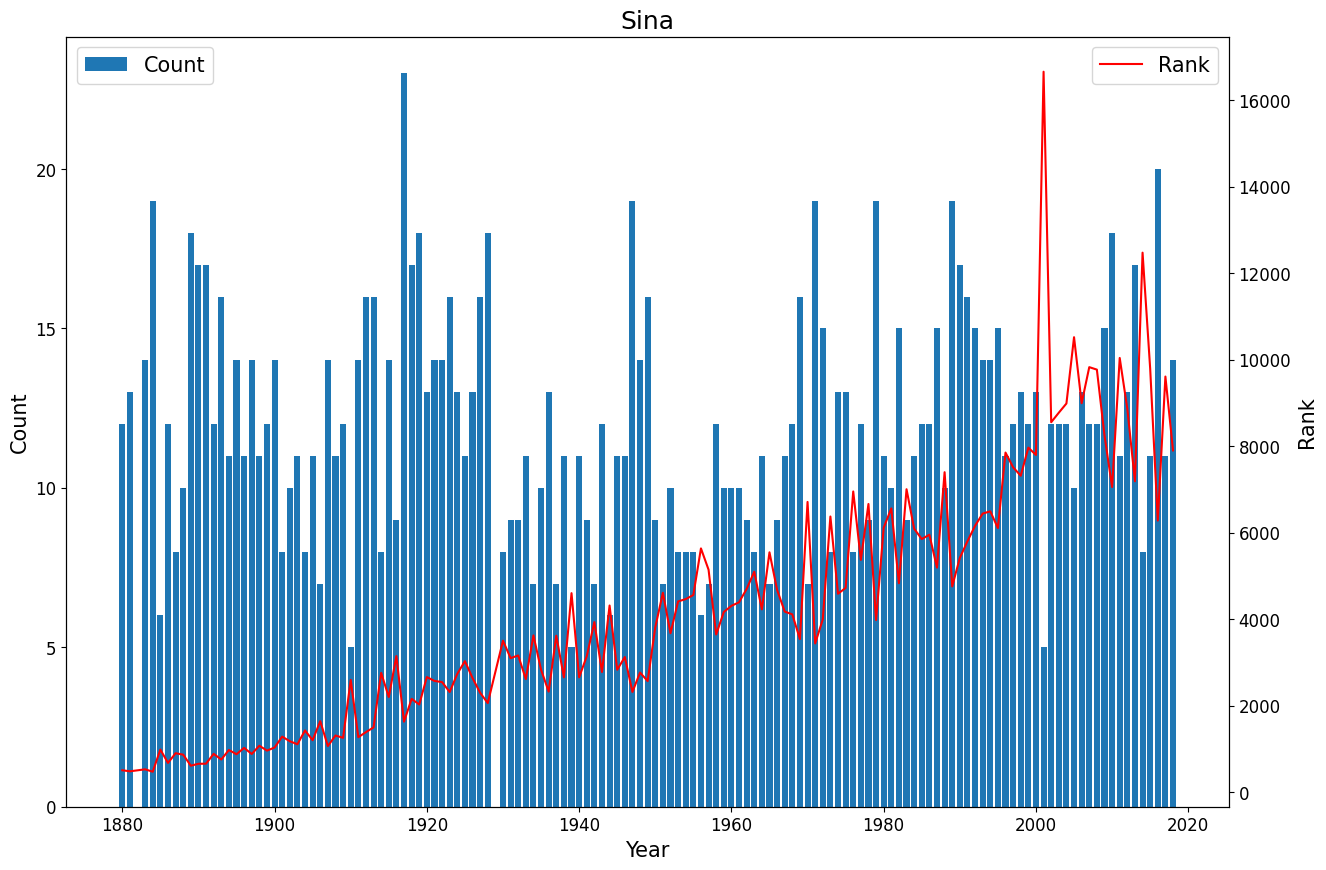

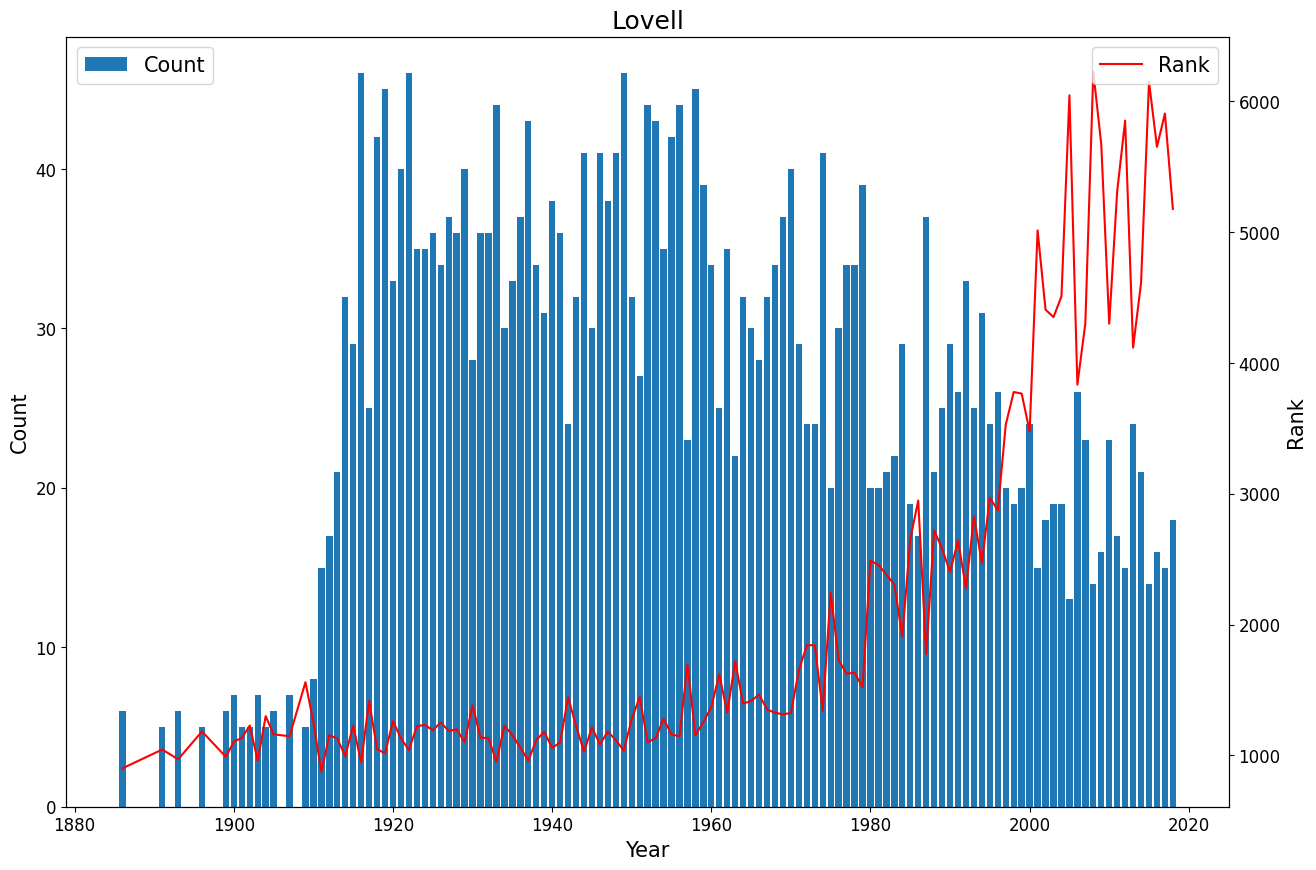

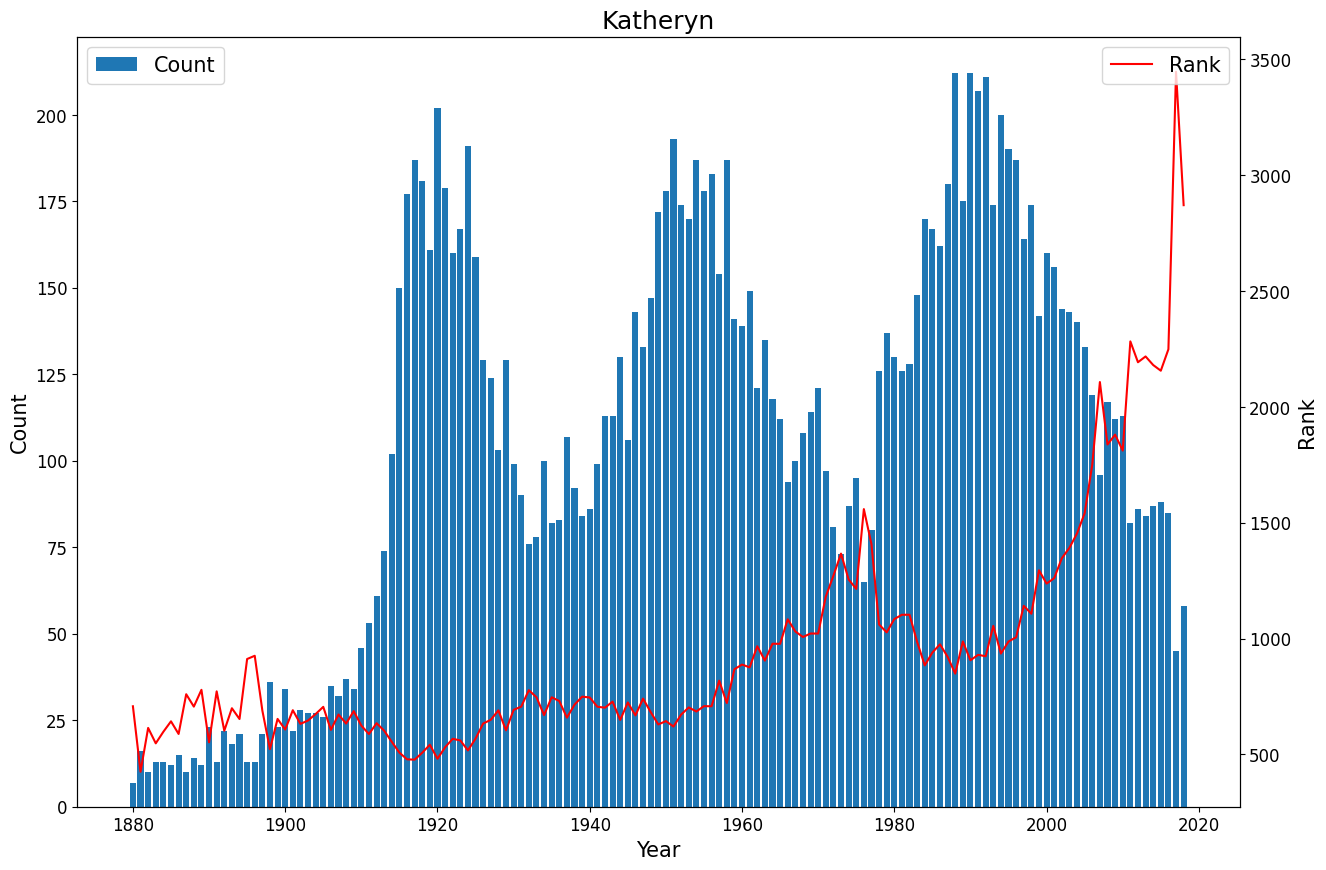

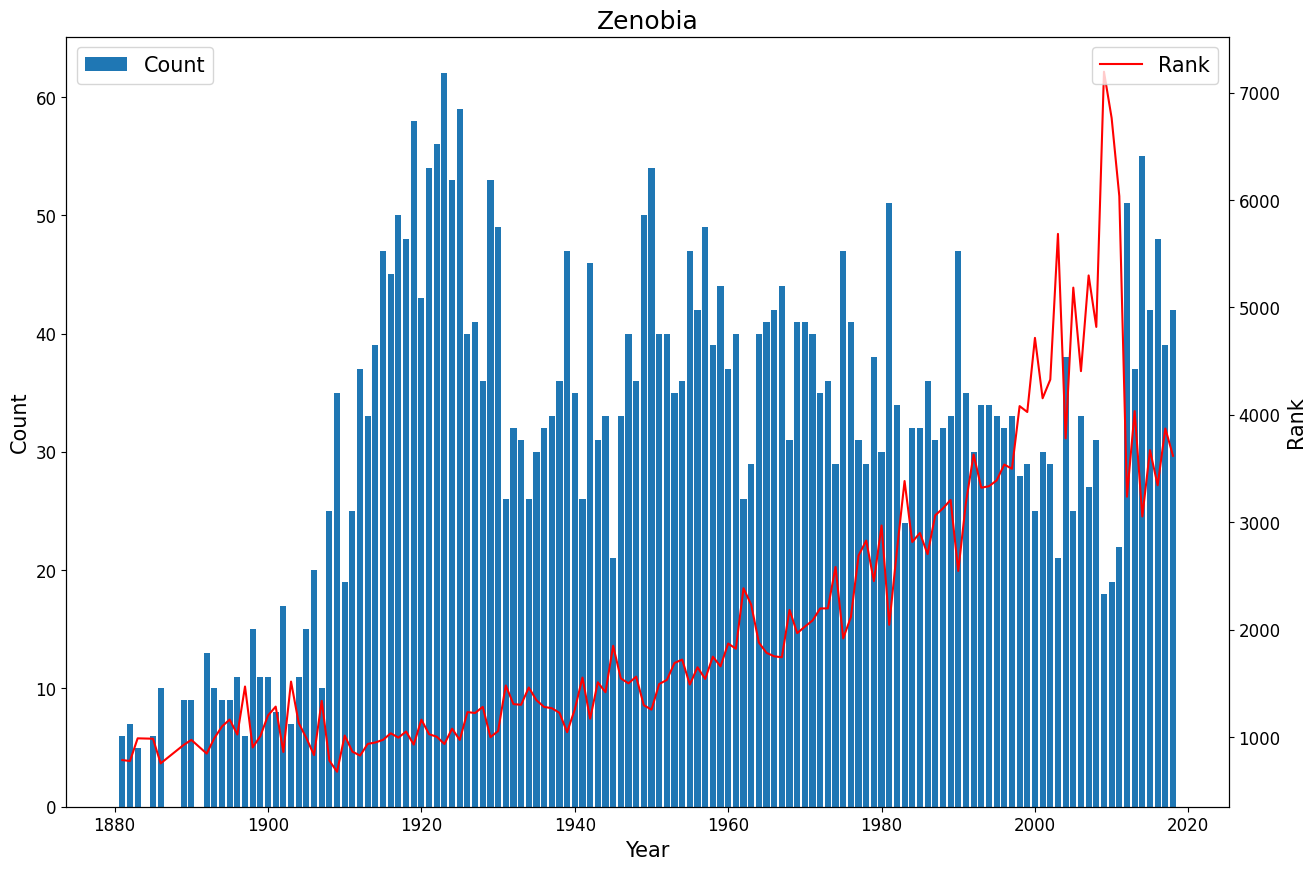

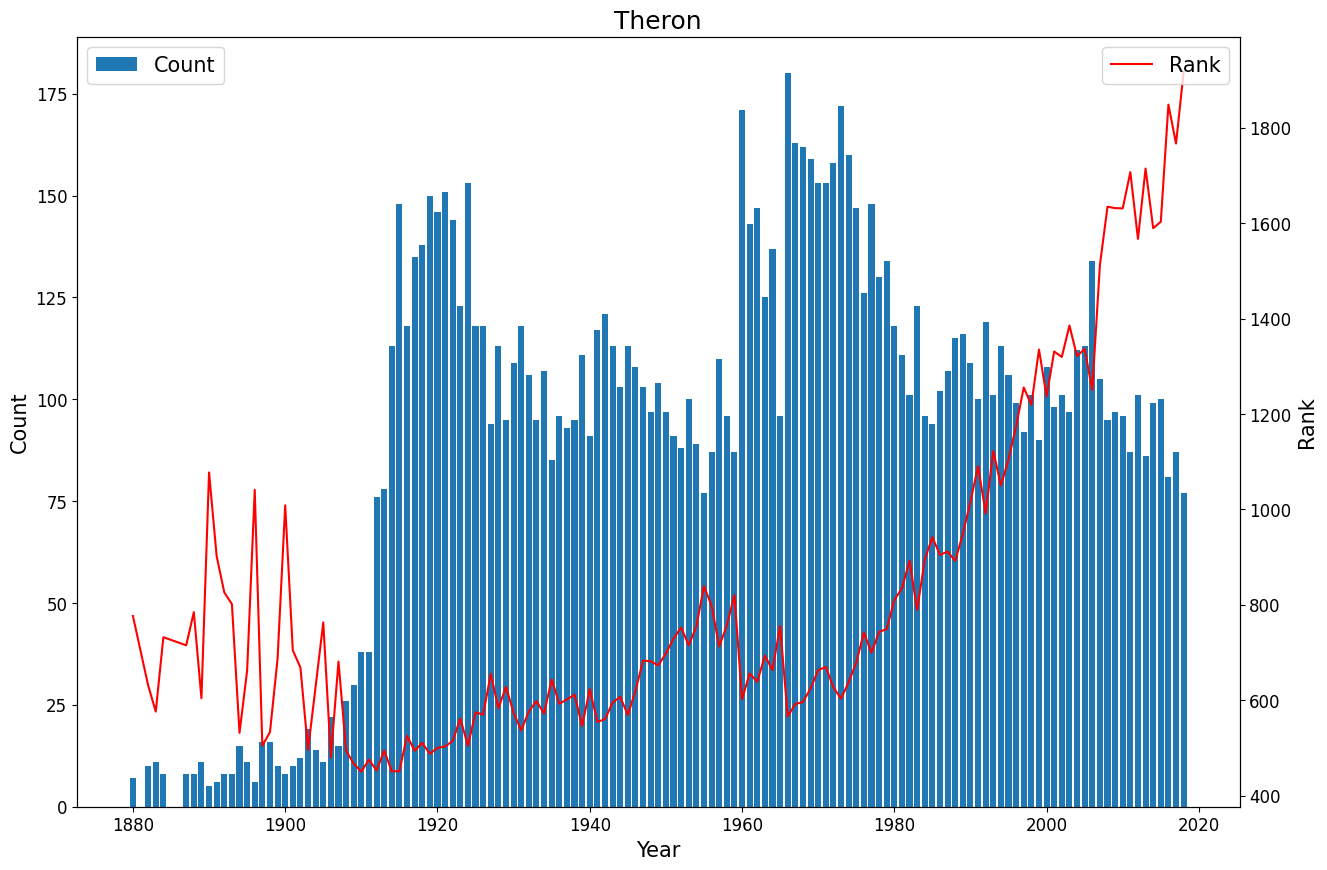

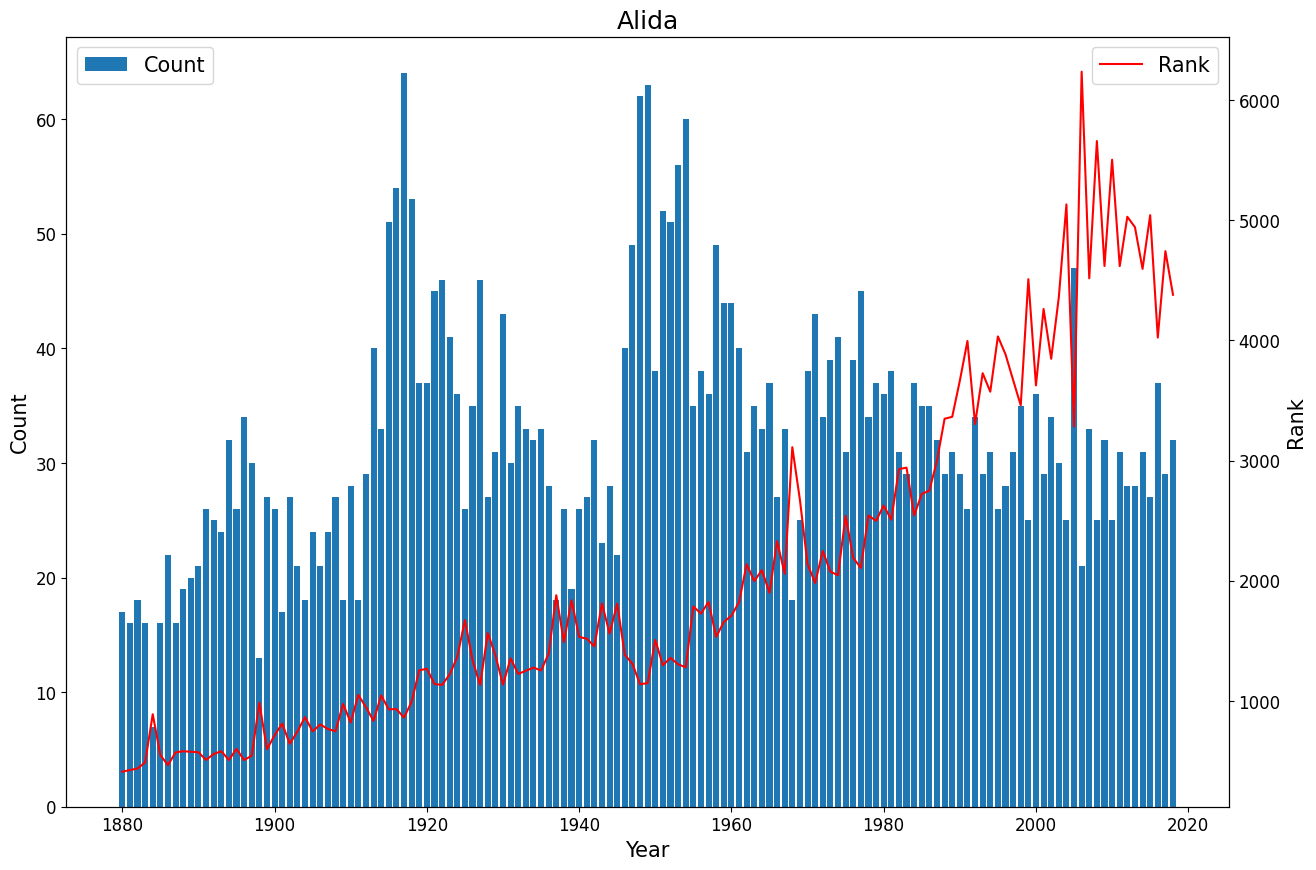

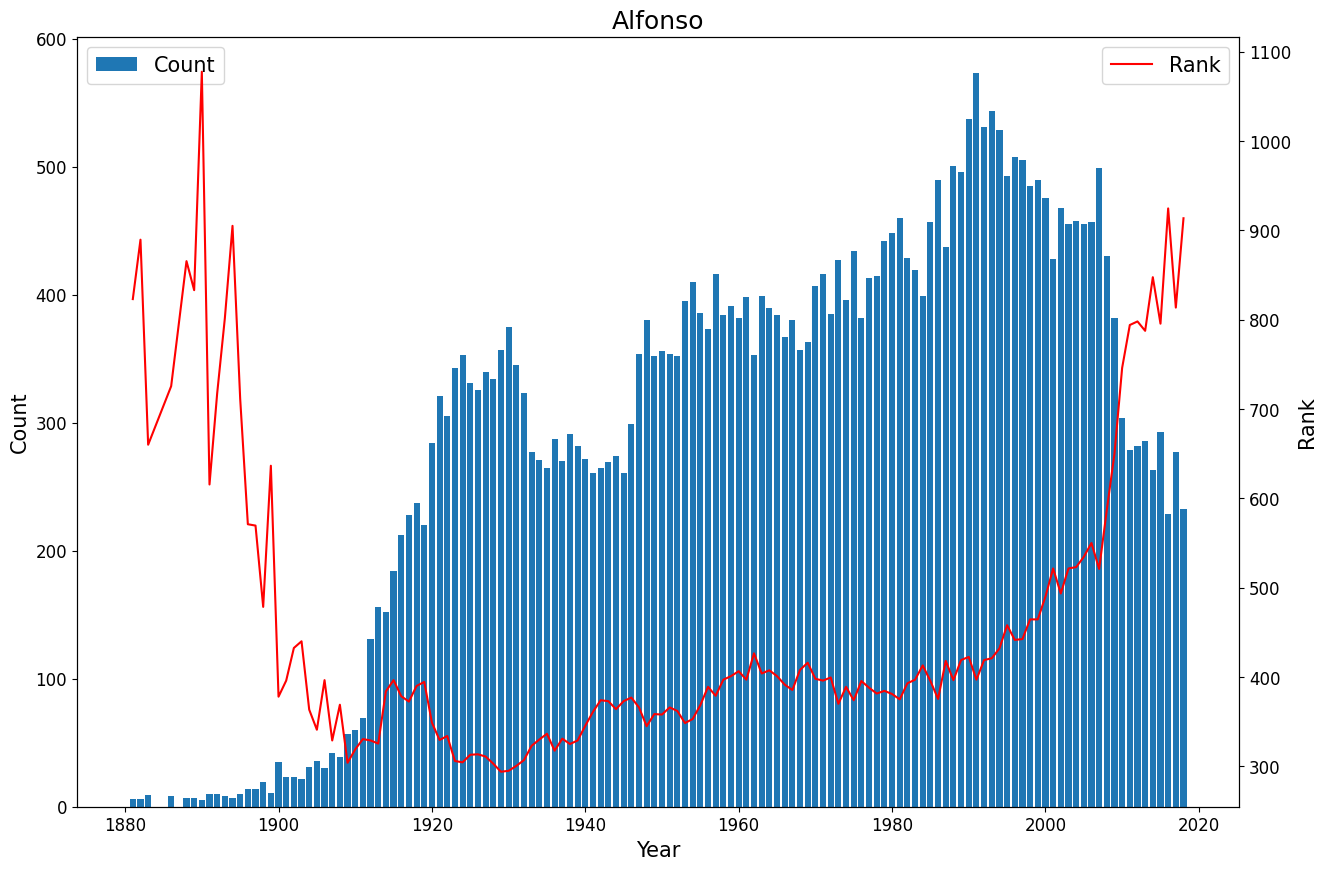

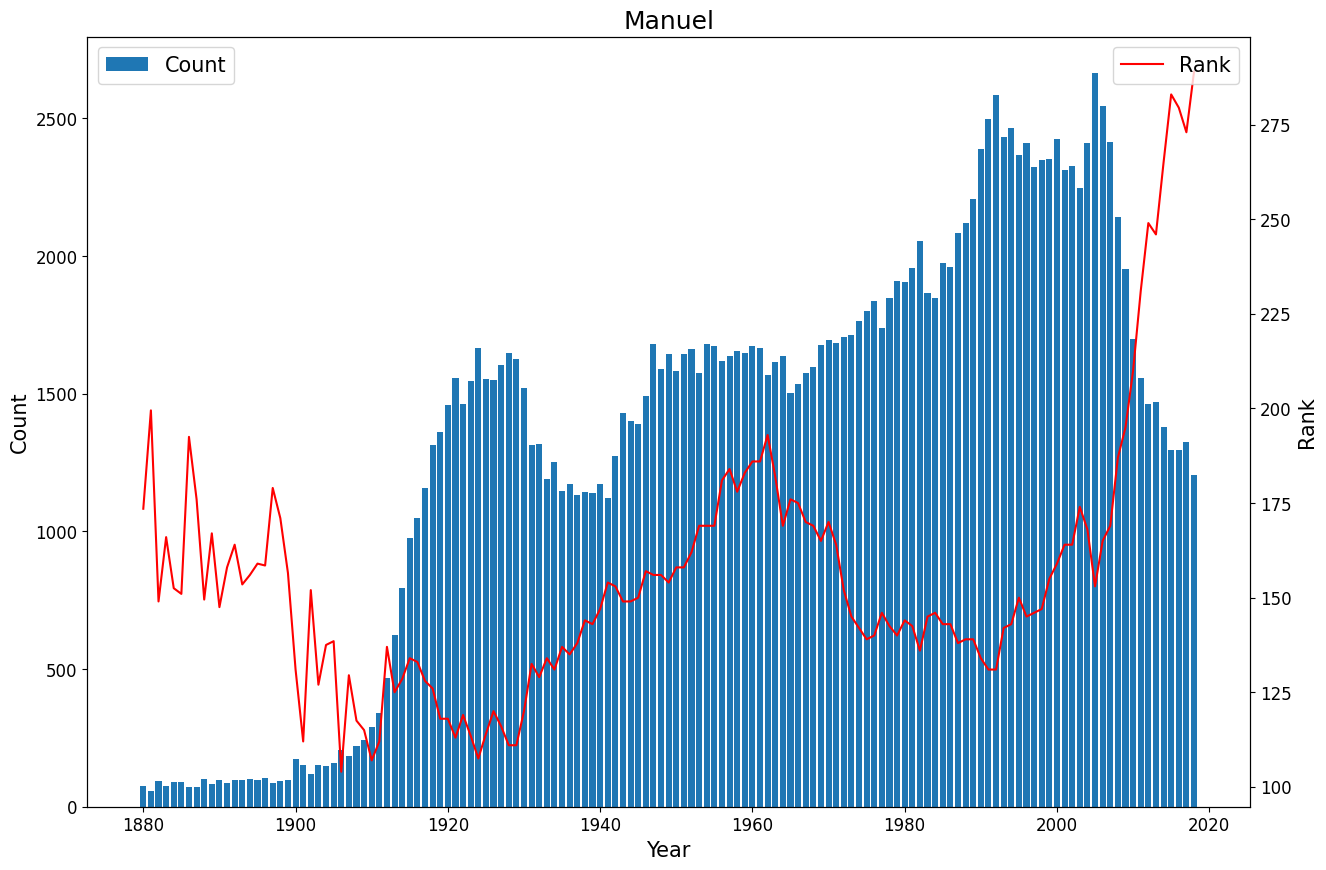

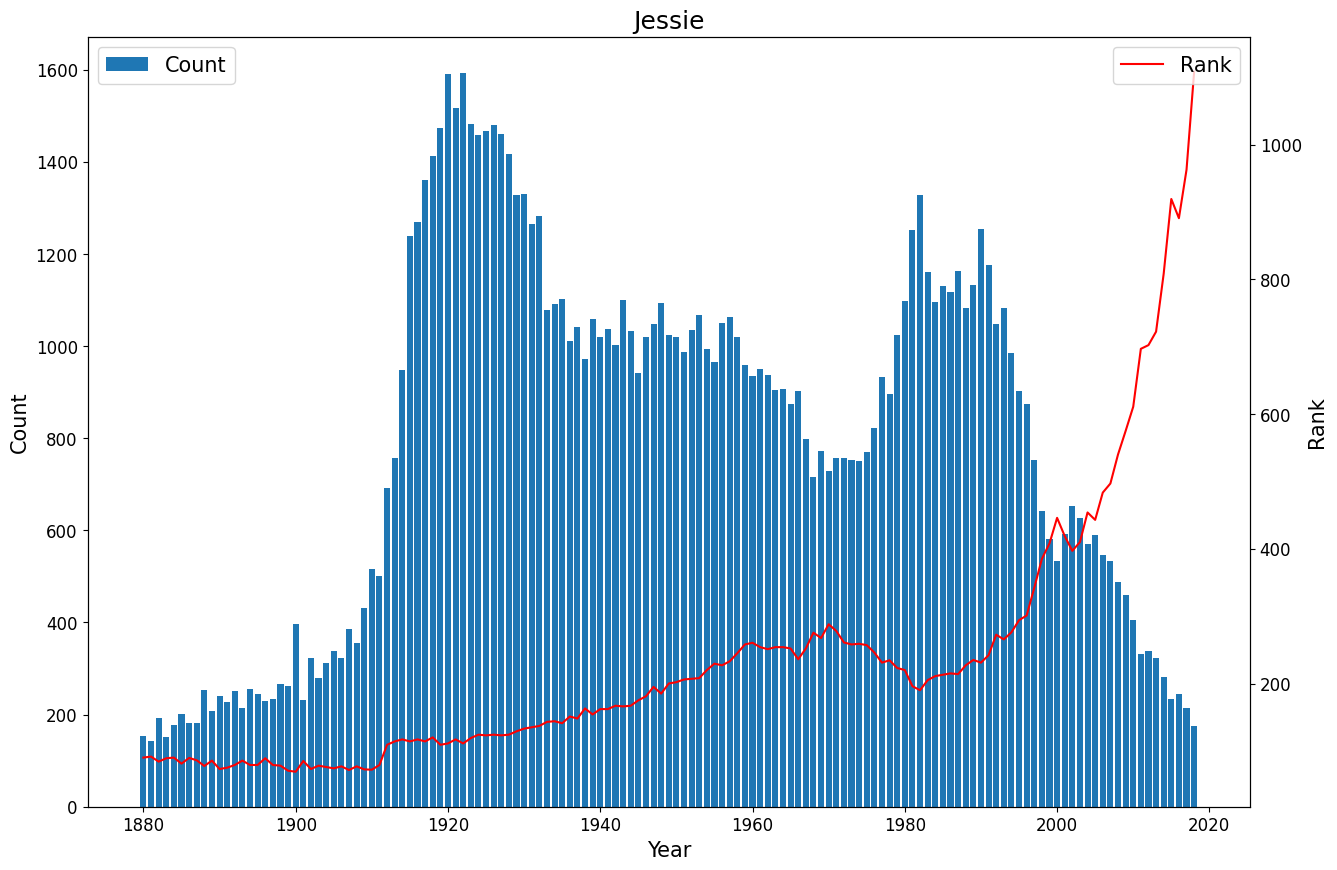

In [102]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [104]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by="Spike_Score",
                                                                 ascending=False).head(20)
spike

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
57027      Kizzy      F   2325       30        1977       2016       1116   
77282     Oaklyn      F   1381       11        2006       2018        627   
25998     Deneen      F   3603       52        1947       2007       1604   
72223     Moesha      F   1067       14        1996       2014        426   
67328     Mareli      F   1038       22        1995       2018        411   
67337     Marely      F   2606       29        1989       2018       1004   
51914      Kanye      M   1334       17        2002       2018        509   
50988      Kairo      M   1632       24        1995       2018        605   
97720   Tennille      F   2172       32        1975       2012        769   
31996     Ensley      F   1241       20        1997       2018        432   
50523    Kadijah      F   1423       37        1969       2018        486   
33216  Everleigh      F   4623       11        2008       2018       1546   
17241     Catina      F   4178       47        1949       2011       1370   
90121  Shaquille      M   5494       30        1989       2018       1784   
85560    Royalty      F   2649       15        2001       2018        836   
4298    Allisson      F   2441       22        1976       2018        767   
73939      Nakia      M   1991       40        1974       2015        612   
2550      Aitana      F   2329       24        1995       2018        704   
52482    Kashton      M   2254       15        2004       2018        680   
44832    Jaslene      F   2909       18        1995       2018        872   

       Best_Year  Spike_Score  
57027       1977        48.00  
77282       2018        45.40  
25998       1964        44.52  
72223       1996        39.93  
67328       2008        39.60  
67337       2008        38.53  
51914       2004        38.16  
50988       2018        37.07  
97720       1976        35.41  
31996       2018        34.81  
50523       1994        34.15  
33216       2018        33.44  
17241       1972        32.79  
90121       1993        32.47  
85560       2018        31.56  
4298        2008        31.42  
73939       1974        30.74  
2550        2018        30.23  
52482       2018        30.17  
44832       2008        29.98

In [107]:
l2 = list(zip(spike.Name, spike.Gender))
l2

[('Kizzy', 'F'),
 ('Oaklyn', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Mareli', 'F'),
 ('Marely', 'F'),
 ('Kanye', 'M'),
 ('Kairo', 'M'),
 ('Tennille', 'F'),
 ('Ensley', 'F'),
 ('Kadijah', 'F'),
 ('Everleigh', 'F'),
 ('Catina', 'F'),
 ('Shaquille', 'M'),
 ('Royalty', 'F'),
 ('Allisson', 'F'),
 ('Nakia', 'M'),
 ('Aitana', 'F'),
 ('Kashton', 'M'),
 ('Jaslene', 'F')]

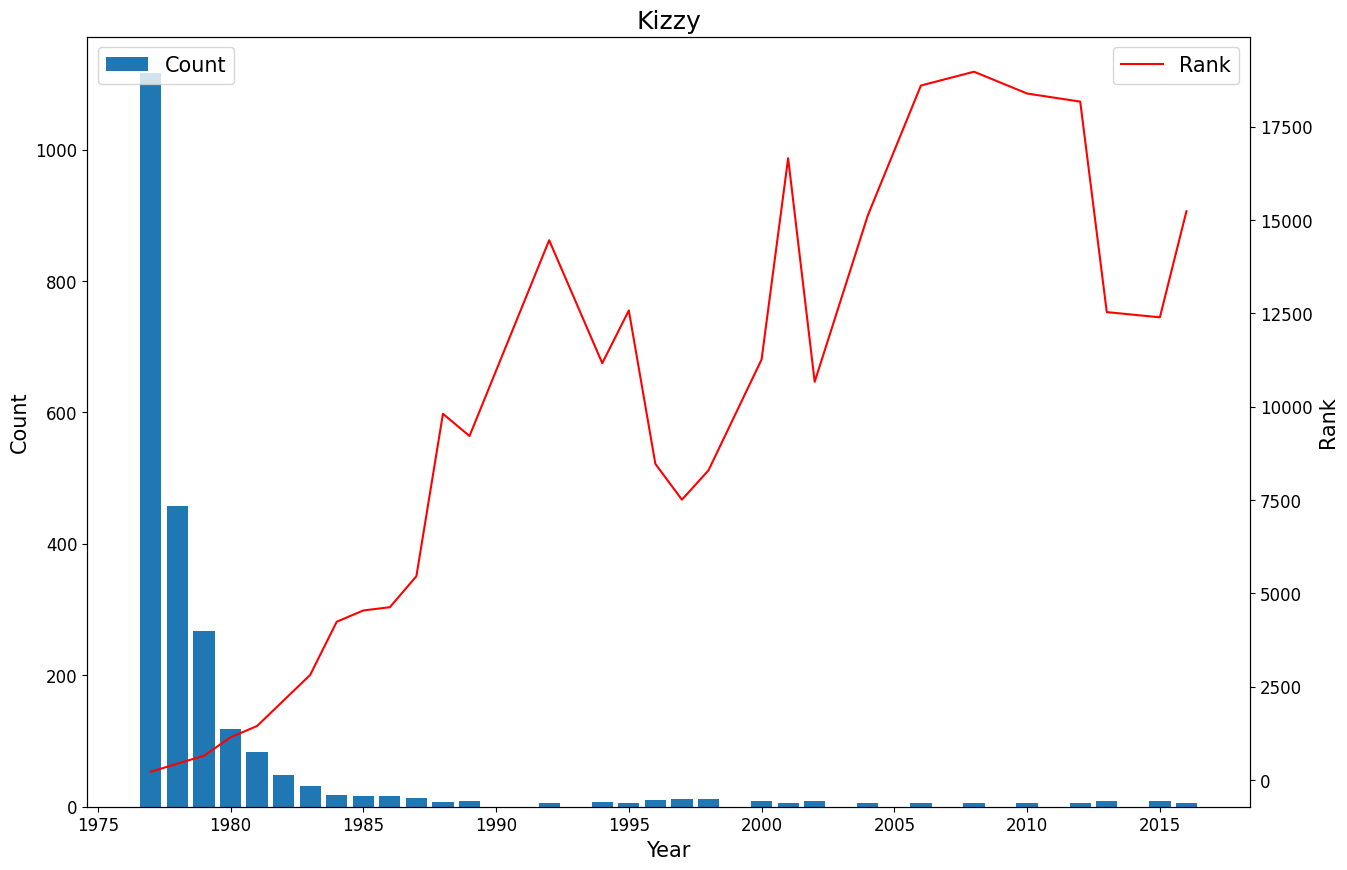

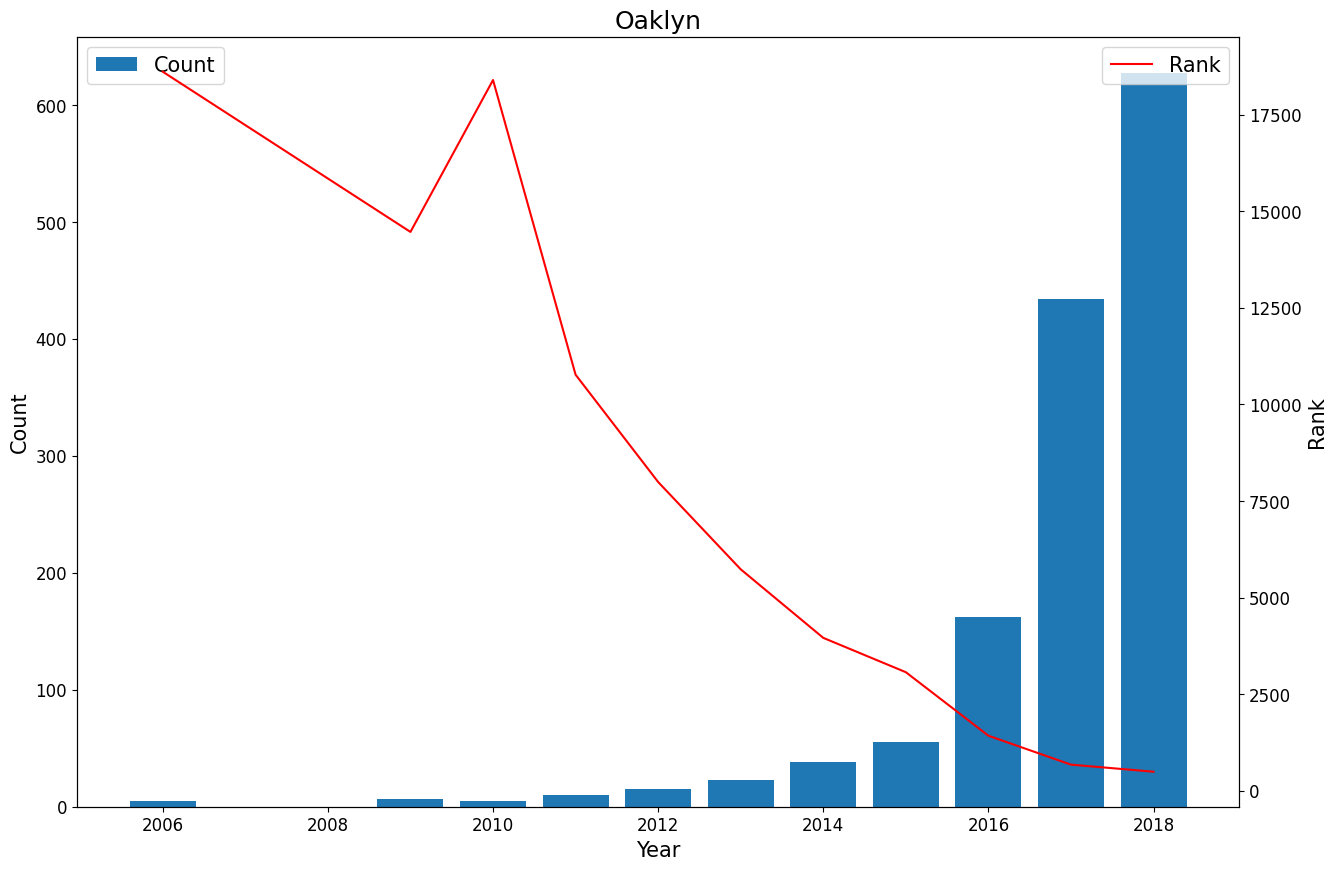

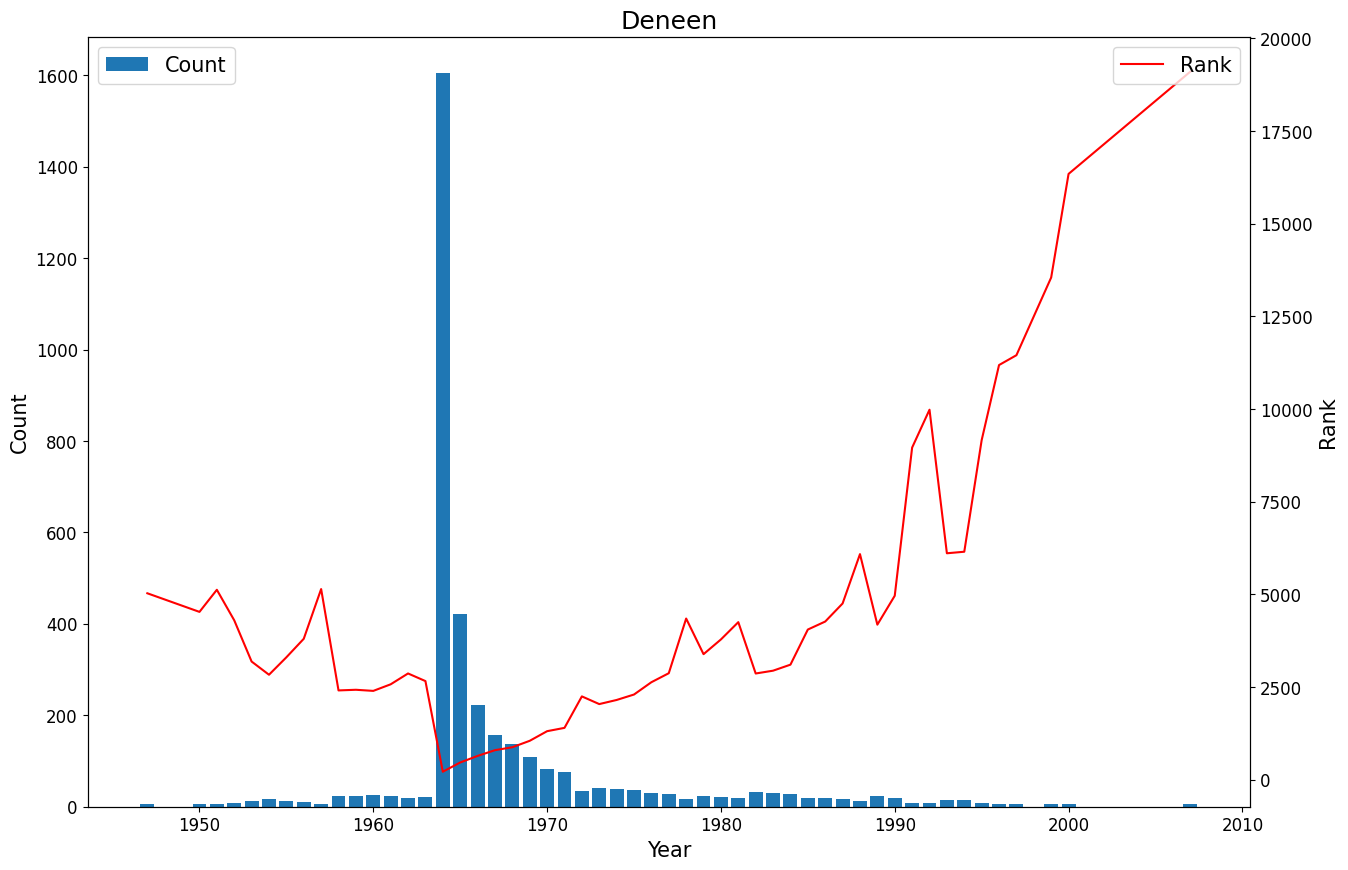

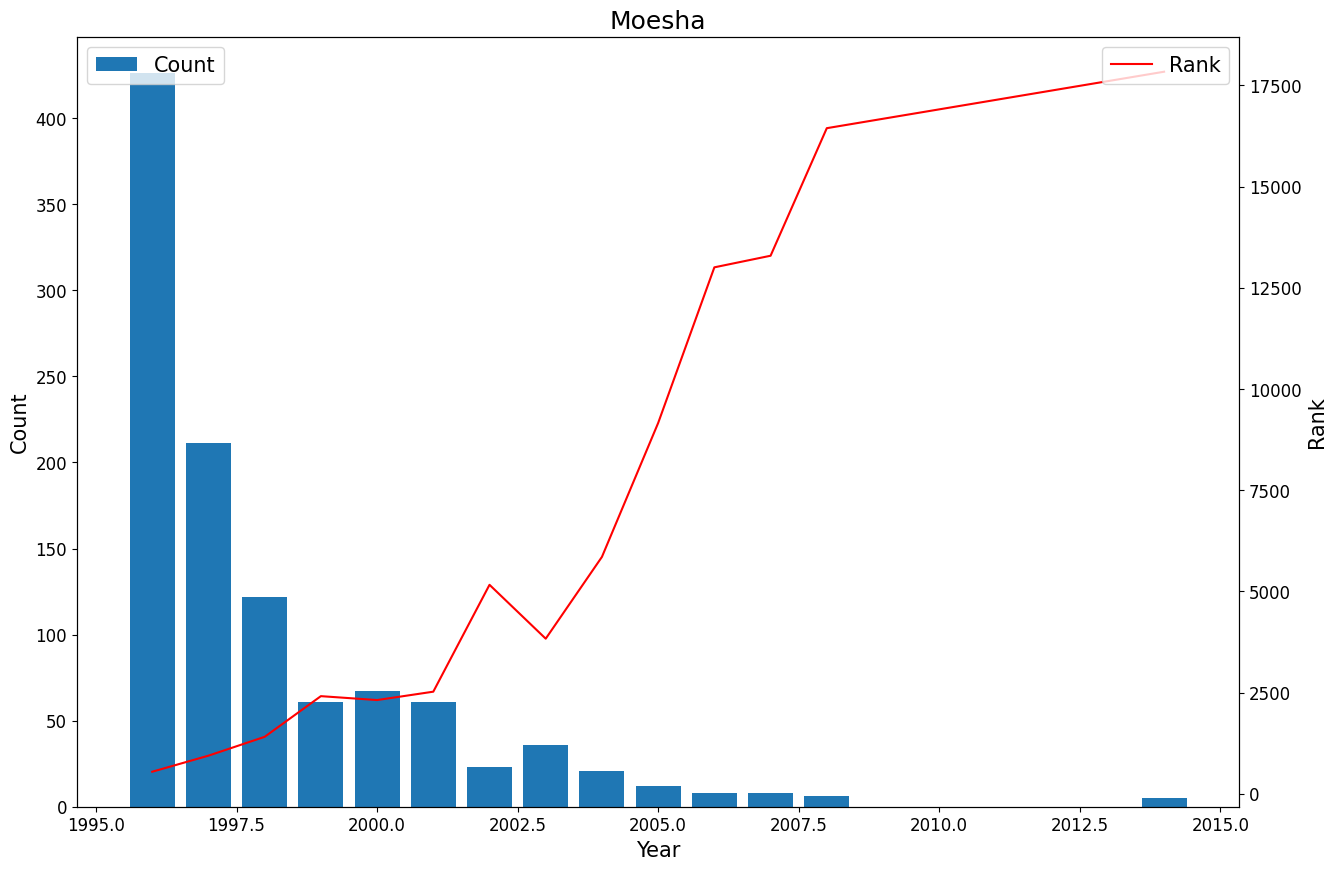

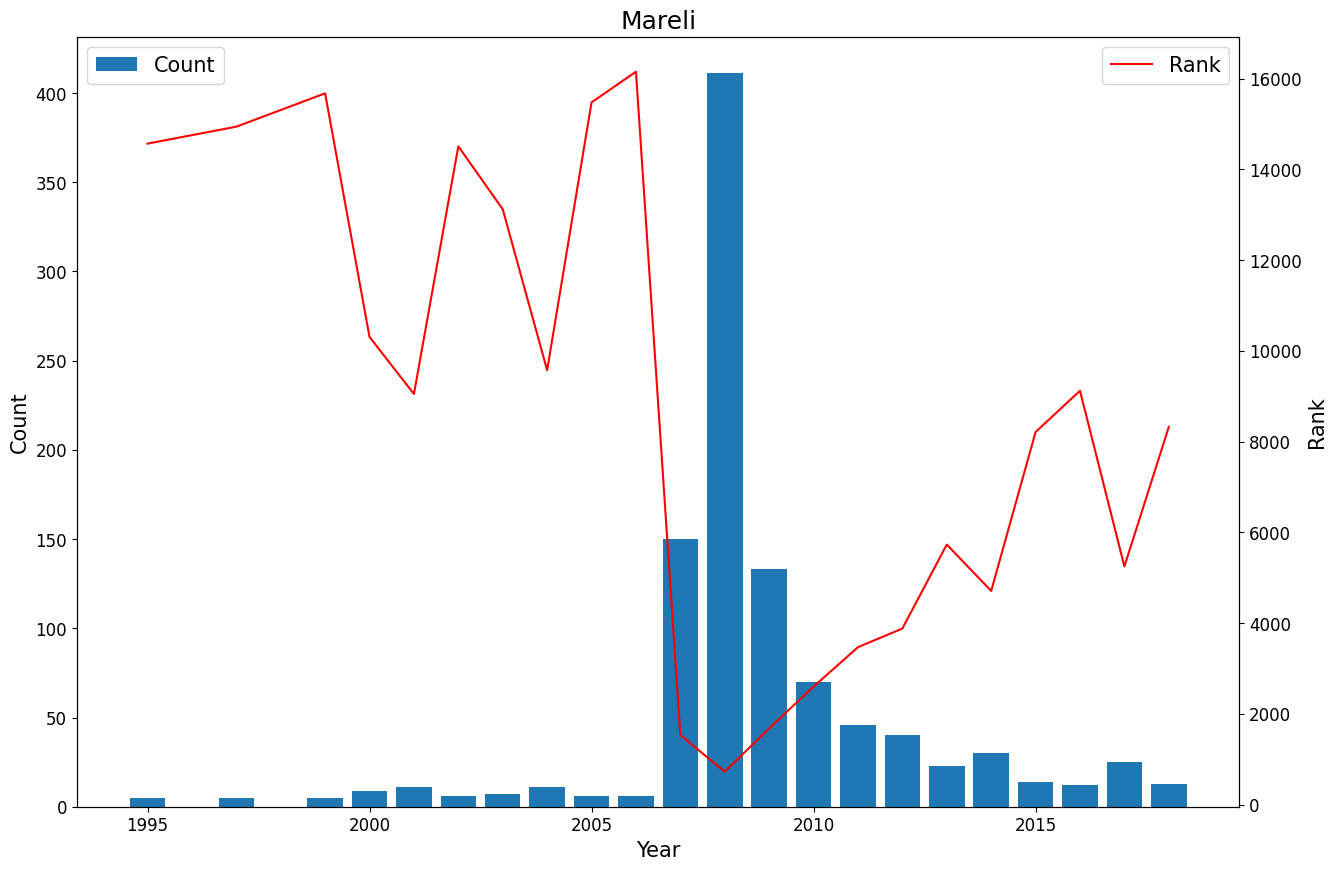

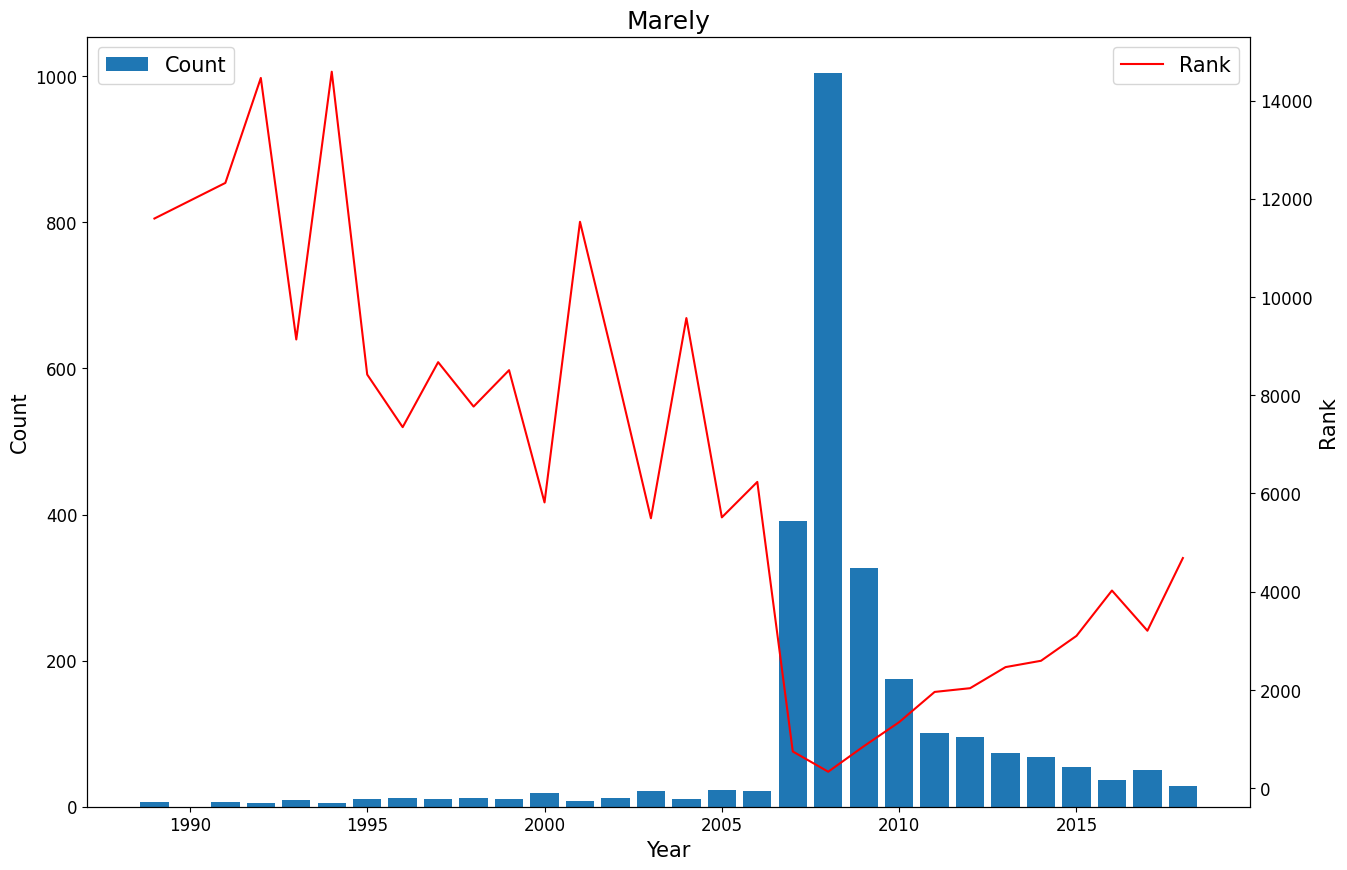

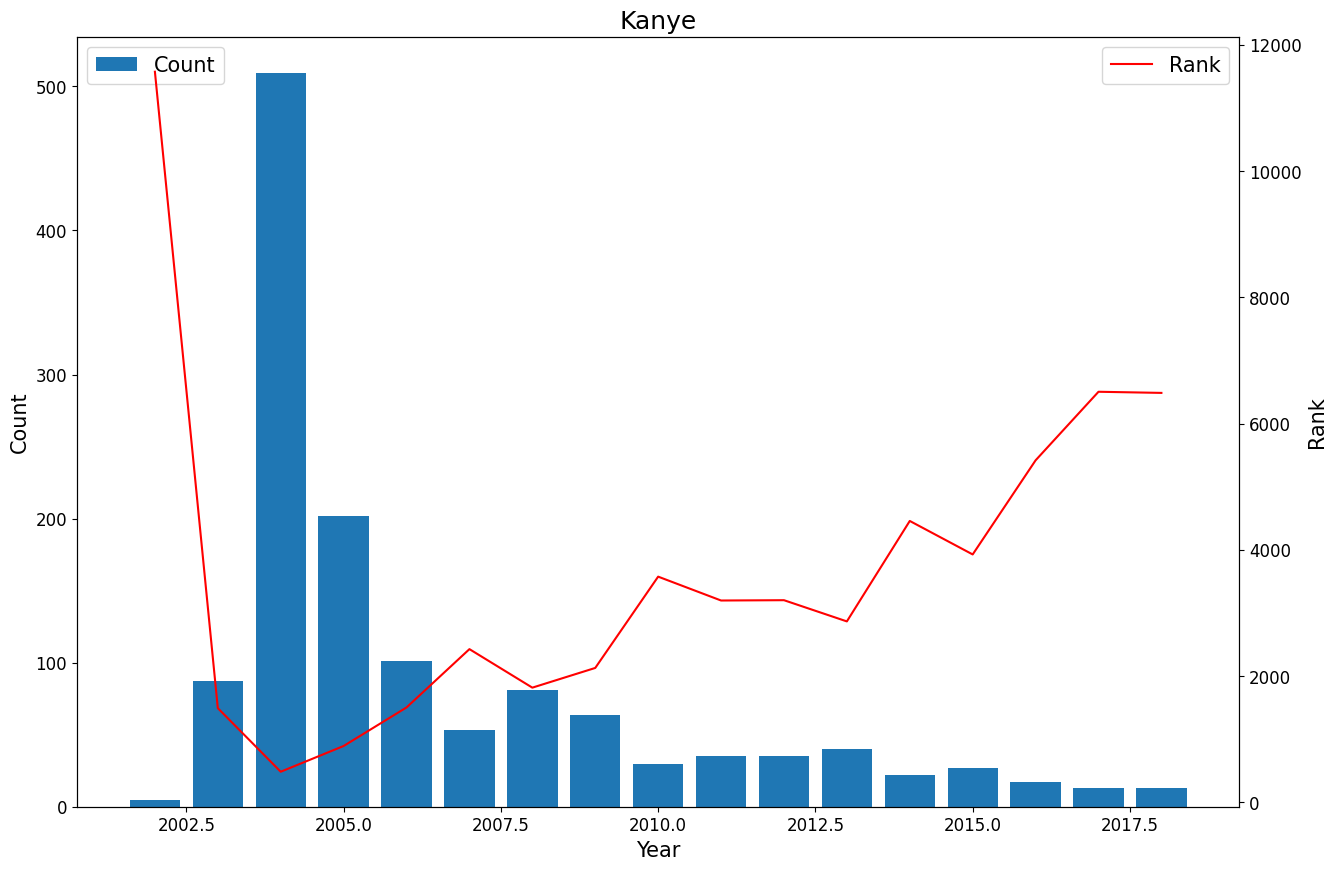

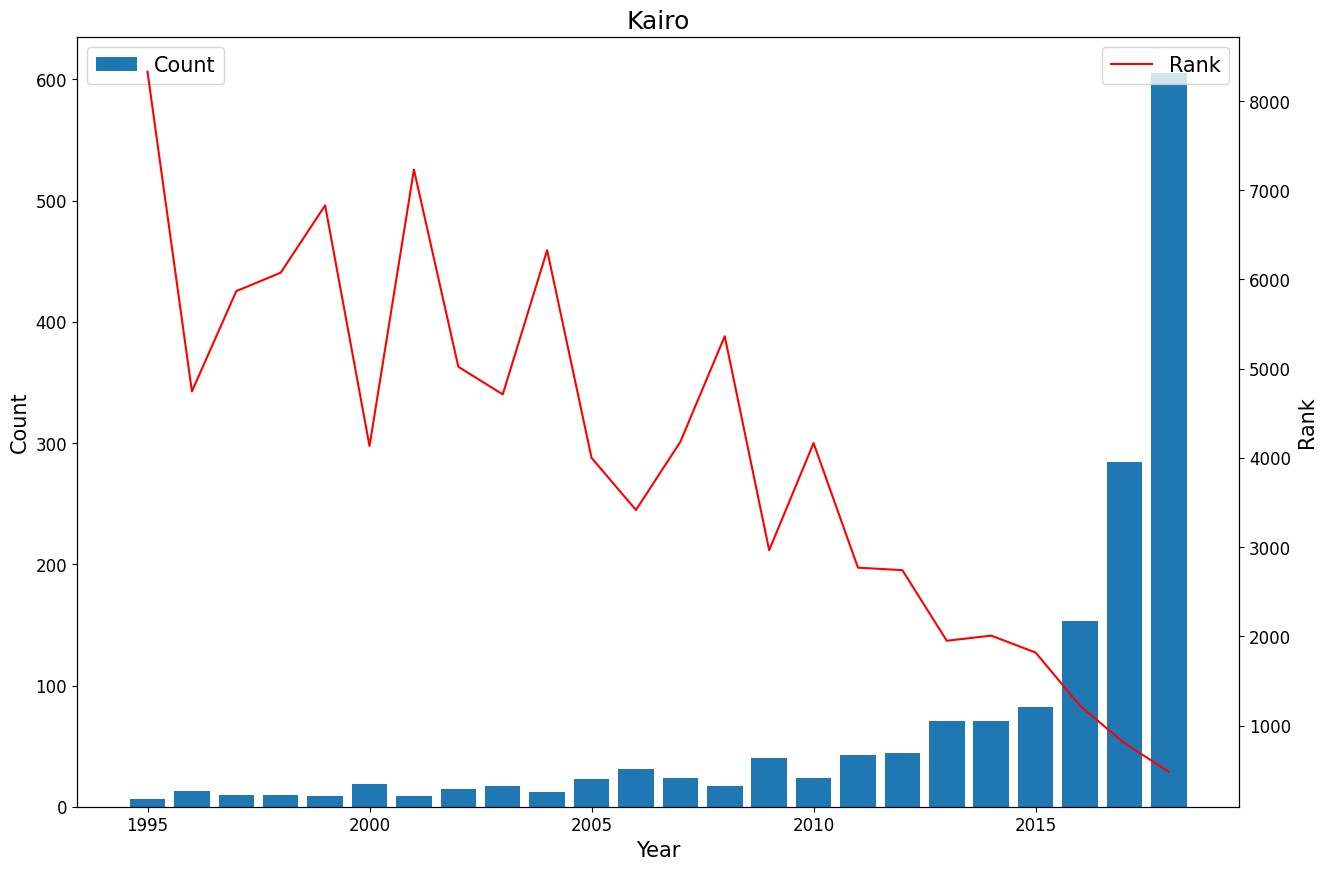

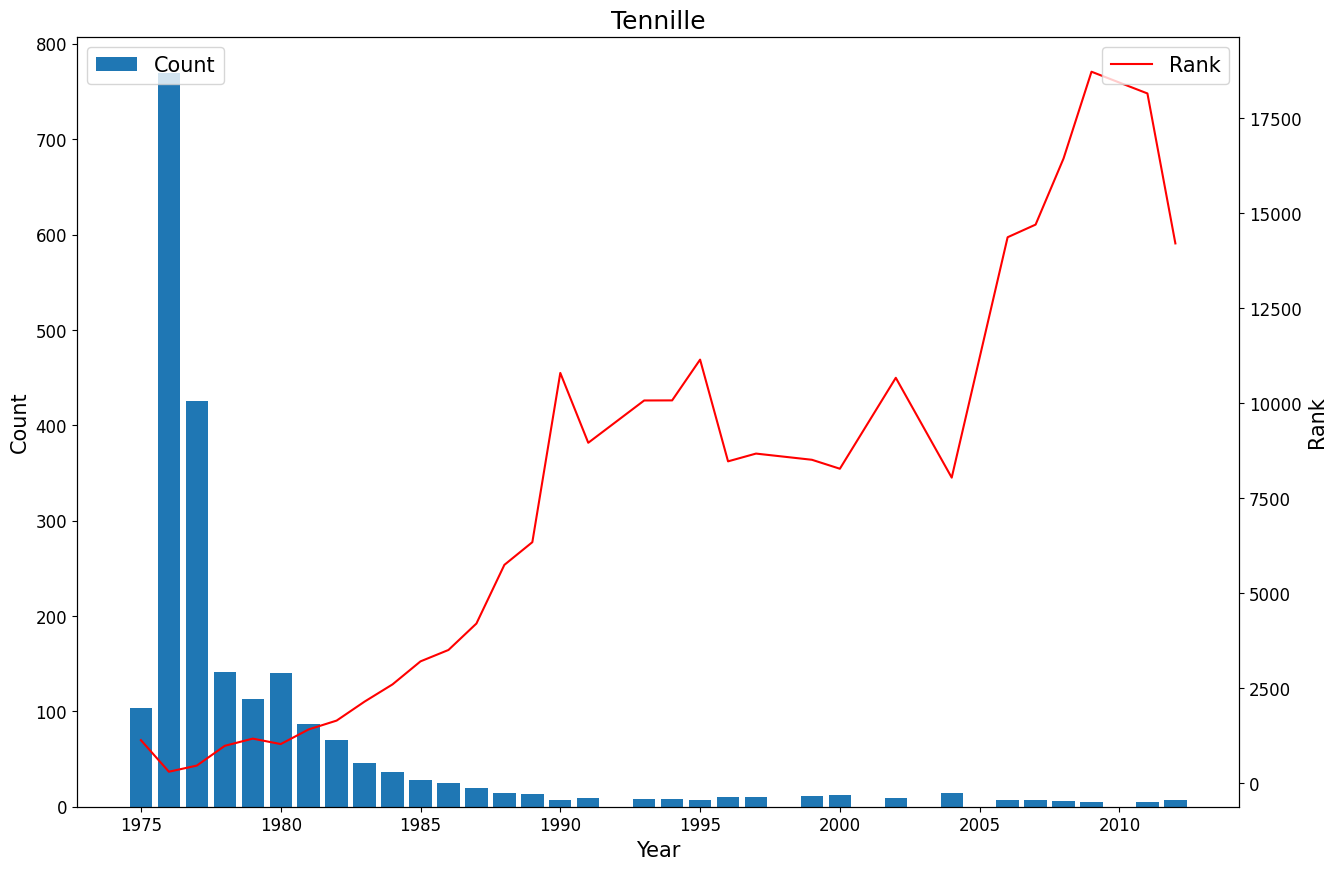

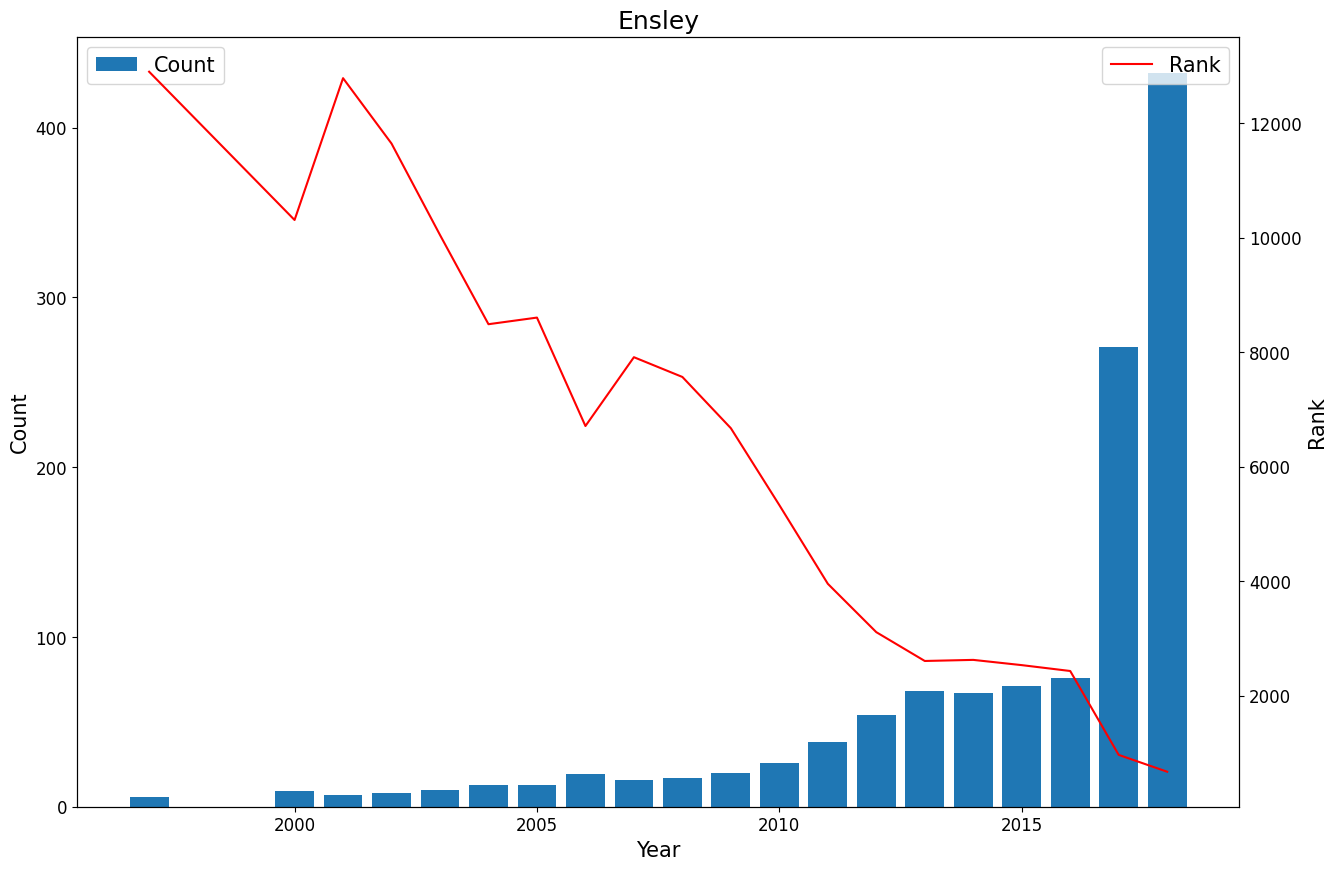

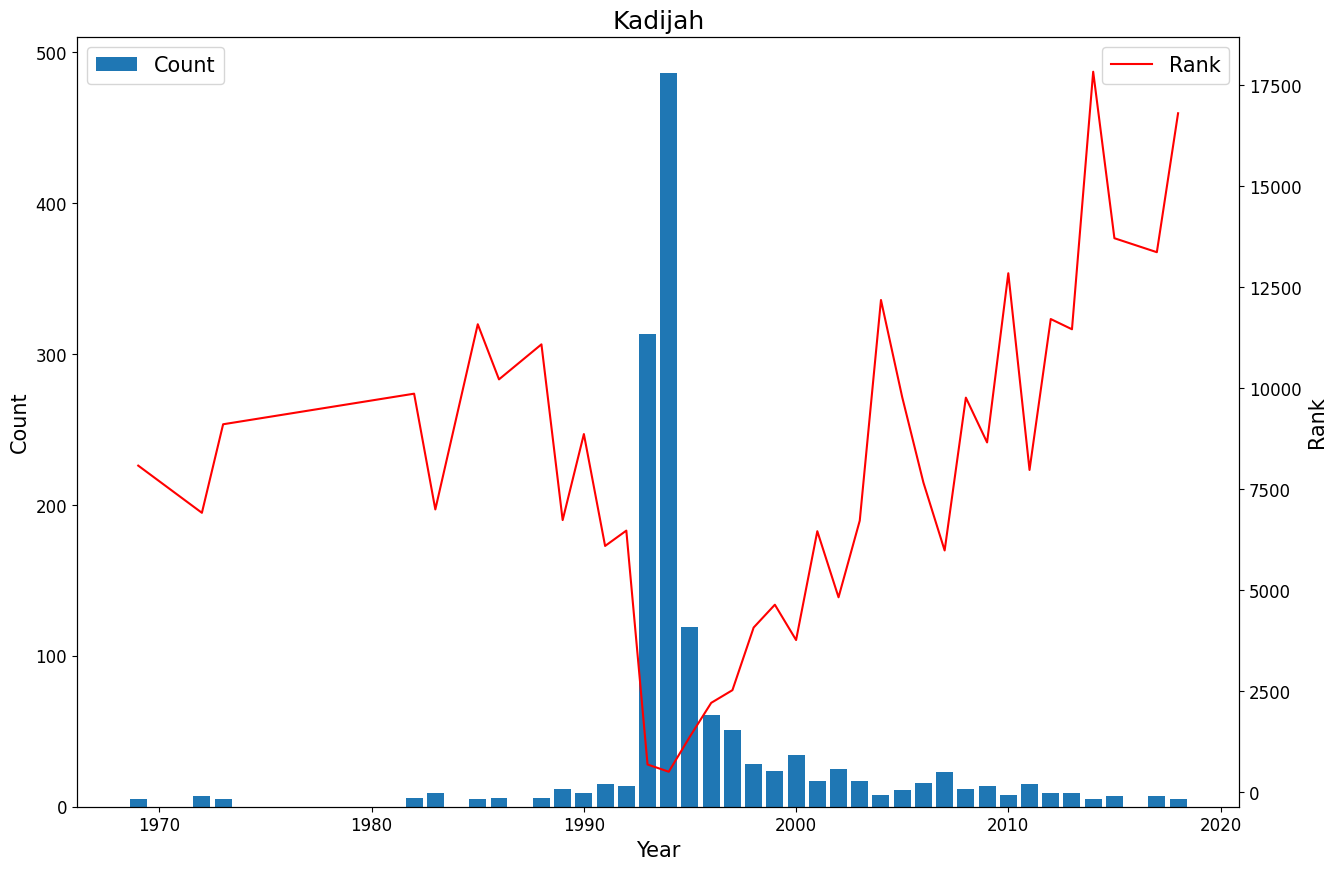

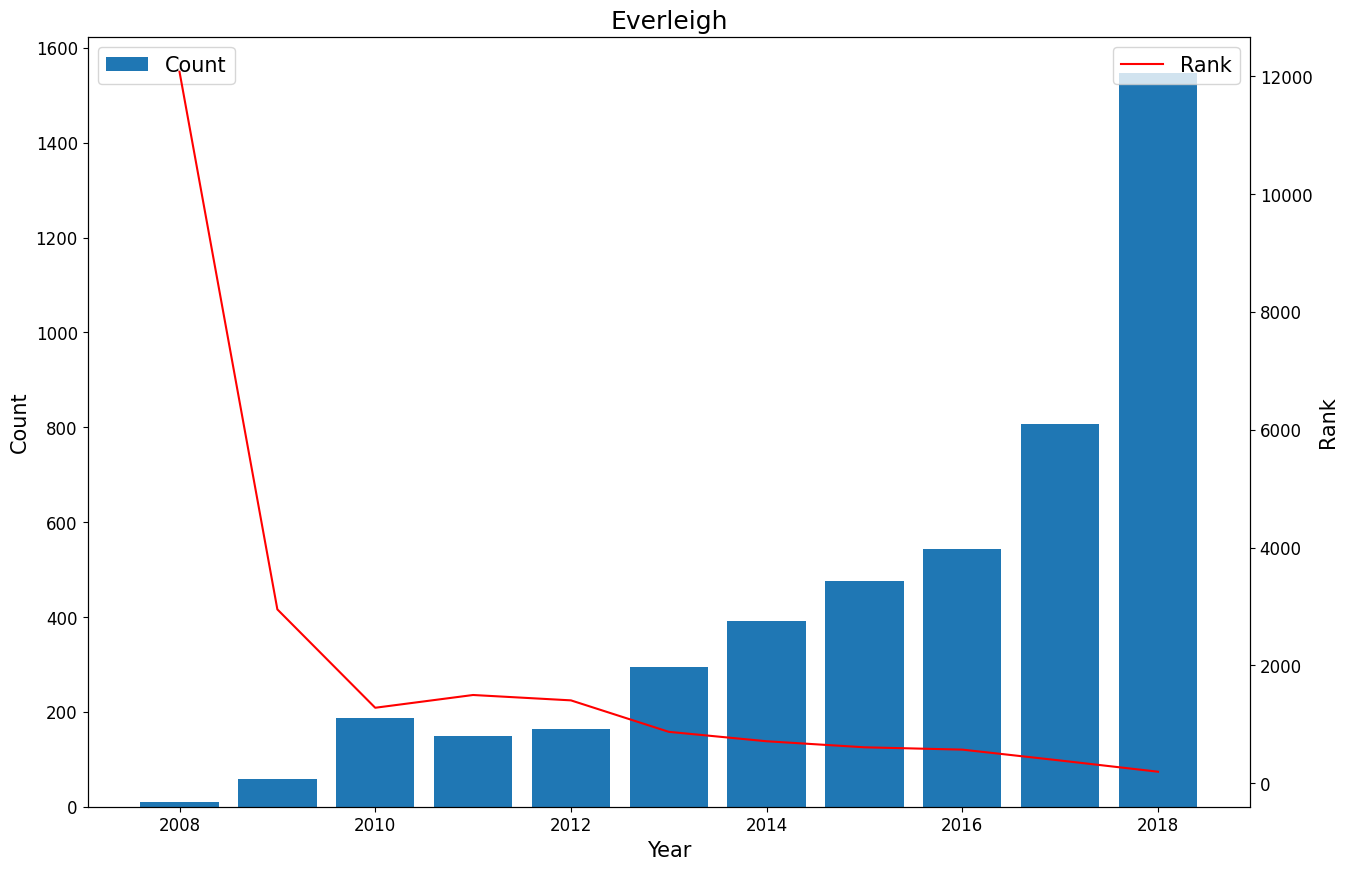

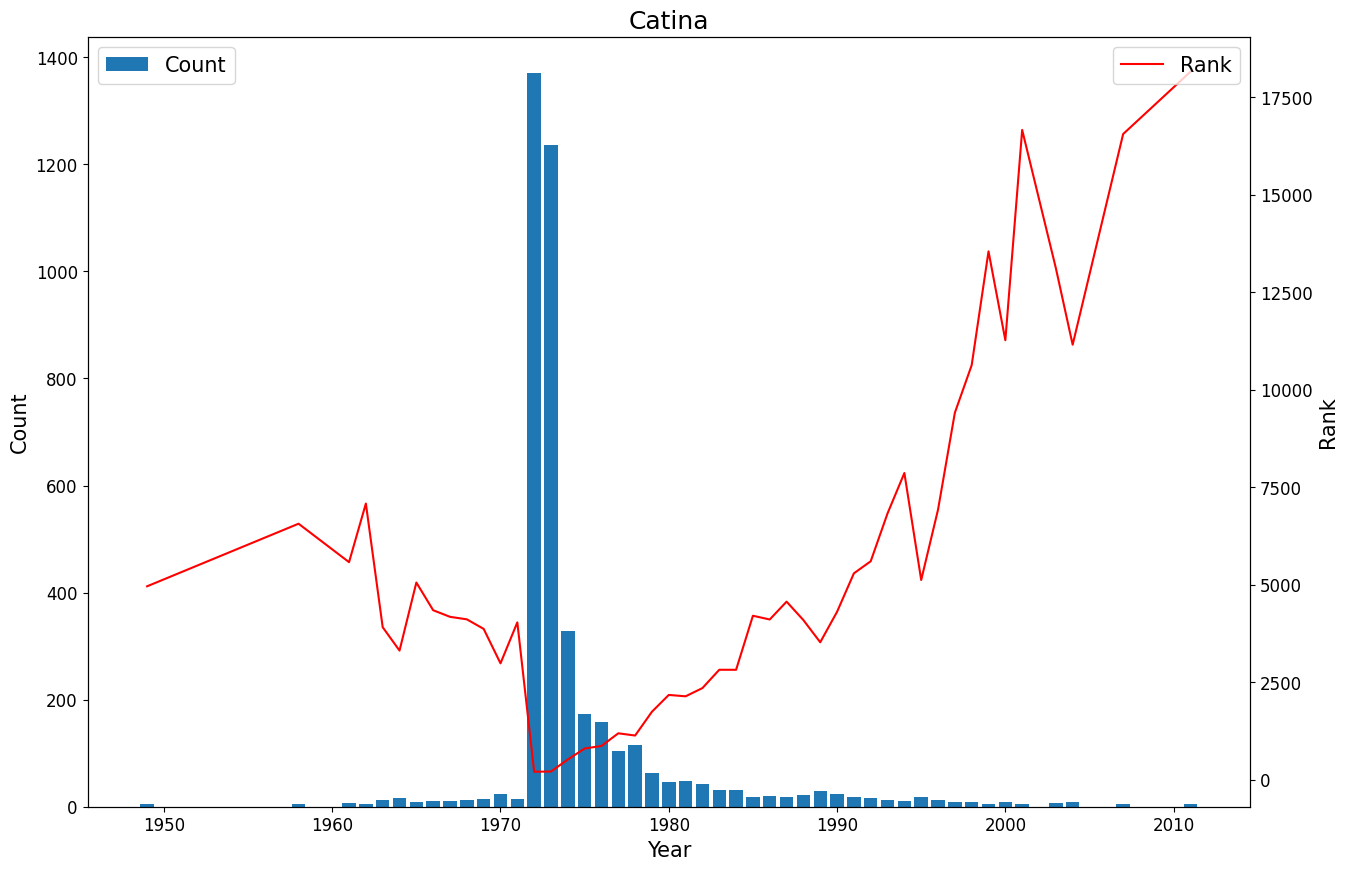

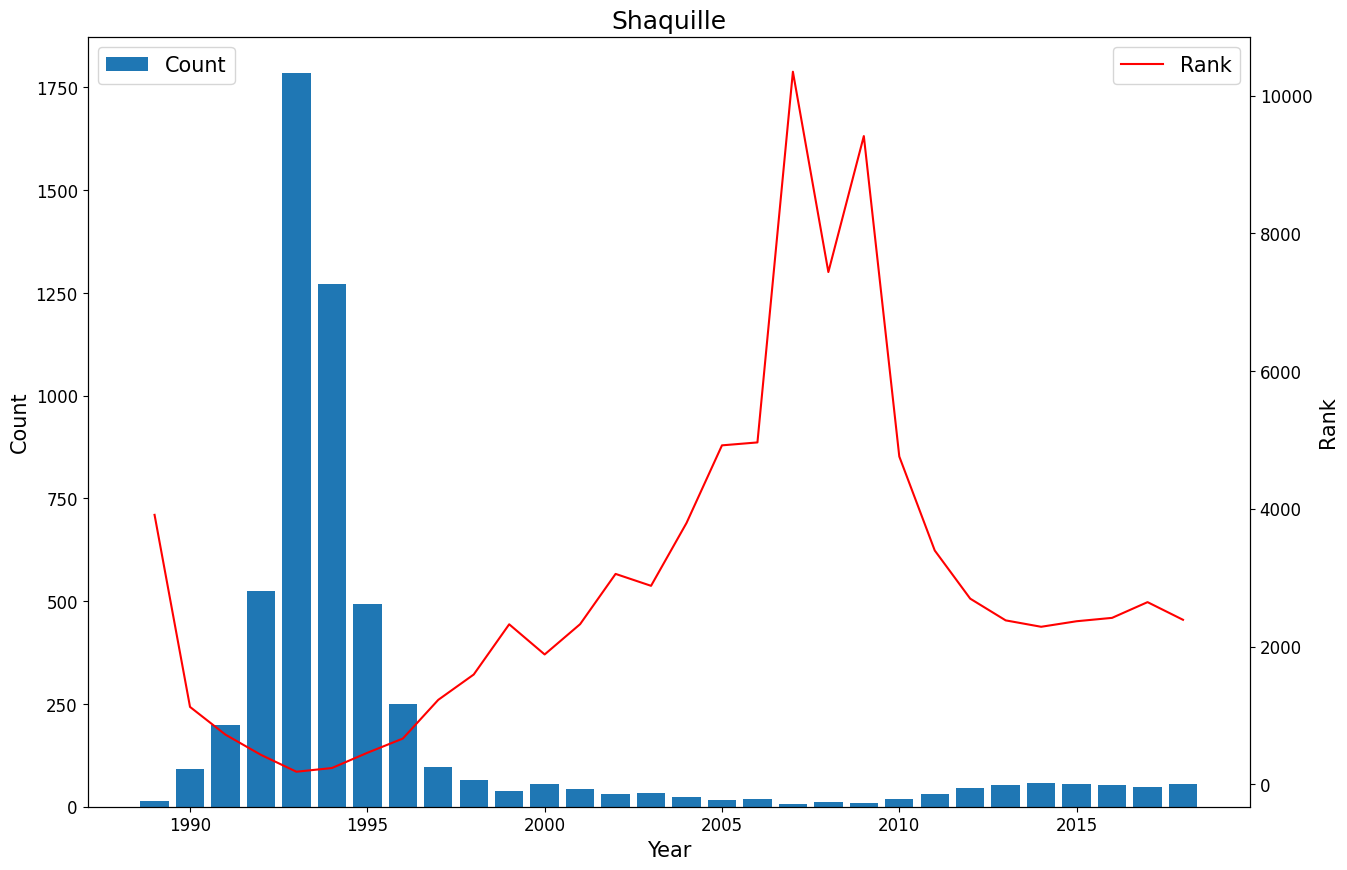

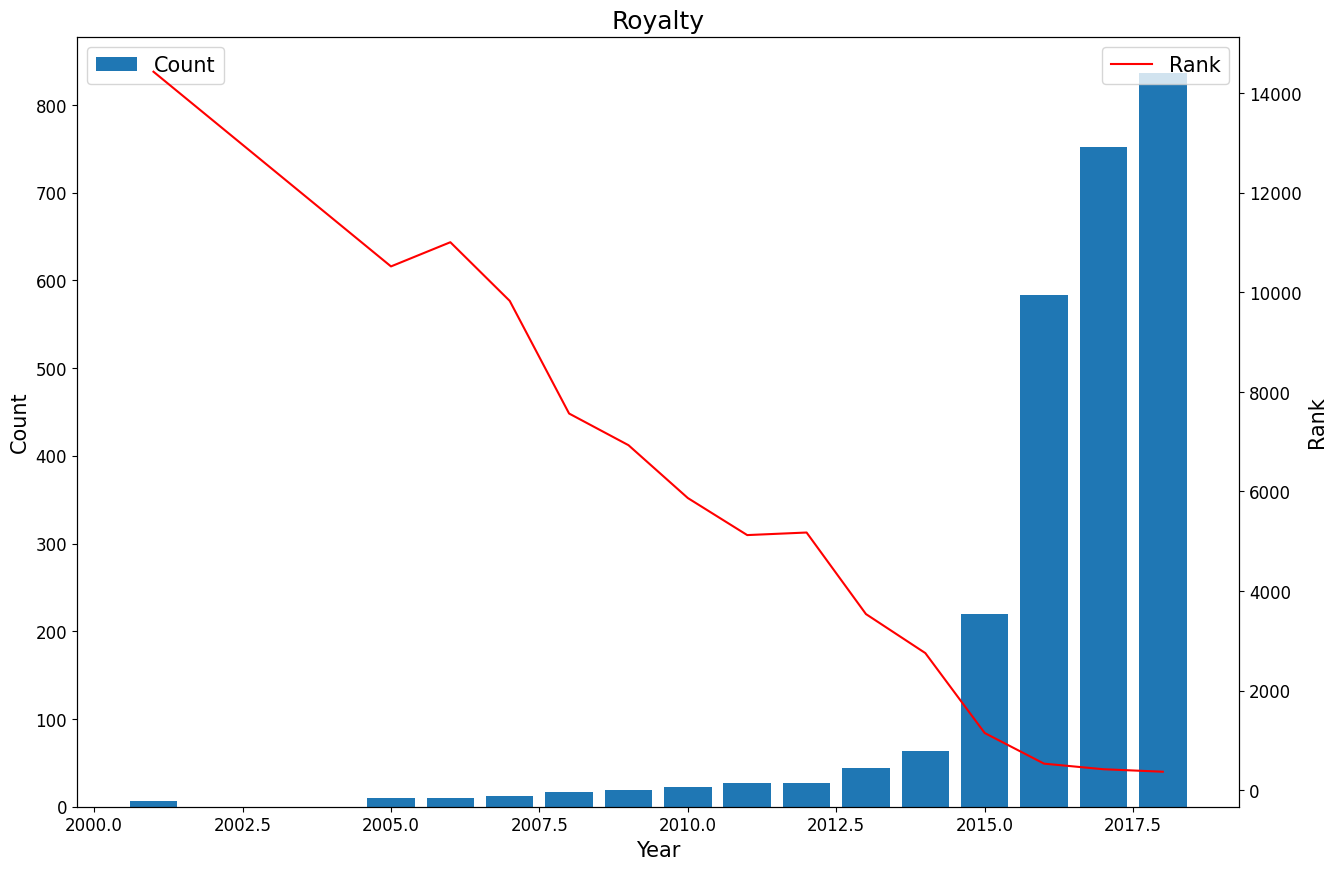

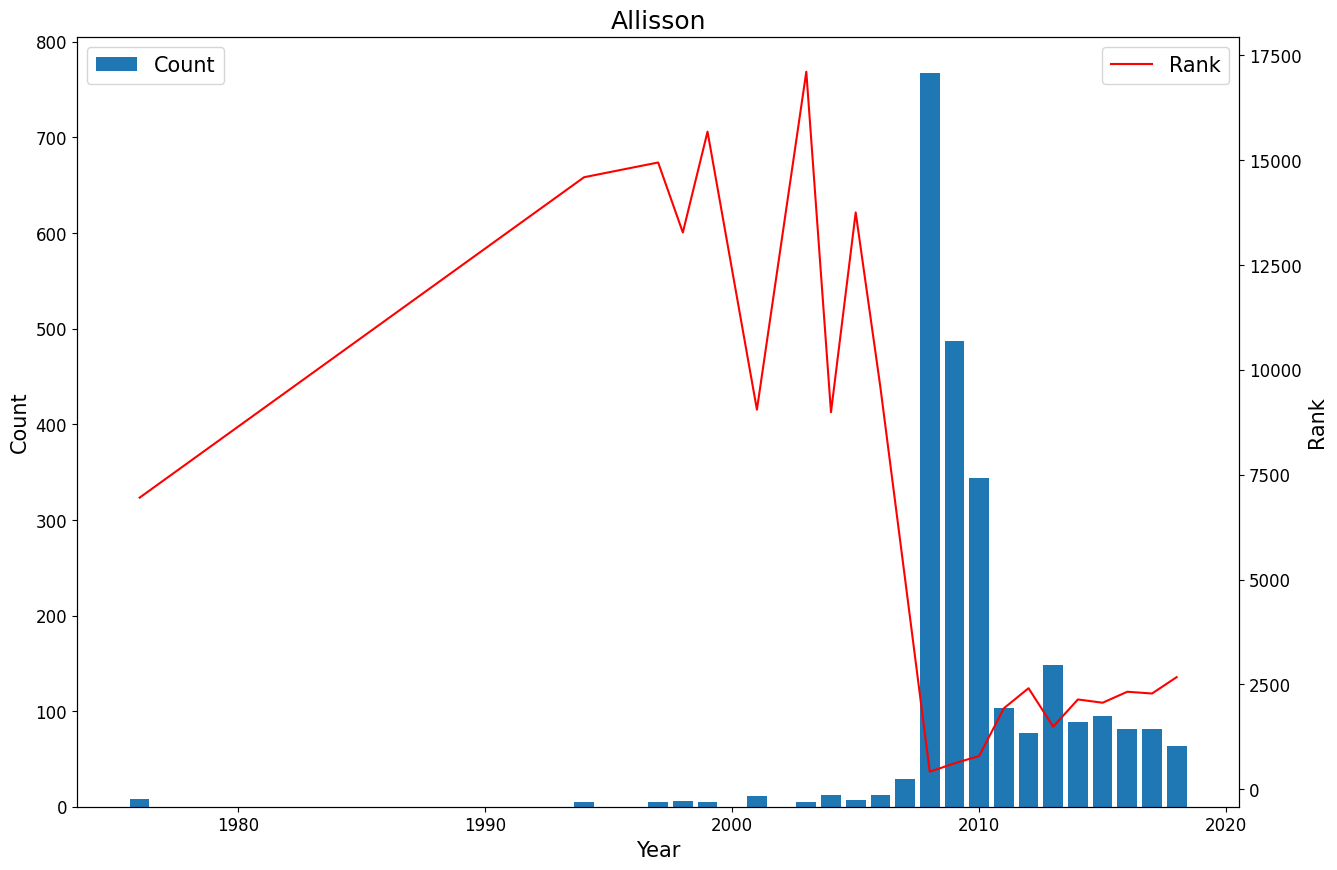

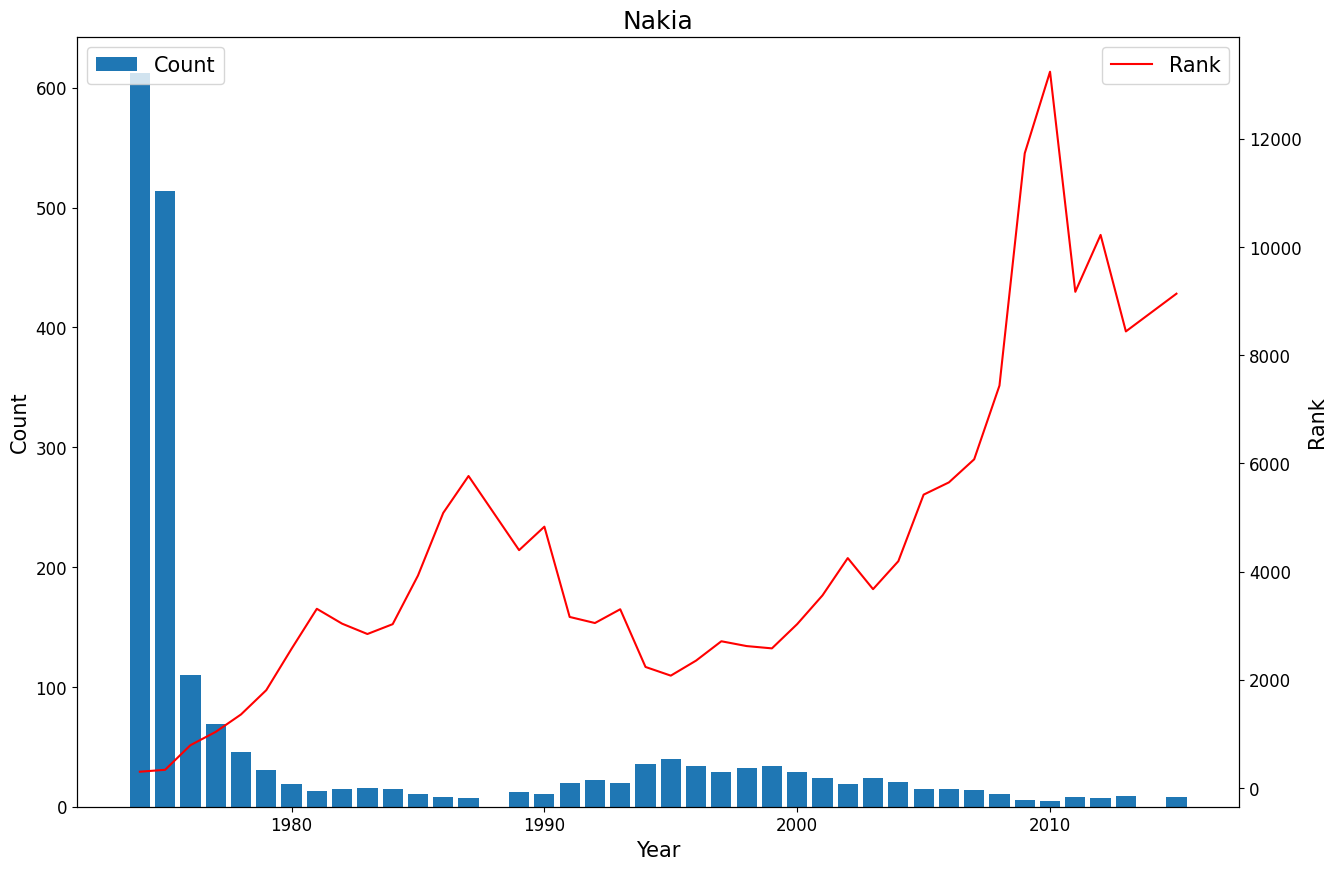

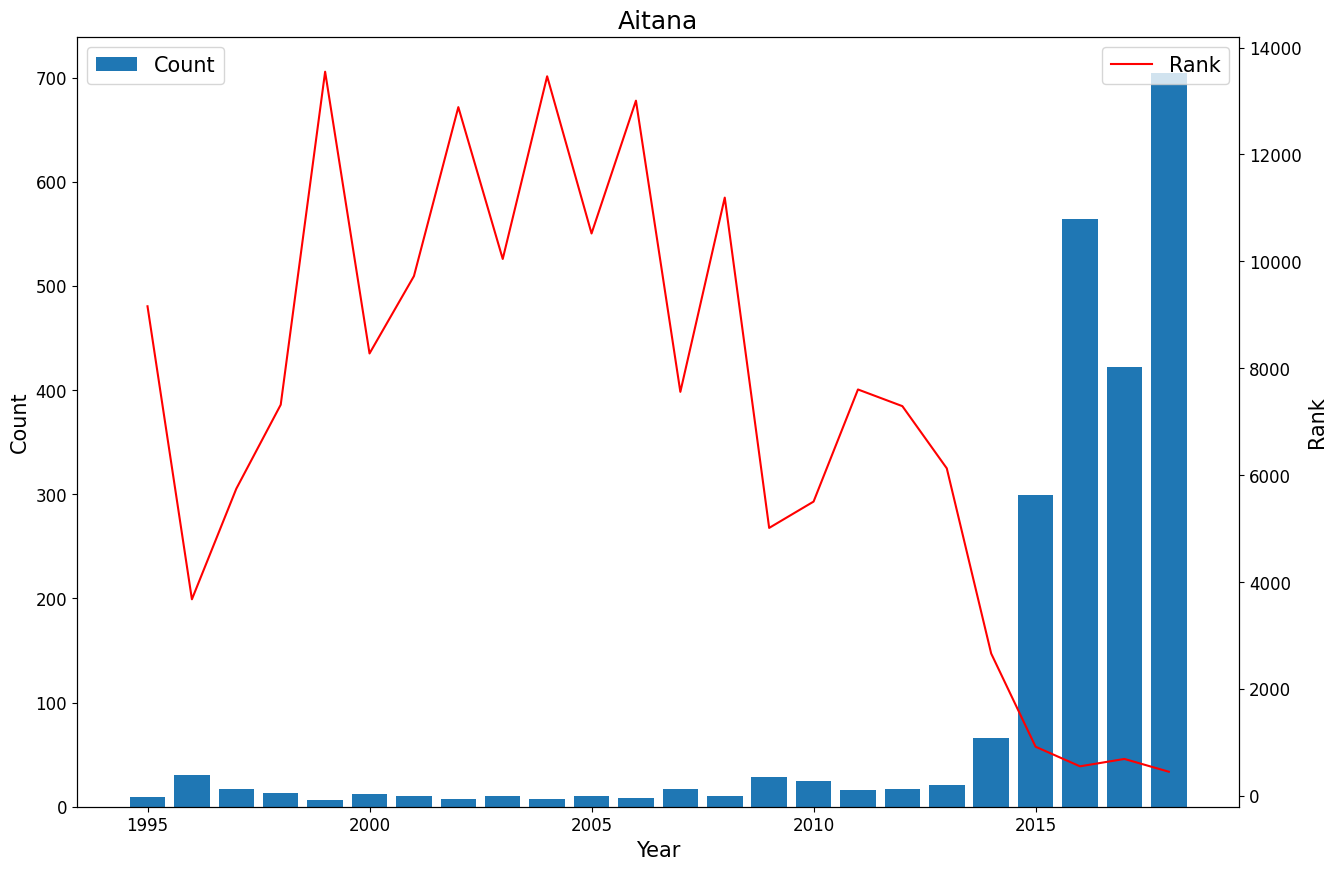

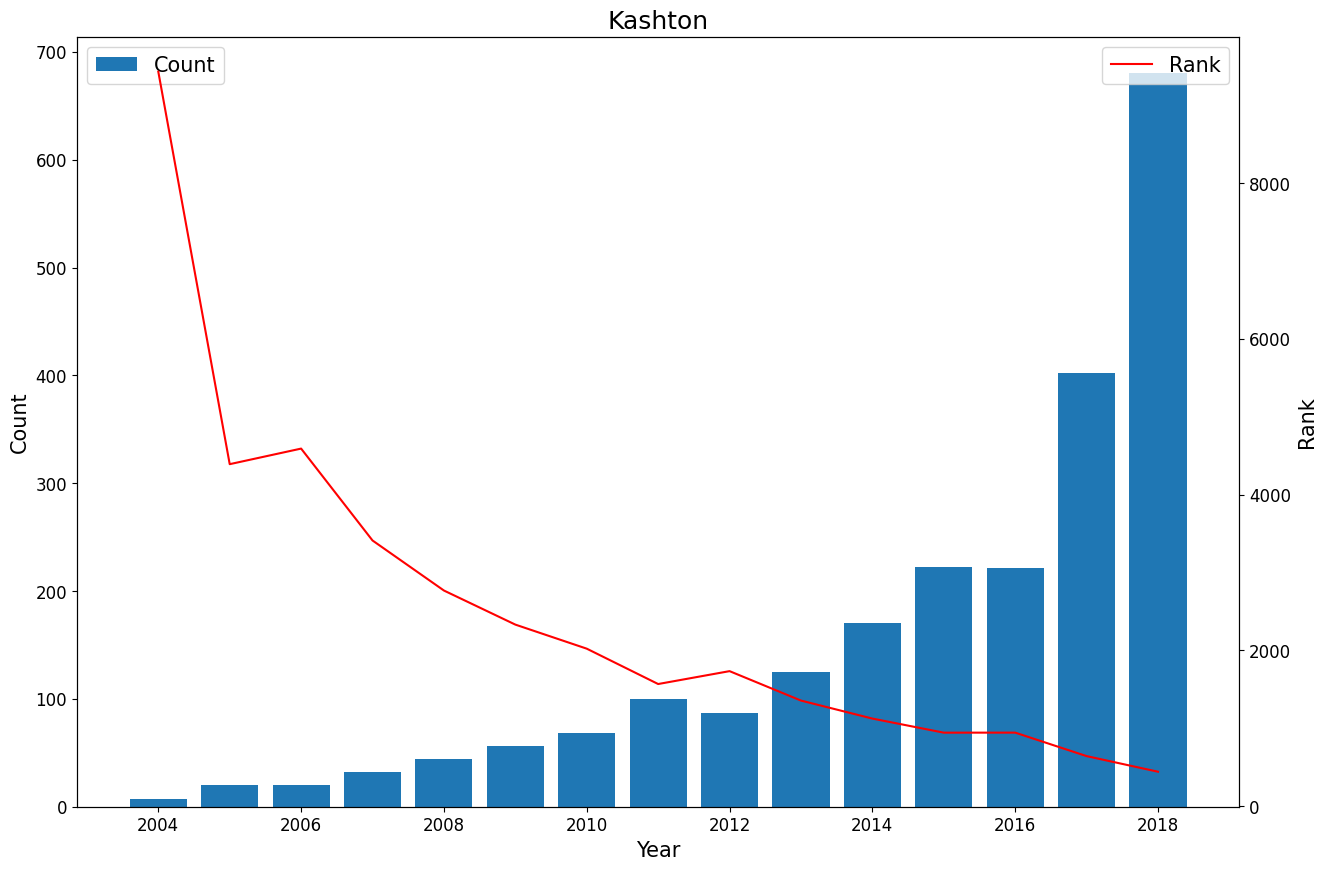

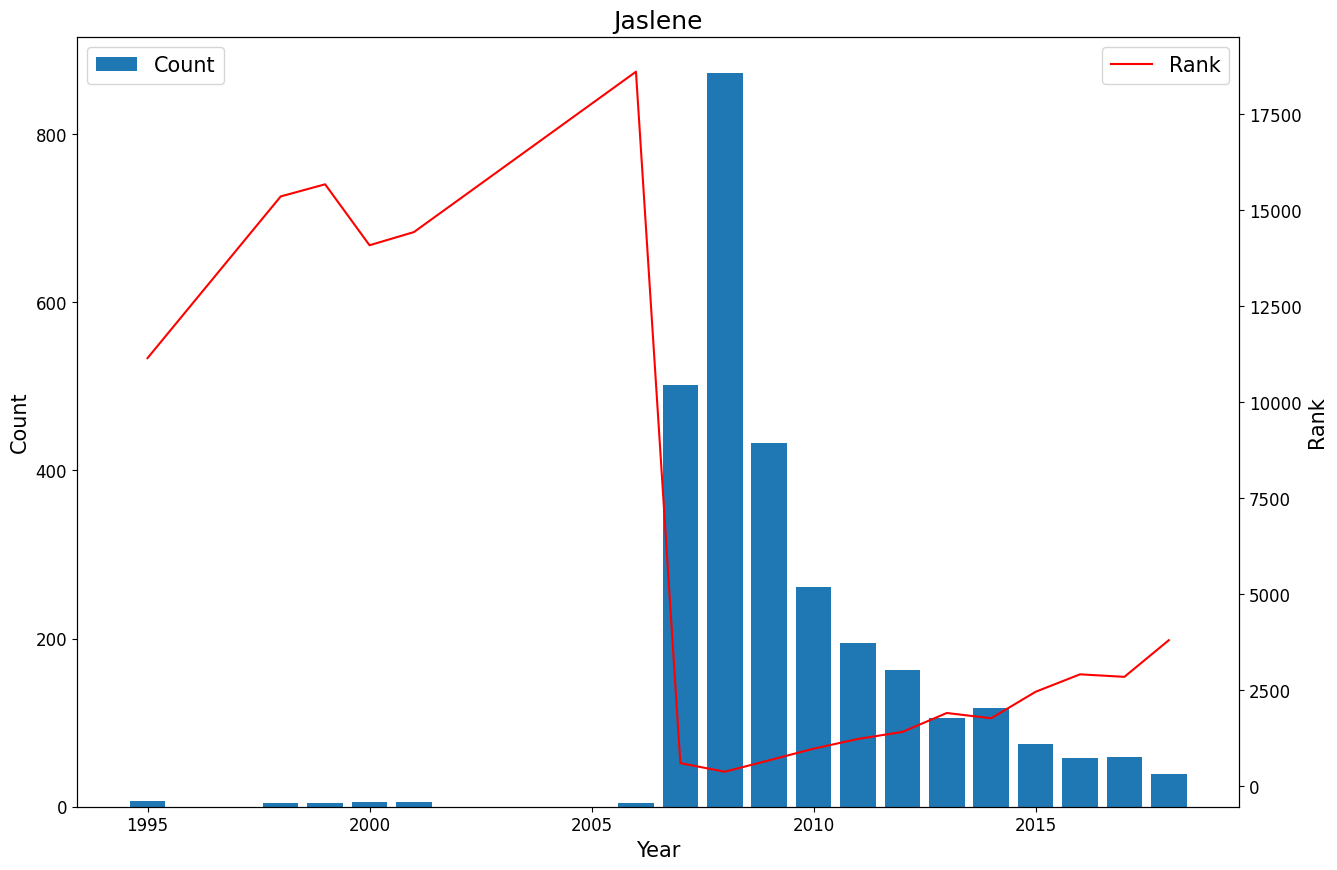

In [108]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

In [109]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [113]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

Gender      F      M
Name                
Aaban     NaN 114.00
Aabha   35.00    NaN
Aabid     NaN  16.00
Aabidah  5.00    NaN
Aabir     NaN  10.00
...       ...    ...
Zyvion    NaN   5.00
Zyvon     NaN   7.00
Zyyanna  6.00    NaN
Zyyon     NaN   6.00
Zzyzx     NaN  10.00

[98400 rows x 2 columns]

In [117]:
unisex.dropna(inplace = True)

In [118]:
unisex

Gender         F       M
Name                    
Aaden       5.00 4828.00
Aadi       16.00  851.00
Aadyn      16.00  516.00
Aalijah   149.00  212.00
Aaliyah 87442.00   96.00
...          ...     ...
Zyion     168.00  918.00
Zyon      620.00 2638.00
Zyonn       5.00   40.00
Zyree      16.00   94.00
Zyrie      19.00   16.00

[10773 rows x 2 columns]

In [131]:
unisex.min(axis = 1).sort_values(ascending = False)

Name
Willie   146156.00
Jordan   131004.00
Leslie   112726.00
Taylor   110390.00
Jessie   110212.00
            ...   
Hany          5.00
Hao           5.00
Haram         5.00
Harjap        5.00
Aaden         5.00
Length: 10773, dtype: float64

In [130]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Hanalei', 'Handy', 'Haniel', 'Hans', 'Hansel', 'Hany', 'Hao', 'Haram',
       'Harjap', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [132]:
unisex.loc[unisex_names].head(20)

Gender          F         M
Name                       
Willie  146156.00 448946.00
Jordan  131004.00 374513.00
Leslie  267081.00 112726.00
Taylor  320446.00 110390.00
Jessie  167462.00 110212.00
Terry    96895.00 422916.00
Angel    95710.00 231800.00
Riley   106901.00  94278.00
Jamie   268102.00  85631.00
Kelly   471502.00  81652.00
Jackie   90705.00  78494.00
Casey    76312.00 110635.00
Marion  188391.00  72075.00
Alexis  338333.00  63604.00
Lee      62143.00 231130.00
Tracy   250853.00  61223.00
Avery   125883.00  55646.00
Dana    191812.00  53098.00
Lynn    181904.00  52268.00
Shannon 295024.00  51999.00

In [136]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

Gender          F          M
Name                        
Addison 121435.00   12895.00
Adrian   15258.00  237044.00
Alexis  338333.00   63604.00
Amari    14415.00   17932.00
Angel    95710.00  231800.00
...           ...        ...
Tommie   17415.00   34210.00
Tracy   250853.00   61223.00
Tyler    16585.00  587571.00
William  15958.00 4117369.00
Willie  146156.00  448946.00

[116 rows x 2 columns]

In [137]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0.01
Quinn        0.01
Kerry        0.02
Blair        0.03
Kris         0.04
            ...  
Stacey       9.60
Courtney    10.34
Jean        18.07
Ashley      53.00
Mary       271.05
Length: 116, dtype: float64

In [138]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

Index(['Elisha', 'Quinn', 'Kerry', 'Blair', 'Kris', 'Robbie', 'Justice',
       'Riley', 'Emerson', 'Jackie',
       ...
       'Sandy', 'Stacy', 'Carmen', 'Shelby', 'Addison', 'Stacey', 'Courtney',
       'Jean', 'Ashley', 'Mary'],
      dtype='object', name='Name', length=116)

In [139]:
unisex.loc[unisex_names2].head(20)

Gender          F         M
Name                       
Elisha   13762.00  13595.00
Quinn    31670.00  32071.00
Kerry    48549.00  49646.00
Blair    14922.00  14527.00
Kris     13504.00  14055.00
Robbie   22290.00  20926.00
Justice  16354.00  17580.00
Riley   106901.00  94278.00
Emerson  20904.00  24472.00
Jackie   90705.00  78494.00
Frankie  33572.00  40753.00
Amari    14415.00  17932.00
Emery    22379.00  18082.00
Carey    12704.00  16783.00
Jaime    49748.00  68137.00
Finley   14369.00  11193.00
Casey    76312.00 110635.00
Harley   24299.00  38921.00
Skyler   23805.00  38911.00
Rowan    13538.00  22594.00